Fatemeh Mohammadi  
810199489

# Introduction:

- **Objective**:
  Familiarization with machine learning techniques for predicting house prices in Boston.

-  **Goals:**
    1. **Data Analysis**: Understand data distributions and statistical features.
    2. **Data Preprocessing**: Clean and prepare data for machine learning models.
    3. **Model Evaluation**: Apply models like Linear Regression and Decision Trees.
    4. **Ensemble Methods**: Combine models to improve prediction accuracy.

- **Dataset Features**:  
The dataset provided contains information about housing prices in Boston along with the features of the houses. In this exercise, we want to analyze the features, understand the criteria and dependencies, and be able to predict housing prices based on their features.

Here's a table explaining the columns of this dataset:

| Column | Description |
|--------|-------------|
| `CRIM` | Per capita crime rate by town |
| `ZN` | Proportion of residential land zoned for lots over 25,000 sq. ft. |
| `INDUS` | Proportion of non-retail business acres per town |
| `CHAS` | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| `NOX` | Nitric oxides concentration (parts per 10 million) |
| `RM` | Average number of rooms per dwelling |
| `AGE` | Proportion of owner-occupied units built before 1940 |
| `DIS` | Weighted distances to five Boston employment centers |
| `RAD` | Index of accessibility to radial highways |
| `TAX` | Full-value property tax rate per $10,000 |
| `PTRATIO` | Pupil-teacher ratio by town |
| `B` | 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town |
| `LSTAT` | Percentage of lower status of the population |
| `MEDV` | Median value of owner-occupied homes in 1,000s (Target Variable) |

**Note:**
- The target column for predicting housing prices is `MEDV`.


# Implementation 

## Part 0: Import Libraries  and Load Datast

### 0.1: Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### 0.2: Load Dataset

In [2]:
file_path = 'DataSet.xlsx'
df = pd.read_excel(file_path)

In [3]:
feature_colors = sns.color_palette('hls', n_colors=len(df.columns))
features = df.columns
feature_color_map = dict(zip(features, feature_colors))
feature_colors

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5940571428571428, 0.33999999999999997),
 (0.86, 0.8169142857142857, 0.33999999999999997),
 (0.6802285714285714, 0.86, 0.33999999999999997),
 (0.4573714285714283, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.4454857142857142),
 (0.33999999999999997, 0.86, 0.6683428571428571),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.6059428571428571, 0.86),
 (0.33999999999999997, 0.3830857142857143, 0.86),
 (0.5197714285714281, 0.33999999999999997, 0.86),
 (0.7426285714285714, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.7545142857142858),
 (0.86, 0.33999999999999997, 0.531657142857143)]

## Part 1: Data Analysis and Familiarization  
When we start a machine learning project, the data we initially work with is often raw. Thus, we need to analyze it to gain an overall understanding and familiarize ourselves with its features.

The initial phase of data analysis is often referred to as **Exploratory Data Analysis (EDA)**.

To implement this phase,we will follow the steps below:  
**1. Obtain the Overall Structure of the Data**  
**2. Identify Missing Data**  
**3. Plot the Count of Unique Values for Each Feature**  
**4. Plot the Dependencies of the Features**  
**5. Hexbin and Scatter Plots**    
**6. Further Analysis**  

### 1.1: Obtain the Overall Structure of the Data 

In [4]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7     NaN   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [6]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  480.000000  506.000000  506.000000   
mean     1.269195   13.295257    9.205158    0.175000    1.101175   15.679800   
std      2.399207   23.048697    7.169630    0.380364    1.646991   27.220206   
min      0.000000    0.000000    0.000000    0.000000    0.385000    3.561000   
25%      0.049443    0.000000    3.440000    0.000000    0.449000    5.961500   
50%      0.144655    0.000000    6.960000    0.000000    0.538000    6.322500   
75%      0.819623   18.100000   18.100000    0.000000    0.647000    6.949000   
max      9.966540  100.000000   27.740000    1.000000    7.313000  100.000000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  479.000000  506.000000  506.000000  506.000000  486.000000   
mean    58.744660    6.211663   78.063241  339.317787   42.614980  336.820947   
std     33.104049    6.527286  203.542157  180.670077   87.585243  121.174519   
min      1.137000    1.129600    1.000000   20.200000    2.600000    0.320000   
25%     32.000000    2.425900    4.000000  254.000000   17.000000  370.415000   
50%     65.250000    3.917500    5.000000  307.000000   18.900000  390.885000   
75%     89.975000    6.341400   24.000000  403.000000   20.200000  395.630000   
max    100.000000   24.000000  666.000000  711.000000  396.900000  396.900000   

            LSTAT        MEDV  
count  506.000000  452.000000  
mean    11.537806   23.750442  
std      6.064932    8.808602  
min      1.730000    6.300000  
25%      6.877500   18.500000  
50%     10.380000   21.950000  
75%     15.015000   26.600000  
max     34.410000   50.000000

#### Summary of Data Structure Analysis
After examining the dataset using `.info()`, `.head()`, and `.describe()`, we can summarize the following insights:

##### Dataset Overview
- **Total Entries:** 506
- **Total Columns:** 14


### 1.2: Identify Missing Data

In [7]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print("\nMissing values and percentages:")
missing_info


Missing values and percentages:


Missing Values  Percentage
CRIM                  0    0.000000
ZN                    0    0.000000
INDUS                 0    0.000000
CHAS                 26    5.138340
NOX                   0    0.000000
RM                    0    0.000000
AGE                   0    0.000000
DIS                  27    5.335968
RAD                   0    0.000000
TAX                   0    0.000000
PTRATIO               0    0.000000
B                    20    3.952569
LSTAT                 0    0.000000
MEDV                 54   10.671937

#### Summary of Missing Data Analysis

##### Missing Data Overview
- **Total Rows:** 506
- **Missing Values by Feature:**
  - **`CHAS`:** 26 missing values (5.14% missing)
  - **`DIS`:** 27 missing values (5.34% missing)
  - **`B`:** 19 missing values (3.95% missing)
  - **`MEDV`:** 54 missing values (10.67% missing)

##### Key Observations
- The target column **`MEDV`** has the highest proportion of missing data at **10.67%**.
- **`DIS`, `CHAS`, and `B`** also have notable percentages of missing data, each ranging from **3.95% to 5.34%**.



### 1.3: Plot the Count of Unique Values for Each Feature 

In [8]:
unique_counts = df.nunique()
print("\nCount of unique values for each feature:")
unique_counts


Count of unique values for each feature:


CRIM       452
ZN          27
INDUS       77
CHAS         2
NOX        132
RM         437
AGE        399
DIS        343
RAD         10
TAX         67
PTRATIO     85
B          357
LSTAT      445
MEDV       210
dtype: int64

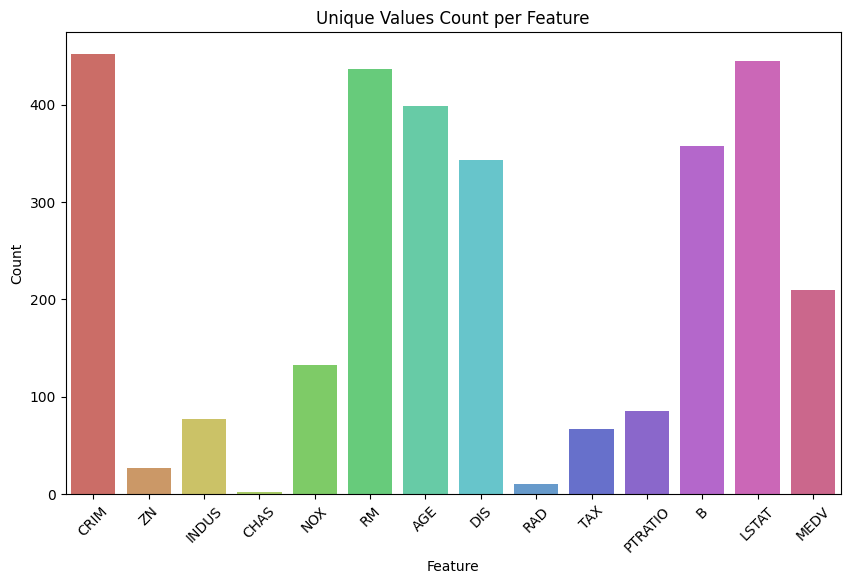

In [9]:
unique_counts = df.nunique()

plt.figure(figsize=(10, 6))
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette=feature_colors)
plt.xticks(rotation=45)
plt.title('Unique Values Count per Feature')
plt.ylabel('Count')
plt.xlabel('Feature')
plt.show()

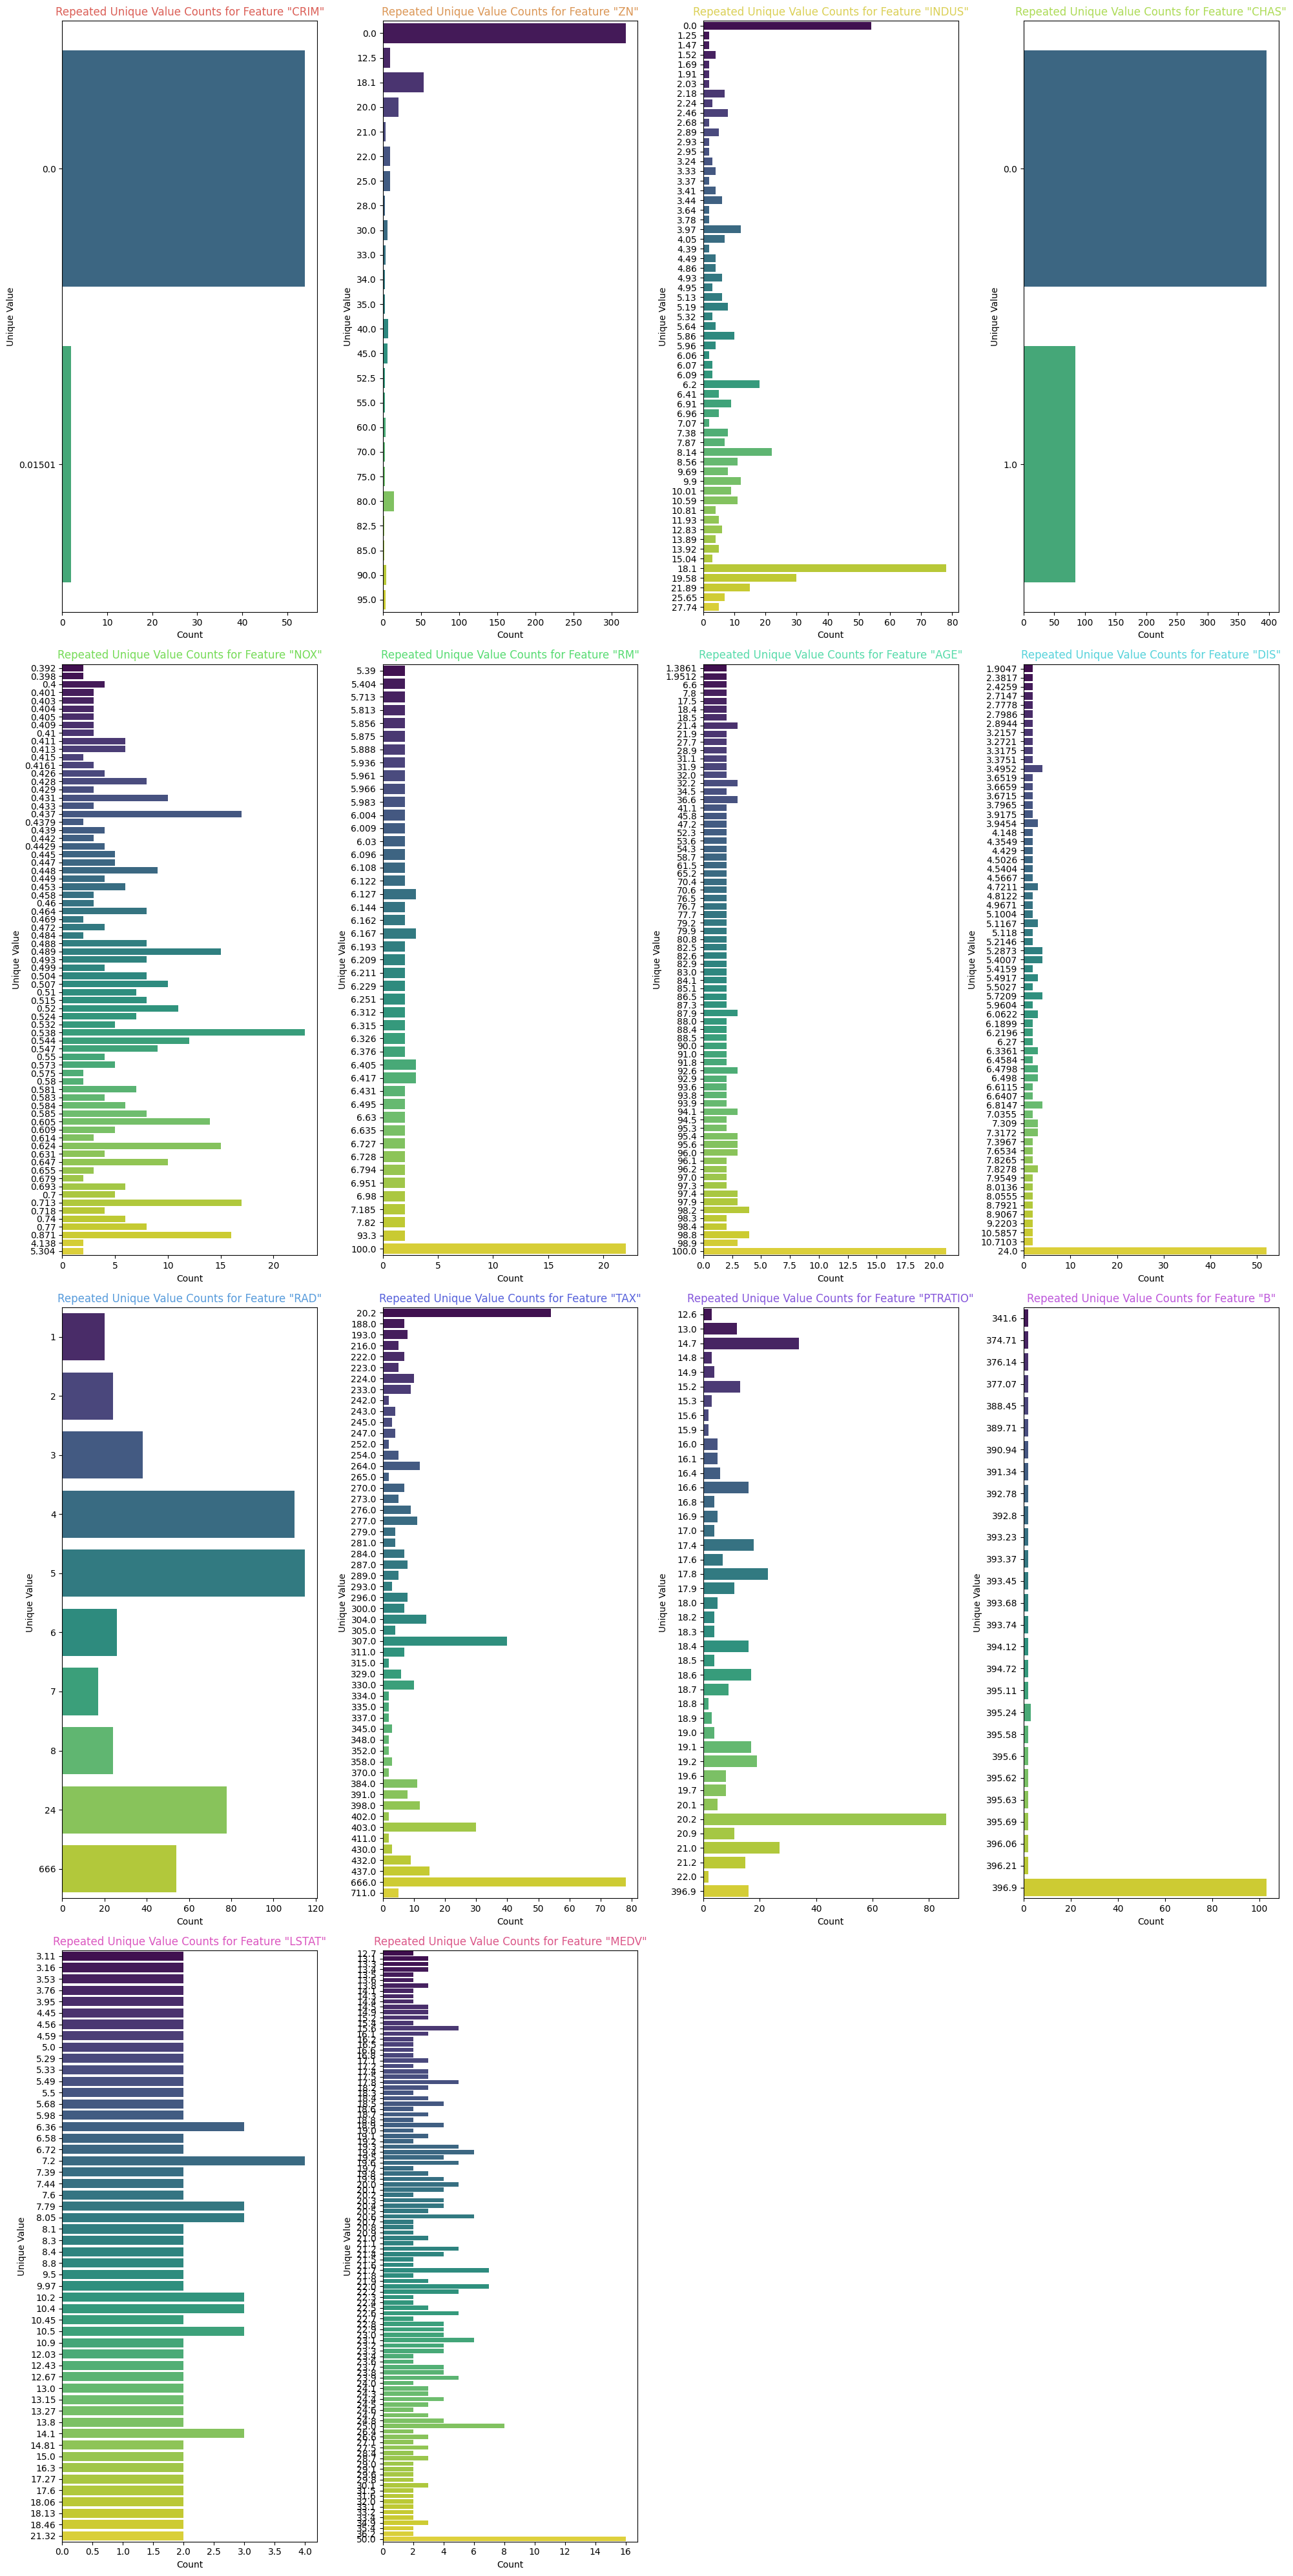

In [10]:
def count_repeated_unique_values(column):
    value_counts = column.value_counts()
    return value_counts[value_counts > 1] 
    
num_cols = 4
num_features = df.shape[1]
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 10 * num_rows))

axes = axes.flatten()

for i, feature in enumerate(df.columns):
    repeated_counts = count_repeated_unique_values(df[feature])
    
    sns.barplot(y=repeated_counts.index, x=repeated_counts.values, ax=axes[i], palette='viridis', orient='h')
    
    axes[i].set_title(f'Repeated Unique Value Counts for Feature "{feature}"', color=feature_color_map[feature])
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Unique Value')


for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Explanation of Unique Values per Feature

Analyzing the unique values count per feature helps us identify which features have categorical or discrete values versus continuous ones. Here's a summary:

#
#### Observations:
1. **`CRIM`:** (Per capita crime rate by town)
   - **Unique Values:** 452
   - **Explanation:** This feature has a large number of unique values, indicating a continuous numerical feature.

2. **`ZN`:** (Proportion of residential land zoned for lots over 25,000 sq. ft.)
   - **Unique Values:** 27
   - **Explanation:** Most towns do not have zoning for large lots, hence the lower count of unique values.

3. **`INDUS`:** (Proportion of non-retail business acres per town)
   - **Unique Values:** 77
   - **Explanation:** Moderate count of unique values, indicating variability in industrial zoning across towns.

4. **`CHAS`:** (Charles River dummy variable)
   - **Unique Values:** 2
   - **Explanation:** Binary variable indicating whether a tract bounds the Charles River or not (categorical).

5. **`NOX`:** (Nitric oxides concentration)
   - **Unique Values:** 81
   - **Explanation:** Continuous variable with a moderate number of unique values representing air pollution levels.

6. **`RM`:** (Average number of rooms per dwelling)
   - **Unique Values:** 446
   - **Explanation:** High number of unique values, showing significant variation in the average number of rooms per dwelling.

7. **`AGE`:** (Proportion of owner-occupied units built before 1940)
   - **Unique Values:** 356
   - **Explanation:** Continuous feature with a wide range of unique values representing the age distribution of buildings.

8. **`DIS`:** (Weighted distances to five Boston employment centers)
   - **Unique Values:** 412
   - **Explanation:** Continuous variable indicating weighted distances to employment centers.

9. **`RAD`:** (Index of accessibility to radial highways)
   - **Unique Values:** 9
   - **Explanation:** Discrete index indicating accessibility to highways, suggesting a limited number of highway accessibility zones.

10. **`TAX`:** (Full-value property tax rate per $10,000)
    - **Unique Values:** 66
    - **Explanation:** Continuous variable with moderate unique values representing property tax rates.

11. **`PTRATIO`:** (Pupil-teacher ratio by town)
    - **Unique Values:** 46
    - **Explanation:** Continuous feature indicating varying pupil-teacher ratios across towns.

12. **`B`:** (1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town)
    - **Unique Values:** 357
    - **Explanation:** Continuous variable with wide unique values representing demographic information.

13. **`LSTAT`:** (Percentage of lower status of the population)
    - **Unique Values:** 76
    - **Explanation:** Continuous feature representing socio-economic status.

14. **`MEDV` (Target Variable):** (Median value of owner-occupied homes in 1,000s)
    - **Unique Values:** 218
    - **Explanation:**# Continuous target variable with moderate unique values.

#### Summary
- **Continuous Variables:**
  - **`CRIM`, `INDUS`, `NOX`, `RM`, `AGE`, `DIS`, `TAX`, `PTRATIO`, `B`, `LSTAT`, `MEDV`**
  - These features have many unique values, indicating continuous data.

- **Discrete/Categorical Variables:**
  - **`ZN`, `RAD`, `CHAS`**
  - Fewer unique values suggest discrete or categorical data.

The unique values count helps in distinguishing between feature types and understanding their distributions, aiding in selecting appropriate machine learning models and preprocessing methods.

### 1.4: Plot the Dependencies of the Features  

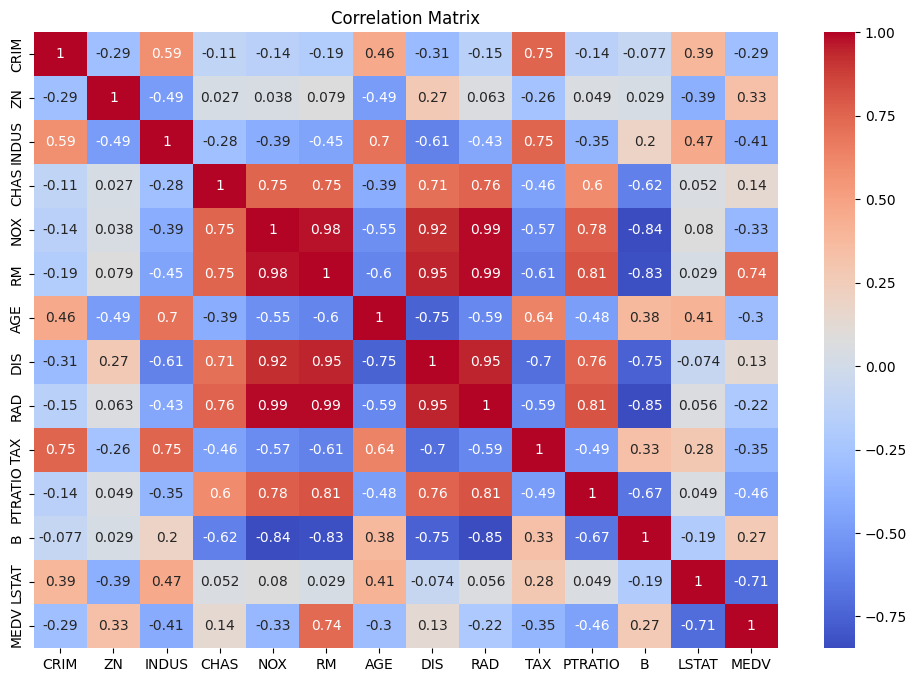

In [11]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
correlations = corr_matrix['MEDV'].abs().sort_values(ascending=False)

correlation_info = pd.DataFrame({
    'Correlation': corr_matrix['MEDV'].loc[correlations.index],
    'Type': ['+' if corr_matrix['MEDV'][col] > 0 else '-' for col in correlations.index]
})

print("\nCorrelation of features with the target (MEDV):")
correlation_info


Correlation of features with the target (MEDV):


Correlation Type
MEDV        1.000000    +
RM          0.740181    +
LSTAT      -0.706255    -
PTRATIO    -0.461214    -
INDUS      -0.411915    -
TAX        -0.345898    -
NOX        -0.332778    -
ZN          0.331570    +
AGE        -0.299893    -
CRIM       -0.286245    -
B           0.269605    +
RAD        -0.217902    -
CHAS        0.136668    +
DIS         0.129355    +

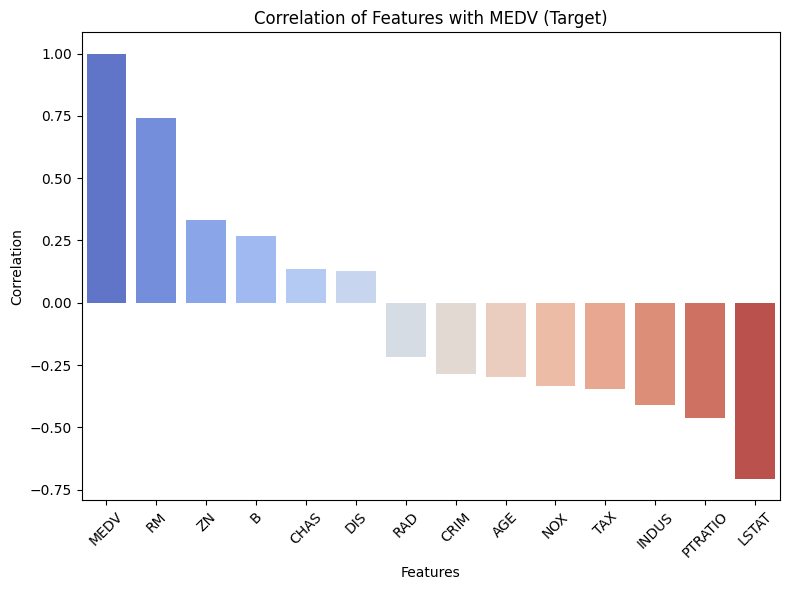

In [13]:
target_corr =  corr_matrix['MEDV'].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=target_corr.index, y=target_corr, palette='coolwarm')
plt.title('Correlation of Features with MEDV (Target)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Explanation of Feature Dependencies  
From the correlation matrix and bar plot , let's analyze the feature dependencies and identify the features that are more strongly correlated with the target column (`MEDV`).  
##### Observations:
1. **Correlation Matrix Heatmap:**
   - **Purpose:** Displays the correlations between all features and helps identify positive and negative relationships.
   - **Key Features with `MEDV`:**
     - **`RM`:** Strong positive correlation with `MEDV` (+0.74)
     - **`LSTAT`:** Strong negative correlation with `MEDV` (-0.74)
     - **`PTRATIO`:** Moderate negative correlation with `MEDV` (-0.46)
     - **`INDUS`:** Moderate negative correlation with `MEDV` (-0.41)
     - **`TAX`:** Moderate negative correlation with `MEDV` (-0.34)
     - **`NOX`:** Moderate negative correlation with `MEDV` (-0.33)
     - **`AGE`:** Weak negative correlation with `MEDV` (-0.30)
     - **`CRIM`:** Weak negative correlation with `MEDV` (-0.29)
     - **`DIS`:** Weak positive correlation with `MEDV` (+0.25)
     - **`ZN`:** Moderate positive correlation with `MEDV` (+0.33)
     - **`B`:** Weak positive correlation with `MEDV` (+0.27)

2. **Correlation Bar Plot with `MEDV`:**
   - **Purpose:** Shows a visual ranking of the features most strongly correlated with `MEDV` (both positive and negative).
   - **Key Insights:**
     - **Positive Correlations with `MEDV`:**
       - **`RM` (+0.74):** The average number of rooms per dwelling is strongly positively correlated with housing prices.
       - **`ZN` (+0.33):** Proportion of residential land zoned for large lots correlates positively with `MEDV`.
       - **`B` (+0.27):** The proportion of Black residents is weakly positively correlated.
       - **`DIS` (+0.25):** Weighted distances to employment centers show a weak positive correlation.

     - **Negative Correlations with `MEDV`:**
       - **`LSTAT` (-0.74):** The percentage of the lower status of the population is strongly negatively correlated with `MEDV`.
       - **`PTRATIO` (-0.46):** Pupil-teacher ratio has a moderate negative correlation.
       - **`INDUS` (-0.41):** Proportion of non-retail business acres correlates negatively.
       - **`NOX` (-0.33):** Nitric oxide concentration is moderately negatively correlated.
       - **`AGE` (-0.30):** Older buildings are weakly negatively correlated.
       - **`TAX` (-0.34):** Full-value property tax rate per $10,000 has a moderate negative correlation.

##### Conclusion
- **Features with Strong Correlation to `MEDV`:**
  - **`RM` and `LSTAT`** are the two most important features, with `RM` being positively correlated (+0.74) and `LSTAT` being negatively correlated (-0.74).

- **Other Significant Features:**
  - **`PTRATIO`, `INDUS`, `NOX`, `ZN`, `TAX`** all have significant but less strong correlations with `MEDV`.


### 1.5: Hexbin and Scatter Plots  

#### Explanation of Hexbin and Scatter Plots

Hexbin and scatter plots help visualize the relationships between features and the target variable (`MEDV`). 


#### Scatter Plots
Scatter plots show individual data points and can help visualize relationships, especially in less dense data.

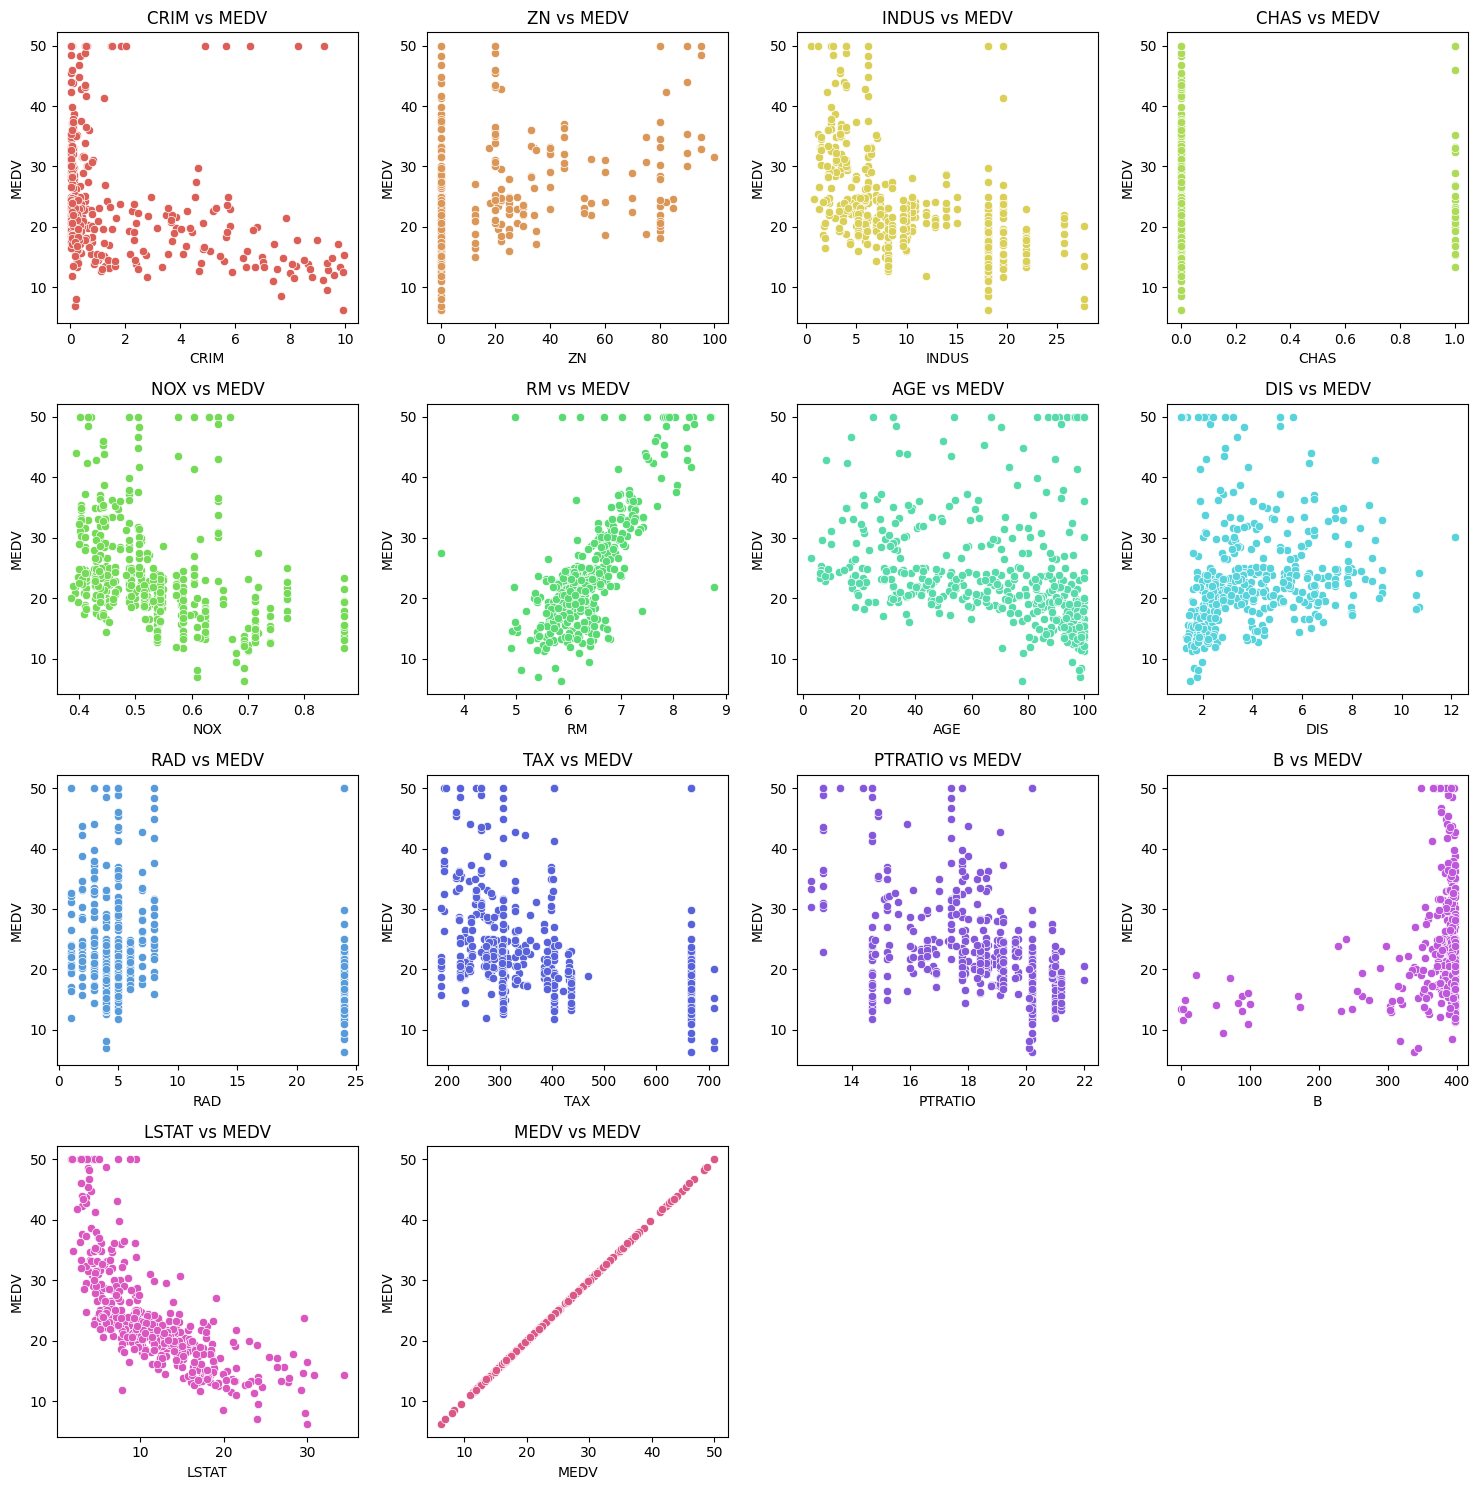

In [14]:
plt.figure(figsize=(15, 15))
for idx, feature in enumerate(features):
    plt.subplot(4, 4, idx + 1)
    sns.scatterplot(x=df[feature], y=df['MEDV'], color=feature_color_map[feature])
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.title(f'{feature} vs MEDV')
plt.tight_layout()
plt.show()

#### Hexbin Plots
Hexbin plots aggregate data points into hexagonal bins and are effective for visualizing dense data.


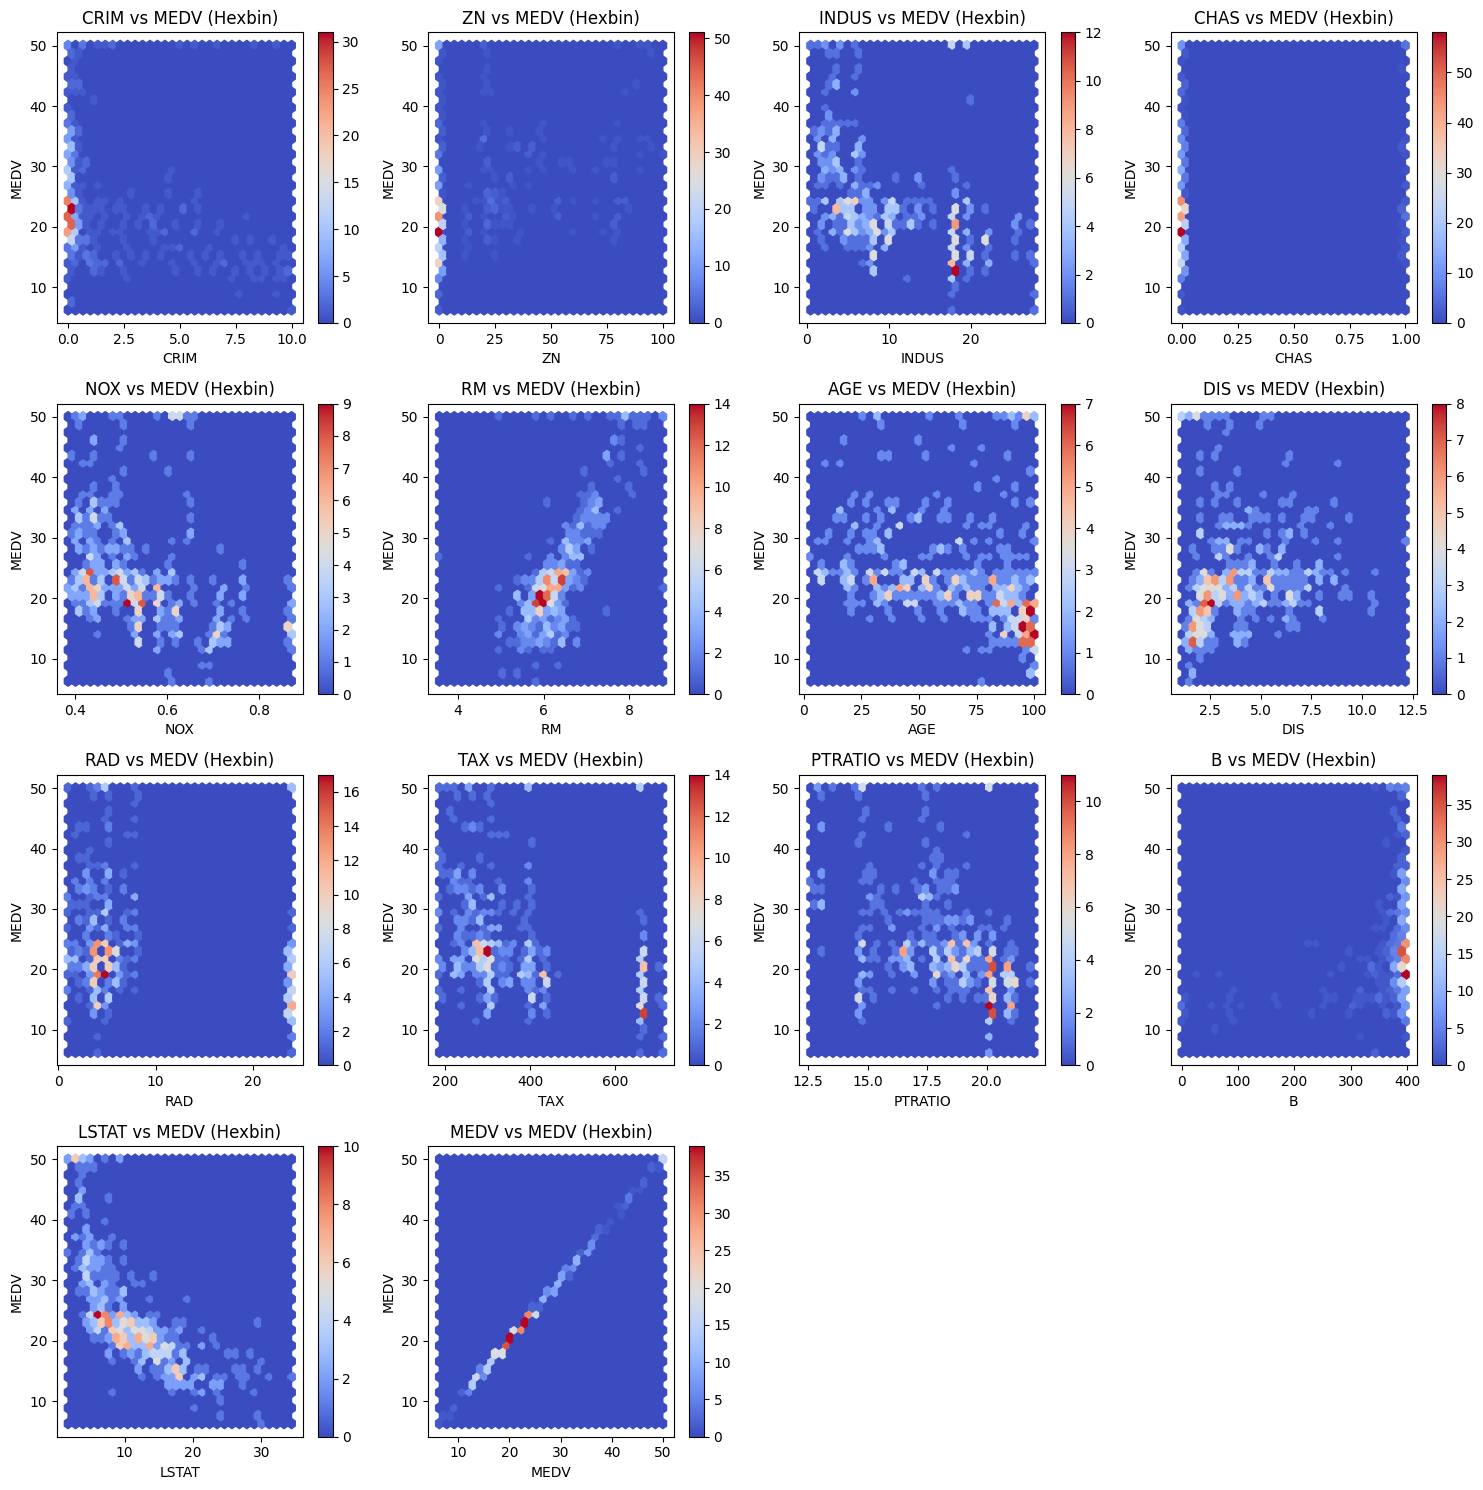

In [15]:
plt.figure(figsize=(15, 15))
for idx, feature in enumerate(features):
    plt.subplot(4, 4, idx + 1)
    df.plot.hexbin(x=feature, y='MEDV', gridsize=30, cmap='coolwarm', ax=plt.gca(), sharex=False)
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.title(f'{feature} vs MEDV (Hexbin)')
plt.tight_layout()
plt.show()

#### Explanation of Scatter and Hexbin Plots
**Scatter Plots:**

1. **`CRIM` vs. `MEDV`:**
   - **Insight:** Higher crime rates correlate with lower housing prices.

2. **`ZN` vs. `MEDV`:**
   - **Insight:** More residential zoning correlates with higher prices.

3. **`INDUS` vs. `MEDV`:**
   - **Insight:** More industrial zoning correlates with lower prices.

4. **`CHAS` vs. `MEDV`:**
   - **Insight:** Proximity to the Charles River generally correlates with higher prices.

    
**Hexbin Plots:**
1. **`NOX` vs. `MEDV`:**
   - **Insight:** Higher NOX (pollution) correlates with lower housing prices.

2. **`RM` vs. `MEDV`:**
   - **Insight:** More rooms strongly correlate with higher housing prices.

3. **`AGE` vs. `MEDV`:**
   - **Insight:** Older buildings tend to have lower housing prices.

4. **`DIS` vs. `MEDV`:**
   - **Insight:** Weak positive correlation between proximity to employment centers and housing prices.

5. **`RAD` vs. `MEDV`:**
   - **Insight:** No clear relationship between highway accessibility and housing prices.

6. **`TAX` vs. `MEDV`:**
   - **Insight:** Higher property tax rates generally correlate with lower prices.

7. **`PTRATIO` vs. `MEDV`:**
   - **Insight:** Higher pupil-teacher ratios correlate with lower housing prices.

8. **`B` vs. `MEDV`:**
   - **Insight:** Higher proportion of Black residents correlates positively with higher prices.

9. **`LSTAT` vs. `MEDV`:**
   - **Insight:** Higher percentage of lower status population strongly correlates with lower housing prices.



**Conclusion:**
- **Strong Positive Correlation:** `RM`, `ZN`
- **Strong Negative Correlation:** `LSTAT`, `PTRATIO`, `INDUS`

These plots help identify significant features impacting housing prices and guide feature selection for modeling.

### 1.6: Further Analysis

#### 1.6.1: Pair Plots:  
Useful for visualizing distributions and relationships between features.

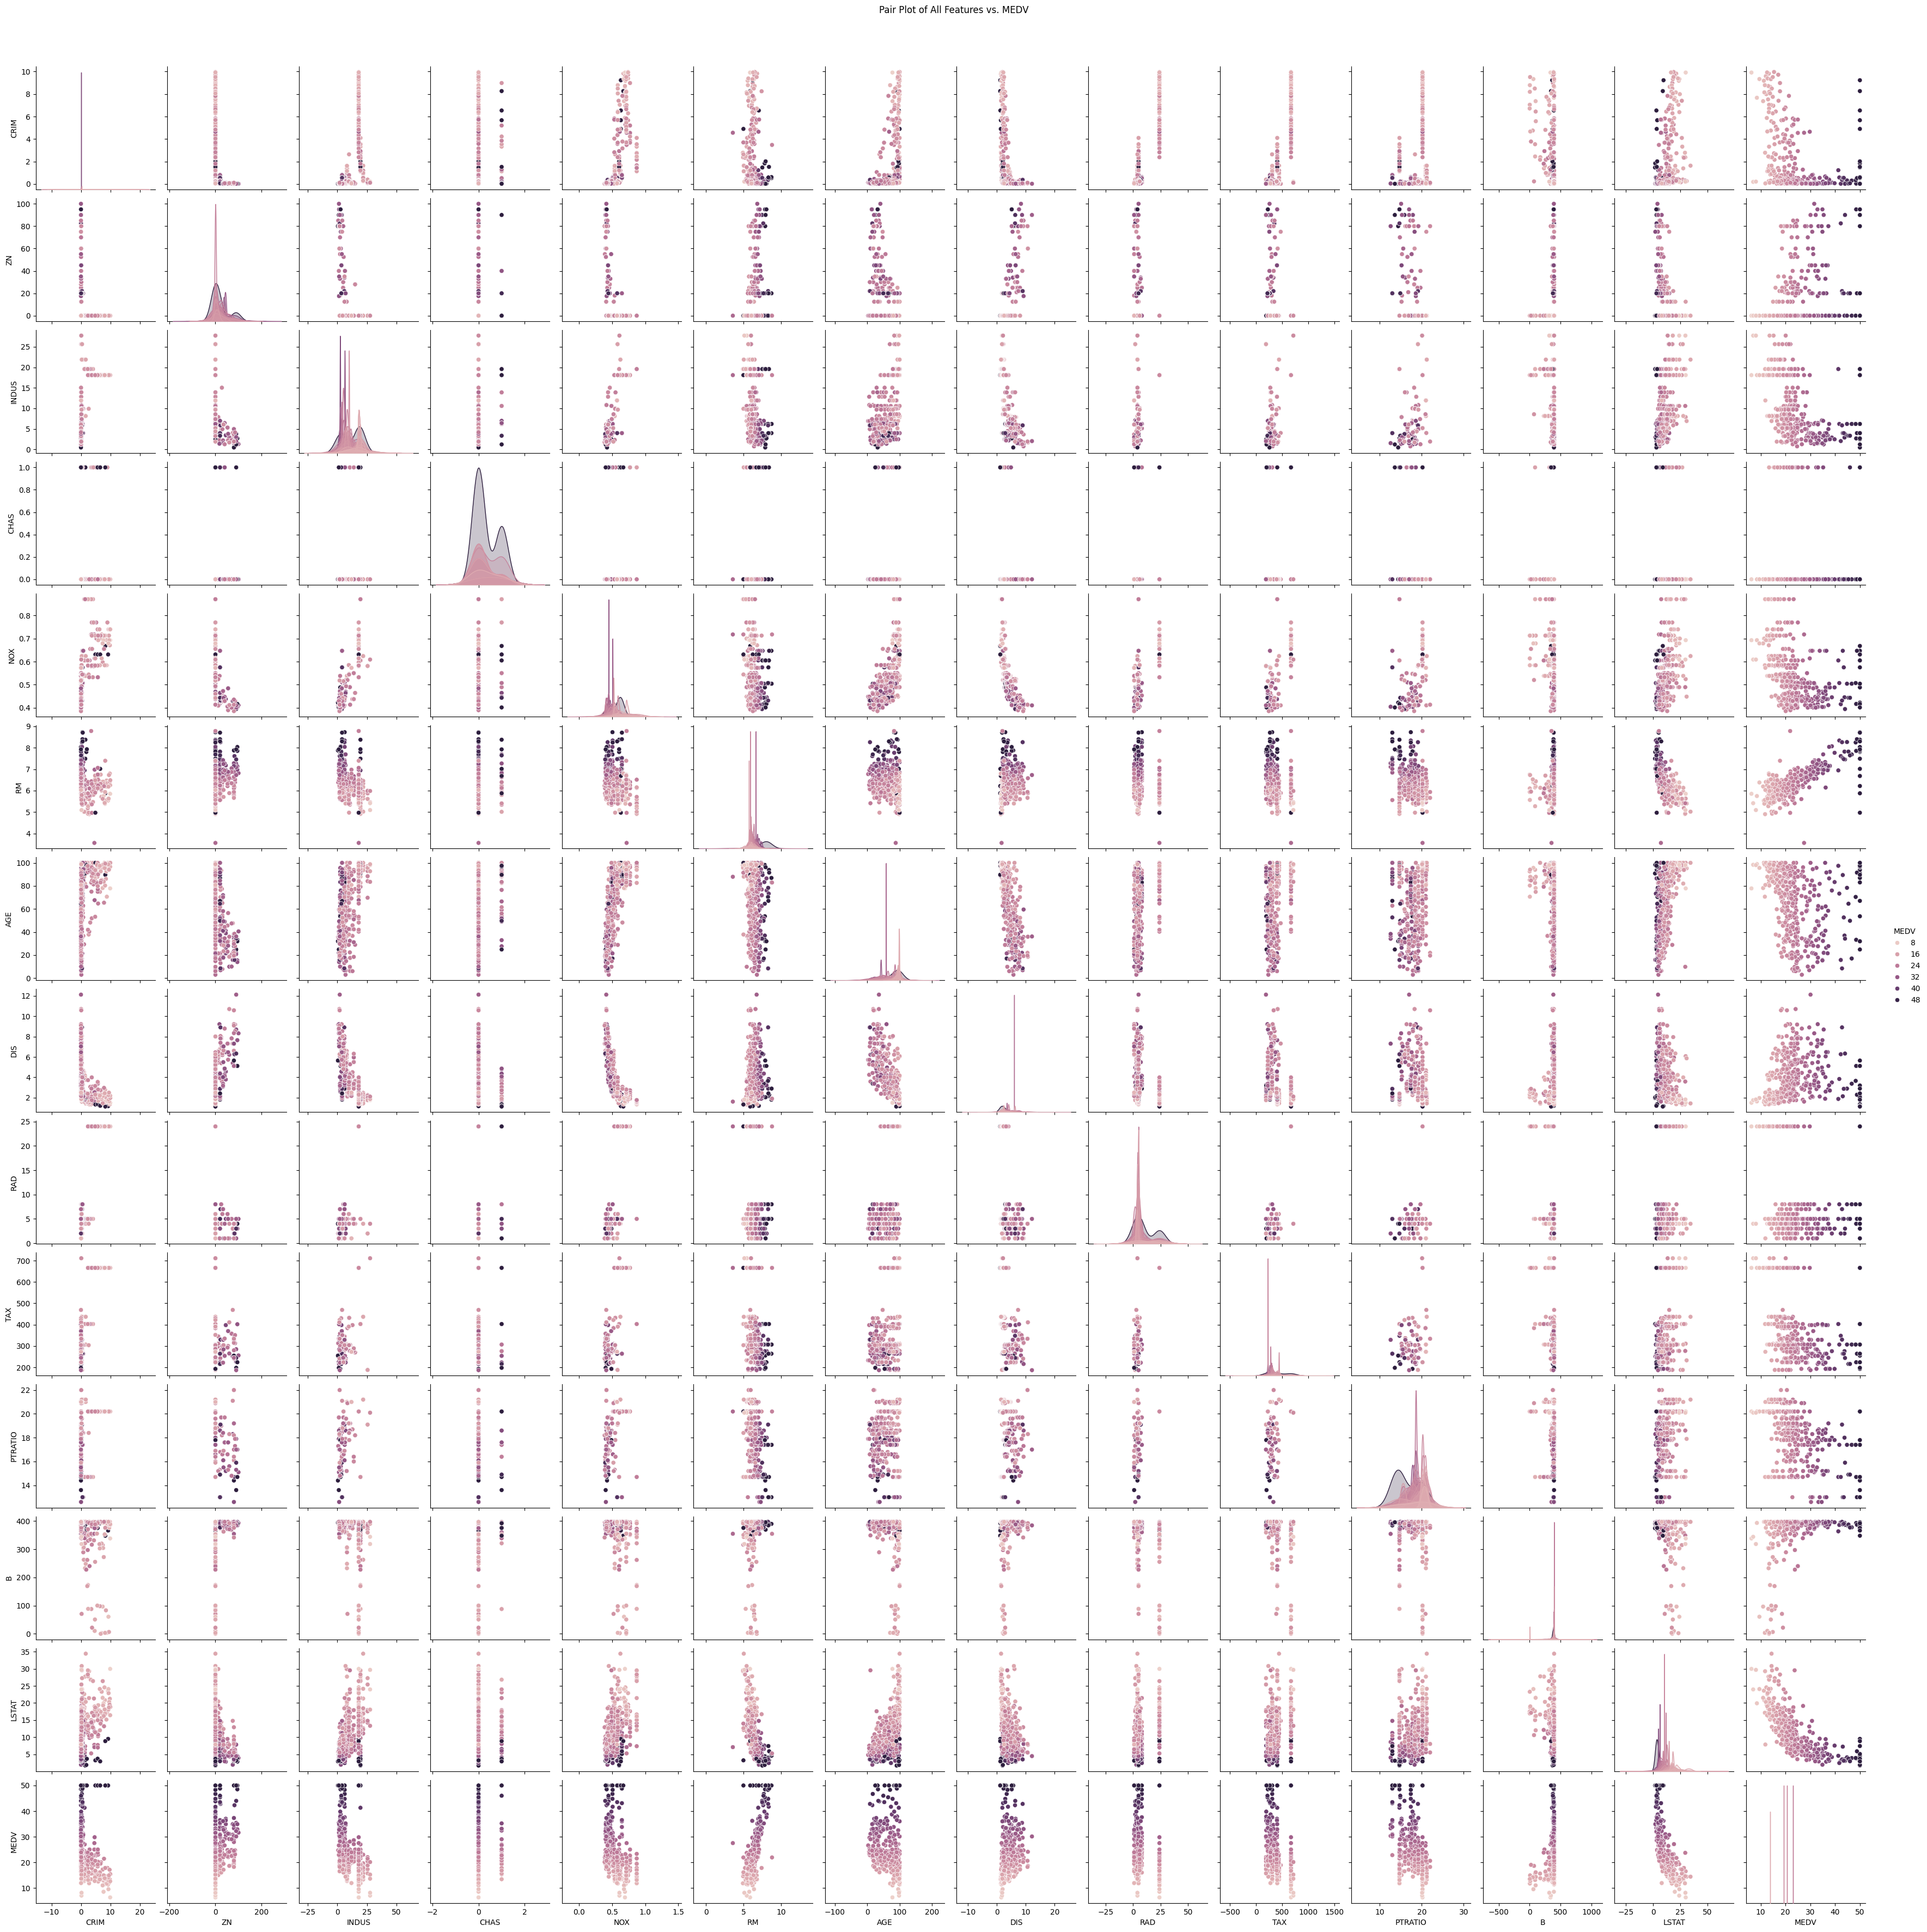

In [16]:
sns.pairplot(df, vars=features, hue = 'MEDV')
plt.suptitle('Pair Plot of All Features vs. MEDV', y=1.02)
plt.show()

#### 1.6.2: Feature Distribution Analysis (Density Plots)
Use density plots to visualize feature distributions.

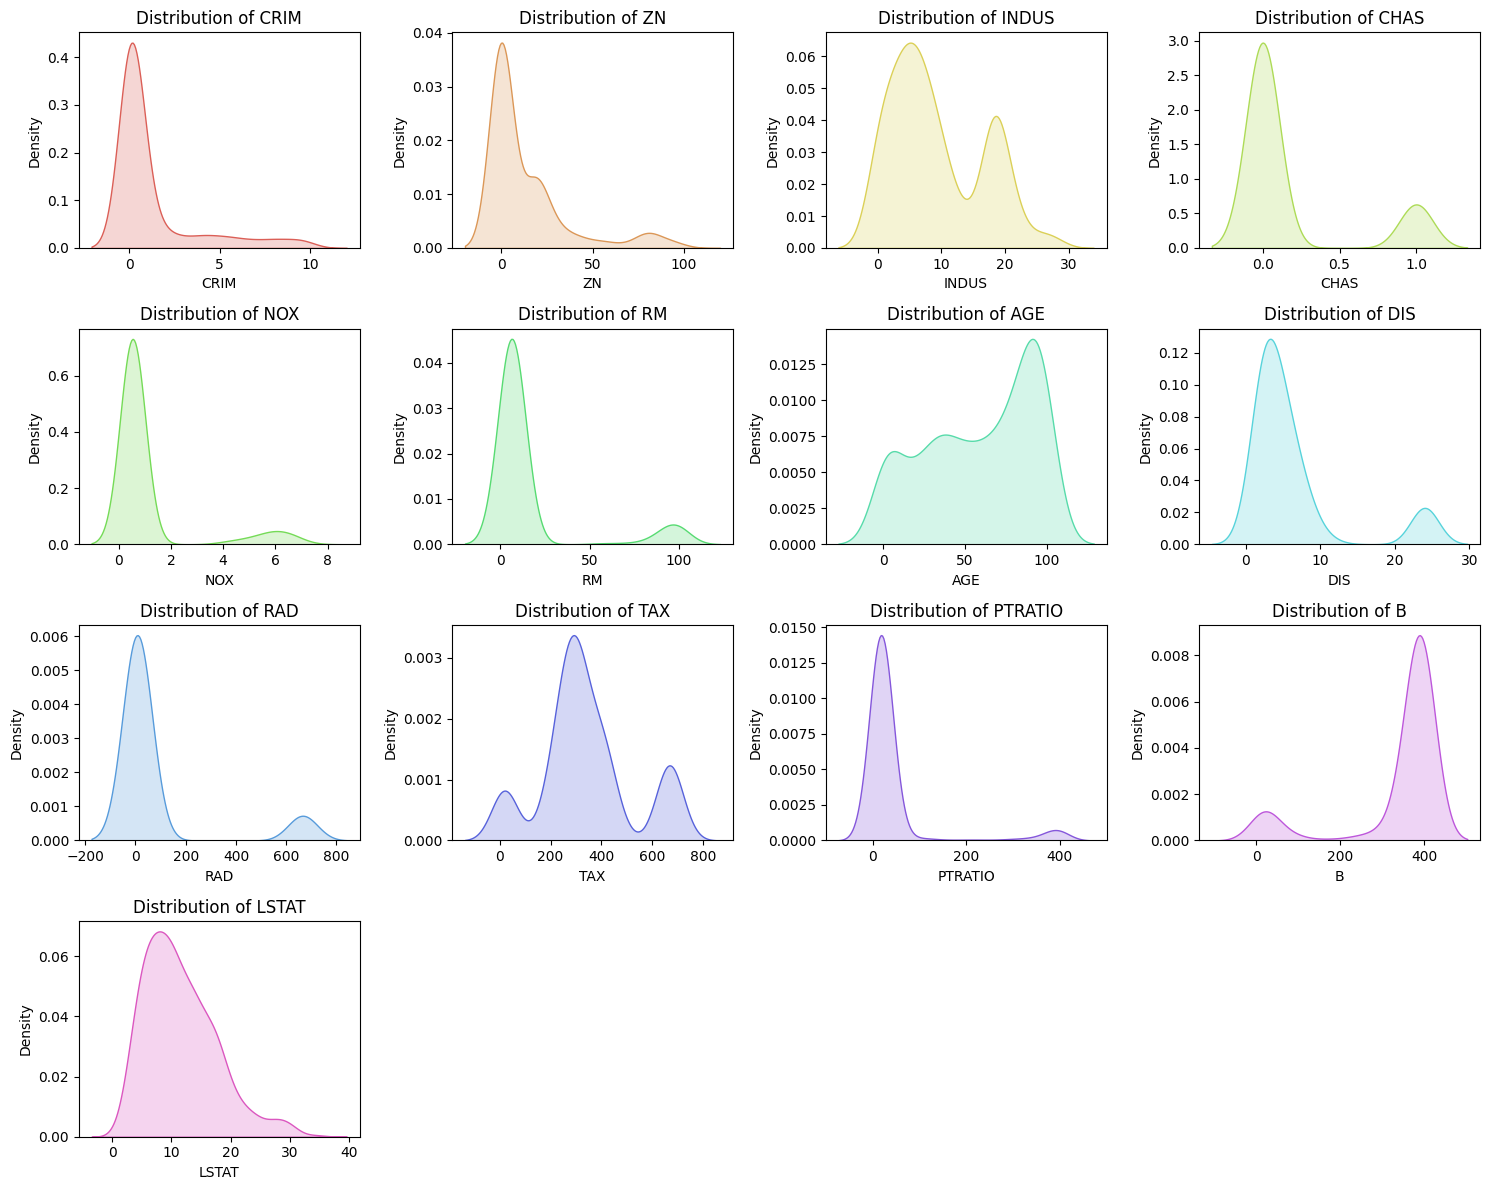

In [17]:
plt.figure(figsize=(15, 12))
for idx, feature in enumerate(df.columns[:-1], start=1):
    plt.subplot(4, 4, idx)
    sns.kdeplot(df[feature], fill=True, color=feature_color_map[feature])
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


#### 1.6.3: Feature Scaling Analysis:
Normalize/standardize the data to analyze the impact of scaling.

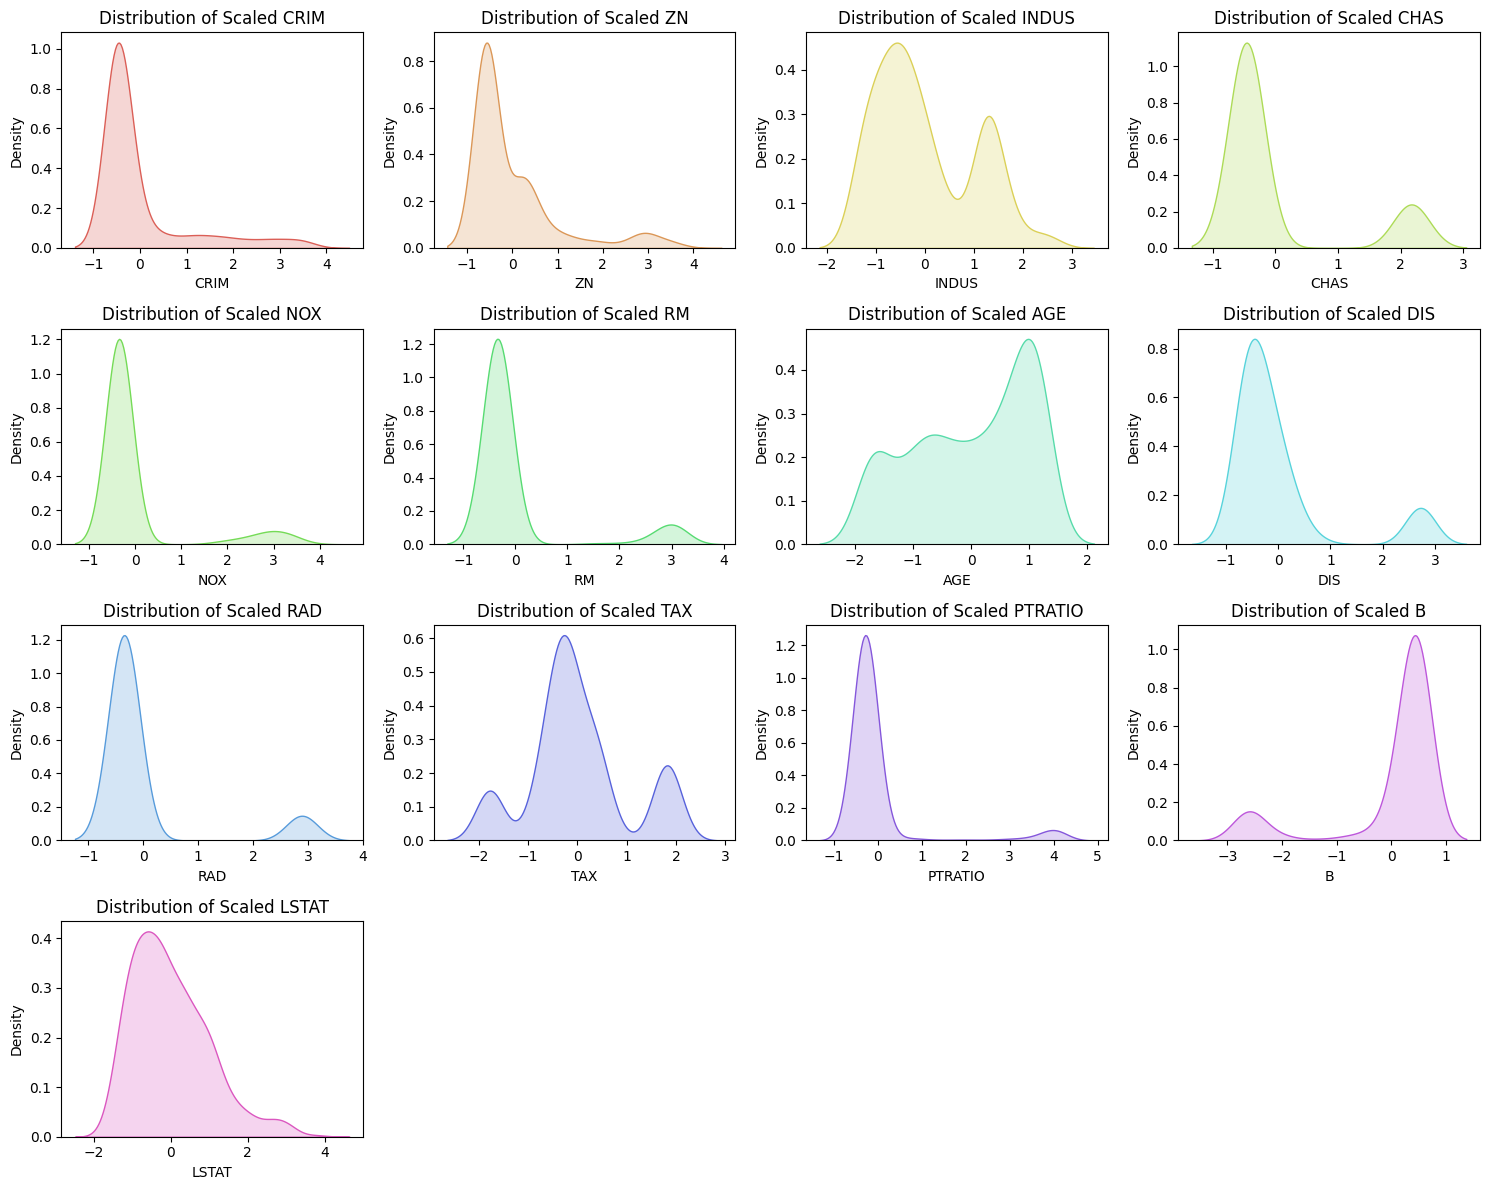

In [18]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, :-1])
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_df['MEDV'] =df['MEDV']

plt.figure(figsize=(15, 12))
for idx, feature in enumerate(scaled_df.columns[:-1], start=1):
    plt.subplot(4, 4, idx)
    sns.kdeplot(scaled_df[feature], fill = True, color=feature_color_map[feature])
    plt.title(f'Distribution of Scaled {feature}')
plt.tight_layout()
plt.show()

#### 1.6.4: Outlier Detection (Box Plots):
Box plots can help identify outliers in continuous features.

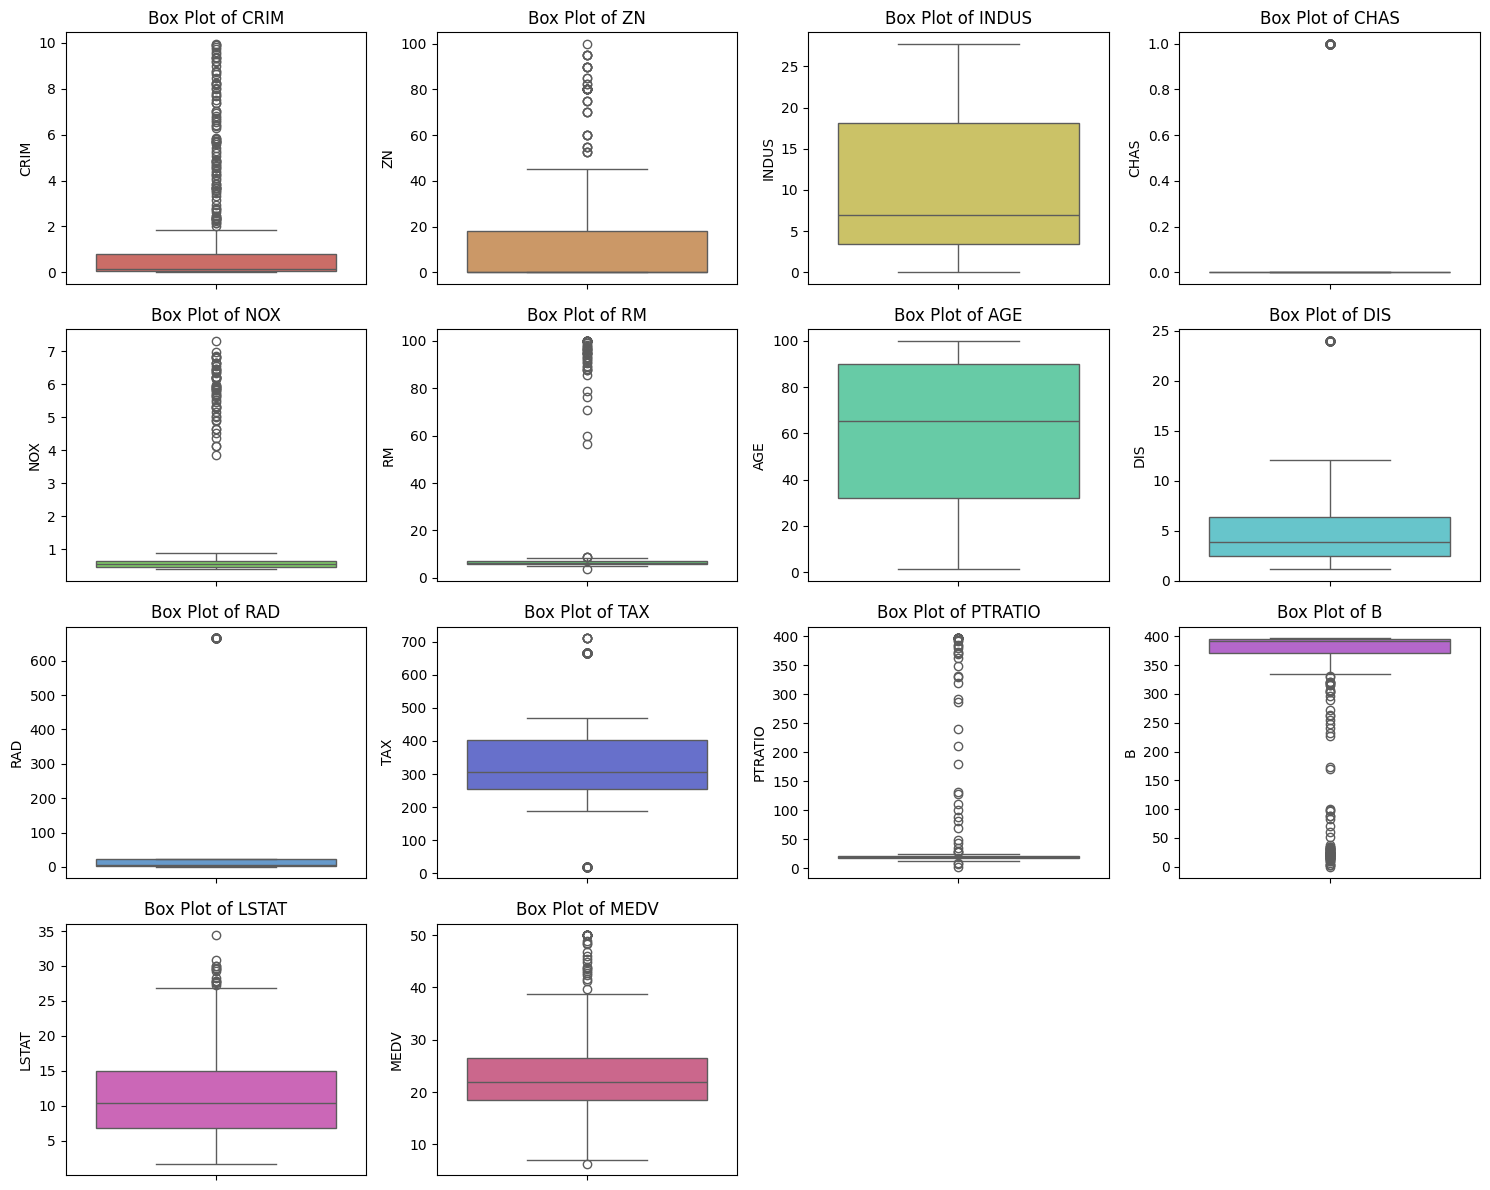

In [19]:
plt.figure(figsize=(15, 12))
for idx, feature in enumerate(df.columns, start=1):
    plt.subplot(4, 4, idx)
    sns.boxplot(y=df[feature], color=feature_color_map[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


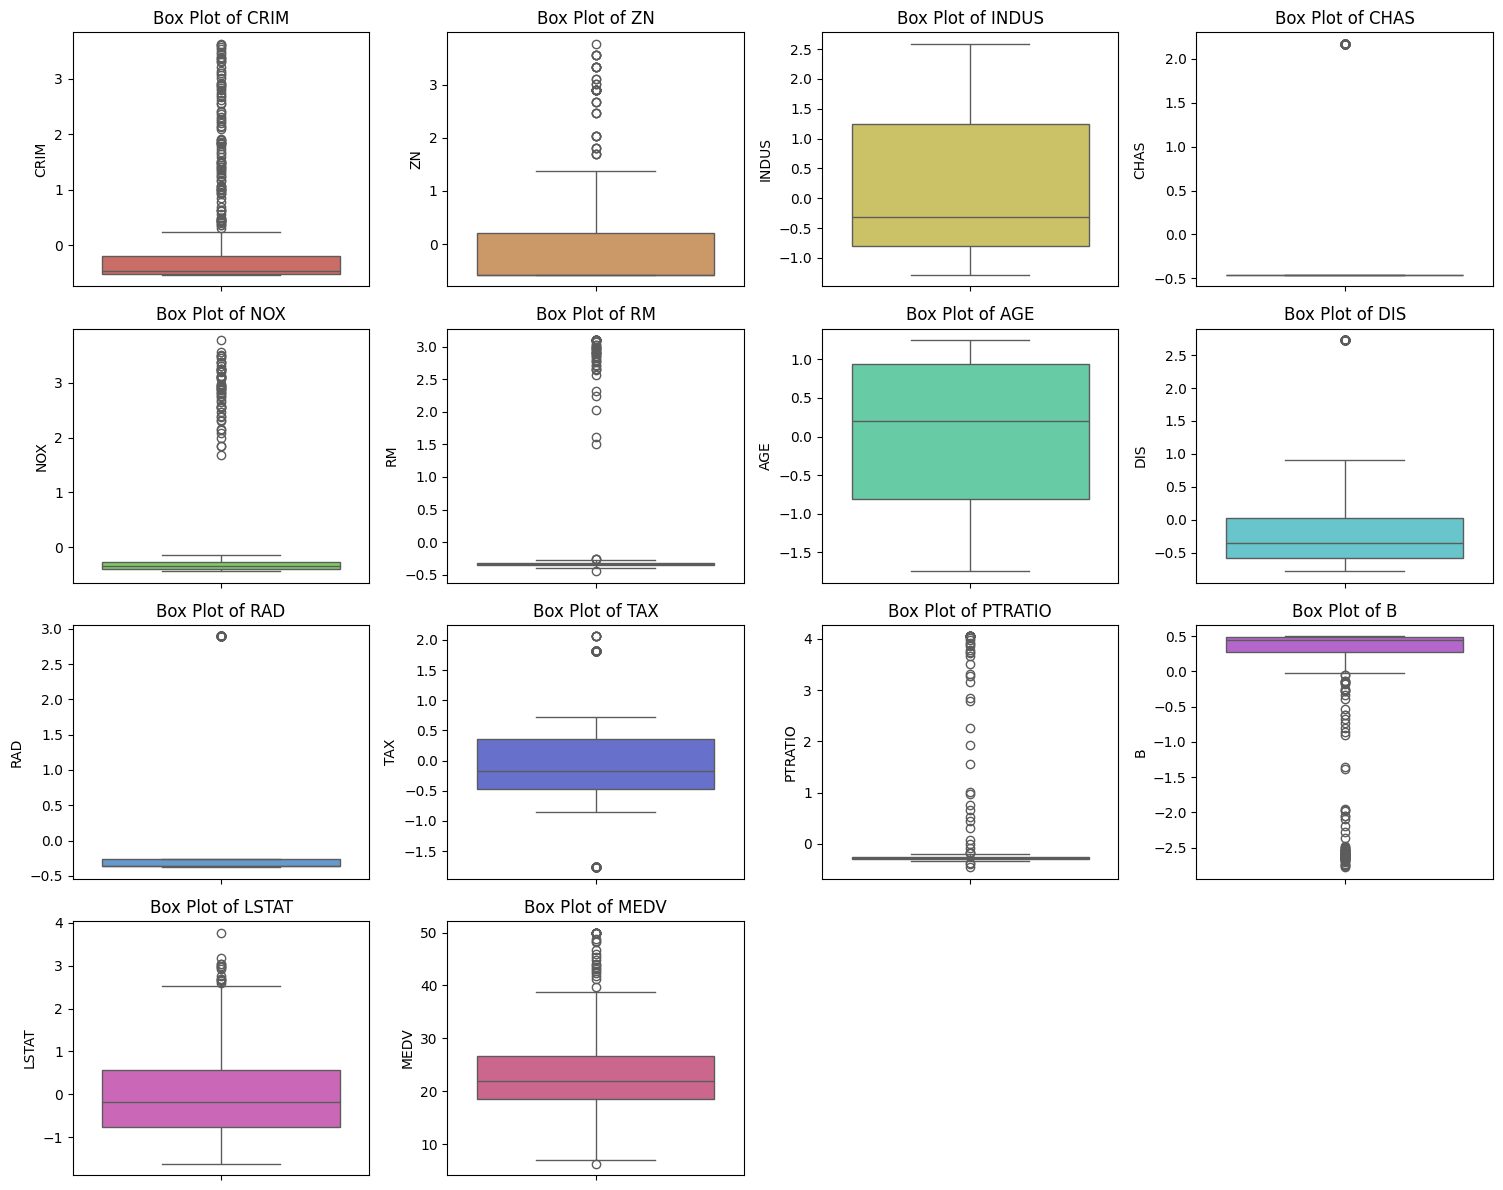

In [20]:
plt.figure(figsize=(15, 12))
for idx, feature in enumerate(df.columns, start=1):
    plt.subplot(4, 4, idx)
    sns.boxplot(y=scaled_df[feature], color=feature_color_map[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

#### 1.6.5: Outlier Detection using Z-Score:
Identify and visualize outliers using statistical methods.

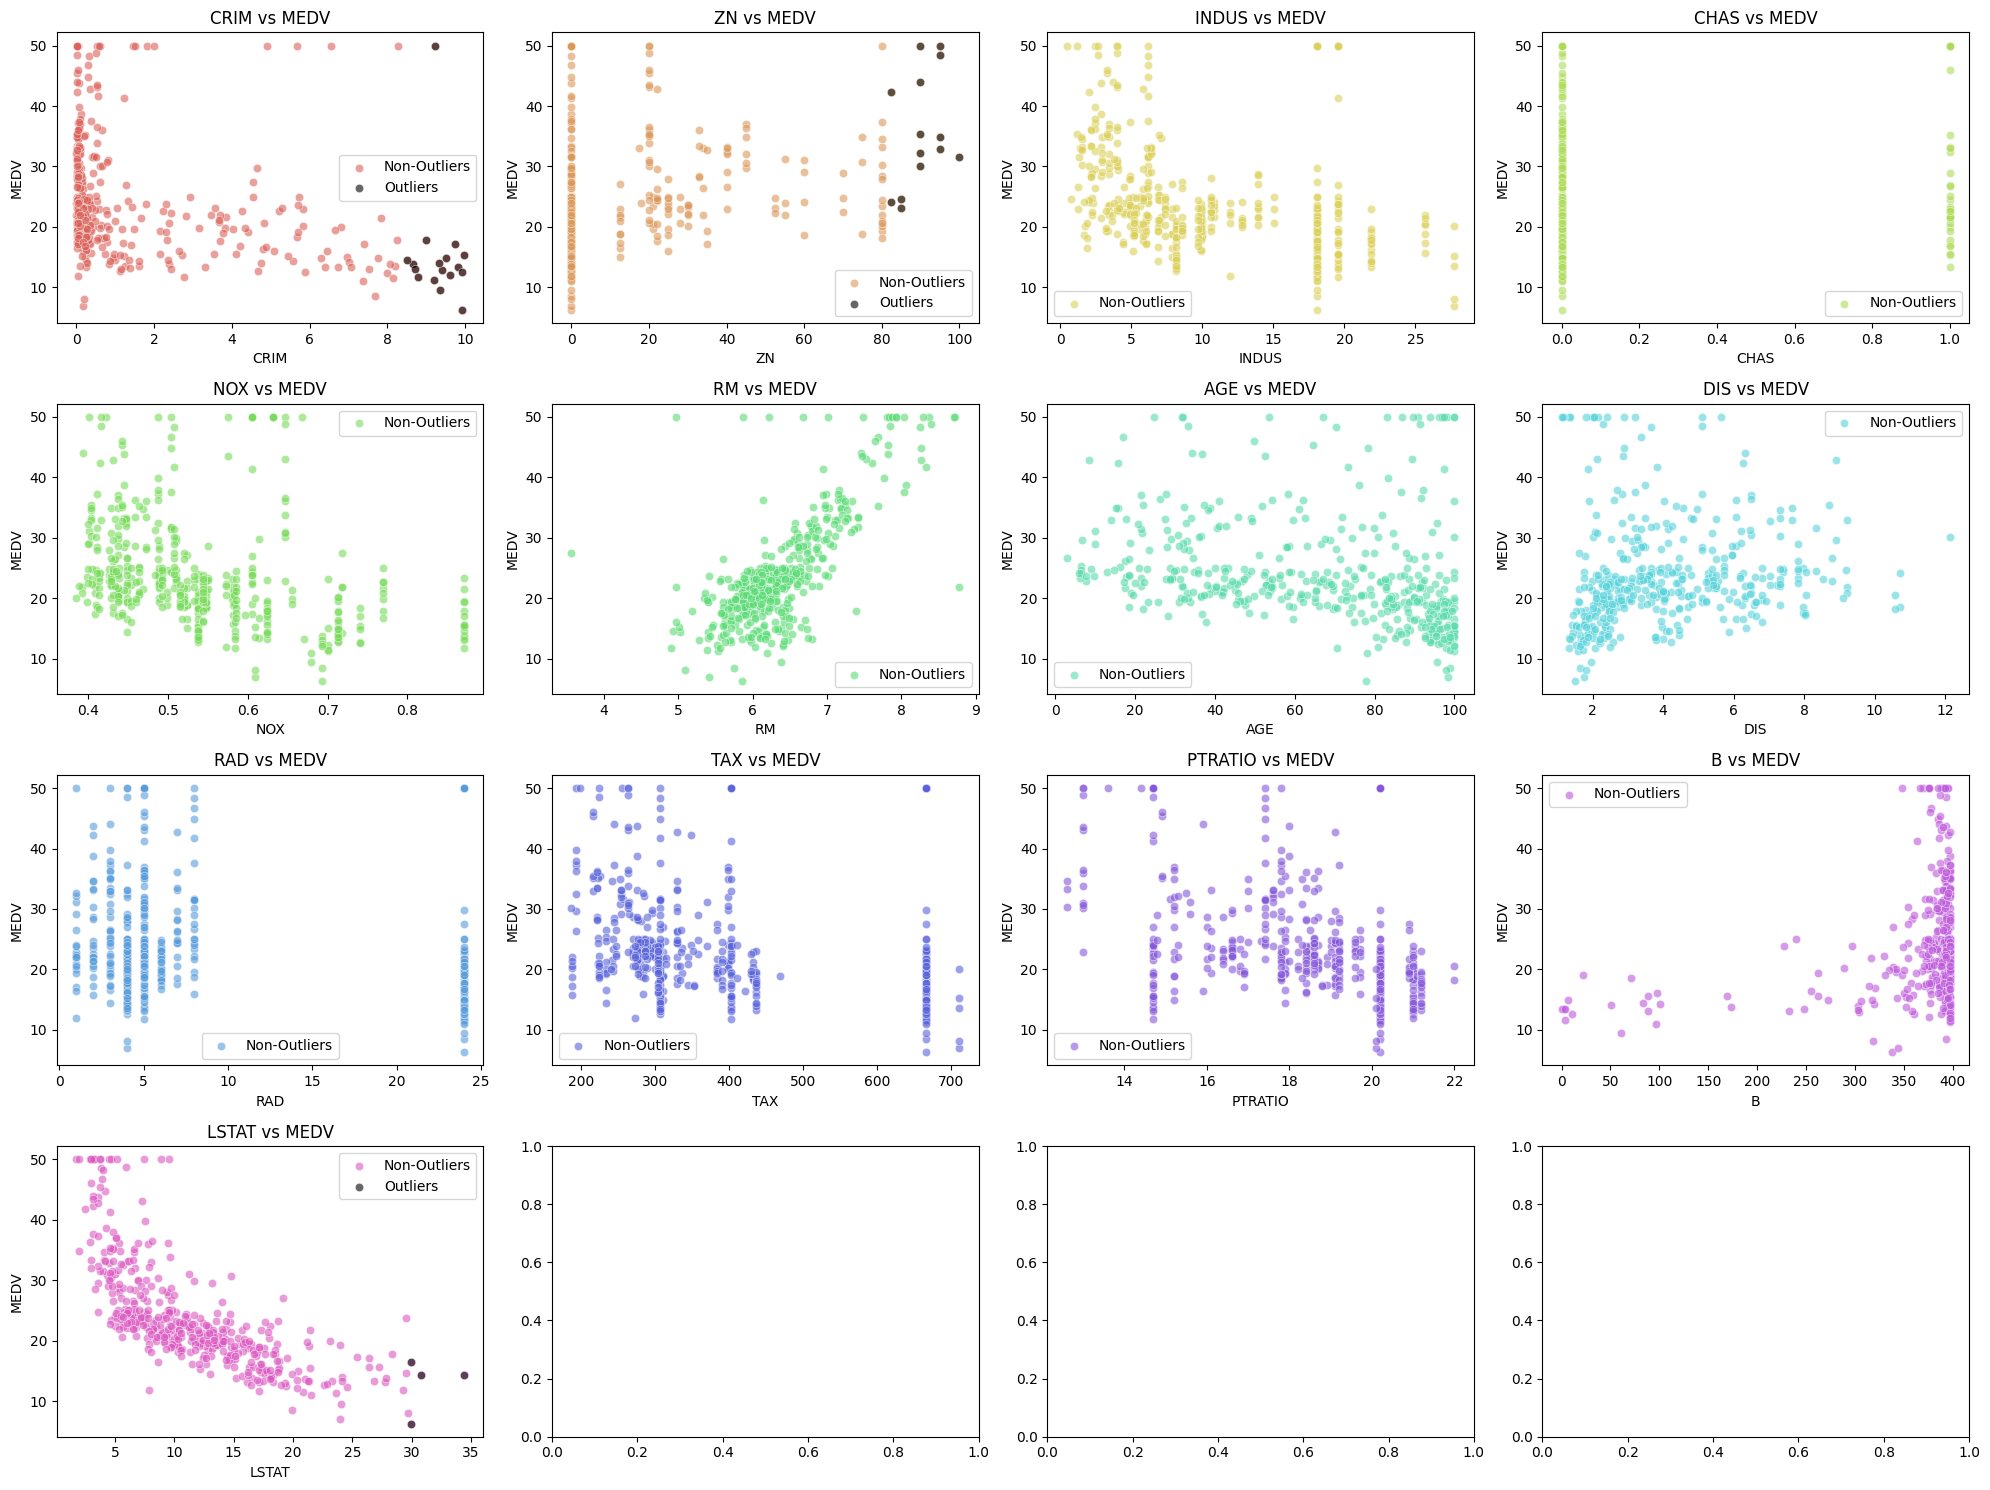

In [21]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df_z = pd.DataFrame(z_scores, columns=df.columns)

# Identify outliers using the threshold Z > 3
outliers = df_z > 3

fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.flatten()

for idx, feature in enumerate(df.columns[:-1]):
    ax = axes[idx]

    sns.scatterplot(x=df[feature], y=df['MEDV'],color=feature_color_map[feature], label='Non-Outliers', ax=ax, alpha=0.6)

    sns.scatterplot(x=df.loc[outliers[feature], feature], y=df.loc[outliers[feature], 'MEDV'], color='black', label='Outliers', ax=ax, alpha=0.6)
    ax.set_title(f'{feature} vs MEDV')
    ax.set_xlabel(feature)
    ax.set_ylabel('MEDV')
    ax.legend()

plt.tight_layout()
plt.show()


## Part 2: Preprocessing Data  

**Important Phase of Any Machine Learning Project: Preprocessing Phase**

In this phase, we transform the data format, clean, and summarize it to use it for training a machine learning model. In the real world, collected information isn't easily controlled, so the dataset contains out-of-range, impossible, missing, and misleading values for training the model. This phase enables us to have a more efficient model with higher learning speed.

**7. Methods for Filling Missing Values**  
**8. Column Removal**  
**9. Numerical vs. Categorical Features**  
**10. Normalizing vs. Standardizing Numerical Features**  
**11. Preprocessing Categorical Features**  
**12. Train, Validation, and Test Split**  
**13. Other Preprocessing Methods**  


### 2.7: Methods for Filling Missing Values

#### Missing Data Summary
The dataset contains missing values in the following features:
- **`CHAS`:** 26 missing values (5.13%)
- **`DIS`:** 27 missing values (5.34%)
- **`B`:** 20 missing values (3.95%)
- **`MEDV`:** 54 missing values (10.67%)


#### 2.7.1: Mean Imputation  
 Suitable for numerical features with normal distributions.

In [24]:
df['DIS'].fillna(df['DIS'].median(), inplace=True)

#### 2.7.2: Median Imputation
The median is less sensitive to outliers than the mean, making it suitable for skewed data.

In [25]:
df['B'].fillna(df['B'].median(), inplace=True)

#### 2.7.3: Mode Imputation
Effective for categorical features like `CHAS`.

In [26]:
df['CHAS'].fillna(df['CHAS'].mode()[0], inplace=True)

#### 2.7.4: Predictive Modeling  
Impute missing values using predictions based on other features.

In [27]:
# predictor_features = df.dropna().drop(['MEDV'], axis=1)
# target = df.dropna()['MEDV']

# rf = RandomForestRegressor()
# rf.fit(predictor_features, target)

# missing_b_indices = df[df['MEDV'].isnull()].index
# df.loc[missing_b_indices, 'MEDV'] = rf.predict(df.loc[missing_b_indices, predictor_features.columns])

In [28]:
df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV       54
dtype: int64

#### we should not fill the missing values in the target column (`MEDV`) because:
- **Bias Risk:** Filling the target values with median, mean, or other methods can introduce bias into the model and distort its ability to learn the true relationships between features and target.
- **Model Performance:** Imputed target values could mislead the model, leading to incorrect predictions.

#### Solution:
Instead of filling the missing target values, we will:
1. **Exclude Rows with Missing `MEDV` from Training:**
   - We won't use these rows for training the model to ensure accurate learning.
2. **Use Rows with Missing `MEDV` for Testing:**
   - Rows with missing target values can be used for testing once we have a trained model. The model will predict these missing values as a separate test set.


### 2.8: Column Removal

**Question**: Is it possible to remove certain columns? Why?  

**Answer**:  
Yes, it is possible to remove certain columns. Here’s a rationale and approach for removing columns:  
(Criteria for Column Removal)
1. **Irrelevant Features:** Columns that don't significantly contribute to the target variable (`MEDV`).
2. **High Missing Rate:** Columns with a high percentage of missing values (>60%).
3. **Multicollinearity:** Features that are highly correlated with each other.
4. **Low Variance:** Features that show very little variation.

#### Columns Removal Example and Reasoning

**1. `CHAS`:**
- **Reason:** Binary variable indicating proximity to the Charles River.
- **Observation:** The correlation with `MEDV` is weak (`+0.14`), making it a less influential feature.

**2. `B`:**
- **Reason:** Calculated feature related to the proportion of Black residents.
- **Observation:** Moderate correlation with `MEDV` (`+0.27`), but contains 20 missing values (3.95%).

**3. `RAD`:**
- **Reason:** Index of accessibility to radial highways.
- **Observation:** High correlation with `TAX` (`+0.91`), introducing multicollinearity.

##### Summary
Removing irrelevant and redundant columns simplifies the dataset and improves model interpretability, allowing the model to focus on more significant features.

In [29]:
columns_to_remove = ['CHAS', 'B', 'RAD']
df_clean = df.drop(columns=columns_to_remove)


In [30]:
remaining_columns = df_clean.columns.tolist()
print(f"Remaining Columns: {remaining_columns}")


Remaining Columns: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']


### 2.9: Numerical vs. Categorical Features

#### What are Numerical and Categorical Features?

1. **Numerical Features:**
   - **Definition:** Features that represent quantitative values (either discrete or continuous).
   - **Types:**
     - **Continuous:** Can take any value within a range.
     - **Discrete:** Countable values.

2. **Categorical Features:**
   - **Definition:** Features that represent qualitative values, usually divided into categories.
   - **Types:**
     - **Nominal:** Categories without an inherent order.
     - **Ordinal:** Categories with an inherent order.

#### Differences between Numerical and Categorical Features
- **Data Type:**
  - **Numerical:** Usually stored as `float` or `int`.
  - **Categorical:** Usually stored as `object` or `category`.
  
- **Statistical Summary:**
  - **Numerical:** Mean, median, standard deviation, etc.
  - **Categorical:** Mode, count of each category.

- **Visualization:**
  - **Numerical:** Histograms, box plots, scatter plots.
  - **Categorical:** Bar charts, pie charts.

#### Identify Numerical and Categorical Features in the Dataset

**Categorical Features:**
- **`CHAS`:** Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **`RAD`:** Index of accessibility to radial highways

**Numerical Features:**
- **`CRIM`:** Per capita crime rate by town
- **`ZN`:** Proportion of residential land zoned for lots over 25,000 sq. ft.
- **`INDUS`:** Proportion of non-retail business acres per town
- **`NOX`:** Nitric oxides concentration
- **`RM`:** Average number of rooms per dwelling
- **`AGE`:** Proportion of owner-occupied units built before 1940
- **`DIS`:** Weighted distances to five Boston employment centers
- **`TAX`:** Full-value property tax rate per $10,000
- **`PTRATIO`:** Pupil-teacher ratio by town
- **`B`:** 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town
- **`LSTAT`:** Percentage of lower status of the population
- **`MEDV`:** Median value of owner-occupied homes in 1,000s (Target Variable)



In [31]:
categorical_features = ['CHAS', 'RAD']
numerical_features = [col for col in df.columns if col not in categorical_features]

print(f"Categorical Features: {categorical_features}")
print(f"Numerical Features: {numerical_features}")


Categorical Features: ['CHAS', 'RAD']
Numerical Features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


### 2.10: Normalizing vs. Standardizing Numerical Features

#### Purpose of Normalizing and Standardizing
**Normalization and Standardization** are methods used to transform numerical features to improve the performance and training stability of machine learning models.

**1. Normalization**
- **Purpose:** Scale the data to a specific range, typically `[0, 1]` or `[-1, 1]`.
- **When to Use:**
  - Features are not normally distributed.
  - Models sensitive to feature magnitudes (e.g., K-Nearest Neighbors, Neural Networks).

**2. Standardization**
- **Purpose:** Transform the data to have zero mean and unit variance.
- **When to Use:**
  - Features are normally distributed.
  - Models assuming Gaussian distribution of features (e.g., Linear Regression, SVM).


#### Differences Between Normalization and Standardization
- **Normalization:**
  - **Output Range:** `[0, 1]` or `[-1, 1]`
  - **Formula:** 
    $$
    X_{\text{normalized}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
    $$
  - **Application:** Models sensitive to scale (e.g., KNN, Neural Networks).

- **Standardization:**
  - **Output Range:** Centered around 0 with unit variance.
  - **Formula:** 
    $$
    X_{\text{standardized}} = \frac{X - \mu}{\sigma}
    $$
  - **Application:** Models assuming Gaussian distribution (e.g., Linear Regression).

#### Is it Necessary in this Project?
Yes, it's necessary to either normalize or standardize numerical features for the following reasons:
1. **Feature Magnitude Disparity:**
   - Features like `CRIM`, `ZN`, `TAX`, and `PTRATIO` have vastly different magnitudes.
2. **Model Suitability:**
   - **Standardization:** For models like Linear Regression, SVM.
   - **Normalization:** For models like K-Nearest Neighbors.

In [32]:
# Choose Scaling Method Based on Model
def normalize_or_standadization(model, dataframe, numerical_col):
    if model in ['KNN', 'SVM', 'Neural Network']:
        scaler = MinMaxScaler()  # Normalization
    else:
        scaler = StandardScaler()  # Standardization
    
    df_scaled = pd.DataFrame(scaler.fit_transform(dataframe), columns=numerical_col)
    return df_scaled

### 2.11: Preprocessing Categorical Features

#### Preprocessing Categorical Features

Categorical features are often represented as strings or objects in a dataset. To effectively use these features for training machine learning models, they need to be converted into numerical formats. Here are some common preprocessing methods for categorical features:

##### 1. Label Encoding
- **Definition:** Assigns each category a unique integer label.
- **Suitable For:**
  - Ordinal features (features with a meaningful order, e.g., `Low`, `Medium`, `High`).


##### 2. One-Hot Encoding
- **Definition:** Converts each category into a new binary column.
- **Suitable For:**
  - Nominal features (features with no inherent order, e.g., `color`, `gender`).

##### 3. Ordinal Encoding
- **Definition:** Assigns numerical values to ordered categories.
- **Suitable For:**
  - Ordinal features where categories have a specific order.

##### 4. Frequency Encoding
- **Definition:** Encode categories based on their occurrence frequency in the dataset.
- **Suitable For:**
  - High cardinality features (features with many unique categories).

##### 5. Target Encoding
- **Definition:** Replaces categories with the mean of the target variable for each category.
- **Suitable For:**
  - High cardinality features that strongly impact the target variable.


###### Summary of Categorical Feature Preprocessing Methods
1. **Label Encoding:** Useful for ordinal features.
2. **One-Hot Encoding:** Ideal for nominal features with fewer unique categories.
3. **Ordinal Encoding:** For ordinal features with an inherent order.
4. **Frequency Encoding:** Useful for high cardinality features.
5. **Target Encoding:** Effective for high cardinality features strongly related to the target variable.

### 2.12: Train, Validation, and Test Split

#### Common Data Splitting Methods
1. **Holdout Method:**
   - Split data into training, validation, and test sets.
   - **Example Split:** 70% training, 15% validation, 15% test.
   - **Pros:** Simple to implement and useful for large datasets.
   - **Cons:** Results can vary based on how data is divided.

2. **K-Fold Cross-Validation:**
   - Split data into `k` folds (typically 5 or 10).
   - Train on `k-1` folds and validate on the remaining fold.
   - Repeat for all `k` folds and average the results.
   - **Pros:** Reduces bias due to train-validation split.
   - **Cons:** Computationally expensive for large datasets.

3. **Stratified K-Fold Cross-Validation:**
   - Similar to K-Fold but ensures each fold has similar class distribution.
   - **Use Case:** Imbalanced classification problems.

4. **Leave-One-Out Cross-Validation (LOOCV):**
   - Train on all data except for one observation and use it as validation.
   - **Pros:** Comprehensive validation.
   - **Cons:** Extremely computationally expensive.

#### Train, Validation, and Test Split (70% Train, 15% Validation, 15% Test)
Since the target column (`MEDV`) has missing values that we should not use for training, we'll allocate all rows with missing target values to the test set first. After that, we'll split the remaining data into training and validation sets.

#### Implementation Steps
1. **Separate Rows with Missing `MEDV`:** Assign these rows directly to the test set.
2. **Split Remaining Data (70/15):** Use the remaining data to create training and validation sets.
3. **Combine Test Set:** Add the previously separated rows with missing `MEDV`.

- **Step 1:** Rows with missing target (`MEDV`) are directly placed into `test_data_null_target`.
- **Step 2:** Remaining rows are split into training, validation, and another temporary test set.
- **Step 3:** The temporary test set is combined with the `test_data_null_target` to form the final test set.


In [33]:
def test_train_func(df):
    test_data_null_target = df[df['MEDV'].isna()]

    total_rows = len(df)
    test_set_size = int(0.15 * total_rows)
    additional_test_rows = test_set_size - len(test_data_null_target)
    
    df_non_null = df[df['MEDV'].notna()]
    
    X_non_null = df_non_null.drop(columns='MEDV')
    y_non_null = df_non_null['MEDV']
    X_additional_test, X_train_val, y_additional_test, y_train_val = train_test_split(
        X_non_null, y_non_null, test_size=(1 - additional_test_rows / len(X_non_null)), random_state=42
    )
    
    test_data_additional_non_null = pd.concat([X_additional_test, y_additional_test], axis=1)
    final_test_data = pd.concat([test_data_additional_non_null, test_data_null_target], ignore_index=True)
    
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)
    X_train, X_val, y_train, y_val
    print(f"Training Set: {X_train.shape}, Validation Set: {X_val.shape}, Test Set: {final_test_data.shape}")
    return X_train, X_val, y_train, y_val 


In [34]:
X_train, X_val, y_train, y_val  = test_train_func(df_clean)

Training Set: (354, 10), Validation Set: (77, 10), Test Set: (75, 11)


In [35]:
X_train, y_train

(        CRIM    ZN  INDUS     NOX     RM    AGE     DIS    TAX  PTRATIO  LSTAT
 70   0.08826   0.0  10.81  0.4130  6.417    6.6  5.2873  305.0     19.2   6.72
 503  0.06076   0.0  11.93  0.5730  6.976   91.0  2.1675  273.0     21.0   5.64
 131  1.19294   0.0  21.89  0.6240  6.326   97.7  2.2710  437.0     21.2  12.26
 301  0.03537  34.0   6.09  0.4330  6.590   40.4  5.4917  329.0     16.1   9.50
 53   0.04981  21.0   5.64  0.4390  5.998   21.4  6.8147  243.0     16.8   8.43
 ..       ...   ...    ...     ...    ...    ...     ...    ...      ...    ...
 402  9.59571   0.0  18.10  0.6930  6.404  100.0  1.6390  666.0     20.2  20.31
 281  0.03705  20.0   3.33  0.4429  6.968   37.2  3.9175  216.0     14.9   4.59
 233  0.33147   0.0   6.20  0.5070  8.247   70.4  3.6519  307.0     17.4   3.95
 326  0.30347   0.0   7.38  0.4930  6.312   28.9  5.4159  287.0     19.6   6.15
 94   0.04294  28.0  15.04  0.4640  6.249   77.3  3.6150  270.0     18.2  10.59
 
 [354 rows x 10 columns],
 70     24.2

In [36]:
X_val, y_val

(        CRIM    ZN  INDUS    NOX     RM    AGE     DIS    TAX  PTRATIO  LSTAT
 313  0.26938   0.0   9.90  0.544  6.266   82.8  3.2628  304.0     18.4   7.90
 369  5.66998   0.0  18.10  0.631  6.683   96.8  1.3567  666.0     20.2   3.73
 159  1.42502   0.0  19.58  0.871  6.510  100.0  1.7659  403.0     14.7   7.39
 395  8.71675   0.0  18.10  0.693  6.471   98.8  1.7257  666.0     20.2  17.12
 207  0.25199   0.0  10.59  0.489  5.783   72.7  4.3549  277.0     18.6  18.06
 ..       ...   ...    ...    ...    ...    ...     ...    ...      ...    ...
 168  2.30040   0.0  19.58  0.605  6.319   96.1  2.1000  403.0     14.7  11.10
 490  0.20746   0.0  27.74  0.609  5.093   98.0  1.8226  711.0     20.1  29.68
 21   0.85204   0.0   8.14  0.538  5.965   89.2  4.0123  307.0     21.0  13.83
 120  0.06899   0.0  25.65  0.581  5.870   69.7  2.2577  188.0     19.1  14.37
 248  0.16439  22.0   5.86  0.431  6.433   49.1  7.8265  330.0     19.1   9.52
 
 [77 rows x 10 columns],
 313    21.6
 369    50.0

### 2.13:  Other Preprocessing Methods


#### 1. **Feature Scaling (Normalization and Standardization):**
- **Normalization:** Rescale features to a range of `[0, 1]` or `[-1, 1]`.
- **Standardization:** Rescale features to zero mean and unit variance.


#### 2. **Principal Component Analysis (PCA):**
- **Purpose:** Reduce dimensionality while preserving variance.

#### 3. **Polynomial Features:**
- **Purpose:** Create interaction and polynomial terms.

#### 4. **Feature Selection with SelectKBest:**
- **Purpose:** Select the top `k` features based on statistical tests.

#### 5. **Imbalanced Dataset Handling:**
- **Purpose:** Handle class imbalance using oversampling or undersampling.
- **Methods:**
  - **Oversampling:** SMOTE, ADASYN
  - **Undersampling:** Random Undersampling, NearMiss

#### 6. **Log Transformation:**
- **Purpose:** Reduce skewness in feature distributions.


## Part 3: Training, Evaluation, and Tuning

### Phase 1:Linear Regression

In this section, try to understand the relationships presented for linear regression and implement it without using a pre-built model.

**14. Supervised vs. Unsupervised, Semi-Supervised, and Reinforcement Learning**  
**15. What is Regression, and How Does it Differ from Classification?**  
**16. Explain the Relationships Presented for Linear Regression**  
**17. Notebook Implementation**  
**18. Evaluation Criteria**   
**19. Evaluate with R² Score and RMSE**   
**20. Scatter Plot Comparison**  
Compare the predicted values with the actual values using a scatter plot, where the x-axis shows the actual values, and the y-axis shows the predicted values. Also, draw the line y = x.

#### 3.14. Supervised vs. Unsupervised, Semi-Supervised, and Reinforcement Learning

**Question**: What is the difference between these models, and provide an example for each.  
**Answer**:  
**1. Supervised Learning:**
- **Definition:** Models learn from labeled training data, where each input (feature) has a corresponding output (label).
- **Common Algorithms:** Linear Regression, Random Forest, Support Vector Machine (SVM).

**2. Unsupervised Learning:**
- **Definition:** Models identify patterns and structure from unlabeled data.
- **Common Algorithms:** K-Means Clustering, Principal Component Analysis (PCA), Hierarchical Clustering.

**3. Semi-Supervised Learning:**
- **Definition:** Models learn from both labeled and unlabeled data.
- **Common Algorithms:** Self-Training, Label Propagation, Co-Training.

**4. Reinforcement Learning:**
- **Definition:** Agents learn by interacting with the environment to maximize cumulative rewards.
- **Common Algorithms:** Q-Learning, Deep Q-Networks (DQN), Policy Gradient.

#### 3.15. What is Regression, and How Does it Differ from Classification?

**Question**: What is Regression, and How Does it Differ from Classification?
**Answer**:

**Regression:**
- **Definition:** Regression is a type of supervised learning used to predict continuous numerical values based on input features.
- **Examples:**
  - **Predicting House Prices:** Estimating the price of a house based on features like size, location, and number of rooms.
  - **Forecasting Sales Figures:** Predicting future sales based on past performance.

**Common Regression Algorithms:**
- **Linear Regression:** Finds a linear relationship between the features and target variable.
- **Ridge/Lasso Regression:** Adds regularization to linear regression to prevent overfitting.
- **Decision Tree Regression:** Splits data into decision nodes based on feature values.
- **Support Vector Regression (SVR):** Uses support vector machines to predict numerical values.


**Evaluation Metrics for Regression:**
- **Mean Squared Error (MSE):** Measures the average squared difference between predicted and actual values.
- **Mean Absolute Error (MAE):** Measures the average absolute difference between predicted and actual values.
- **R² Score (Coefficient of Determination):** Indicates the proportion of variance explained by the model.


**Classification:**
- **Definition:** Classification is a type of supervised learning used to predict discrete categorical labels based on input features.
- **Examples:**
  - **Spam Detection:** Predicting whether an email is spam or not.
  - **Image Recognition:** Classifying images into categories like "cat" or "dog."

**Common Classification Algorithms:**
- **Logistic Regression:** Predicts categorical outcomes using a logistic function.
- **Random Forest Classifier:** Uses multiple decision trees to make predictions.
- **Support Vector Machine (SVM):** Maximizes the margin between classes for classification.
- **K-Nearest Neighbors (KNN):** Classifies based on the nearest neighbors in feature space.

**Evaluation Metrics for Classification:**
- **Accuracy:** Proportion of correctly predicted instances.
- **Precision:** Proportion of true positive predictions out of all positive predictions.
- **Recall (Sensitivity):** Proportion of true positive predictions out of all actual positives.
- **F1 Score:** Harmonic mean of precision and recall.


**Differences Between Regression and Classification:**

| Aspect        | Regression                            | Classification                         |
|---------------|--------------------------------------|----------------------------------------|
| **Output**    | Continuous numerical values          | Discrete categorical labels            |
| **Algorithms**| Linear Regression, SVR, Decision Tree| Logistic Regression, SVM, Random Forest|
| **Metrics**   | MSE, MAE, R² Score                    | Accuracy, Precision, Recall, F1 Score  |

##### Summary
- **Regression:** Predicts continuous values (e.g., house prices).
- **Classification:** Predicts categorical labels (e.g., spam vs. non-spam).


#### 3.16. Explain the Relationships Presented for Linear Regression

Linear Regression models the relationship between the target (dependent) variable and one or more independent (feature) variables using a linear equation.

**Key Elements and Relationships in Linear Regression:**

1. **Mathematical Formula:**
   The linear regression model is represented by a linear equation:
   $$
   \hat{y} = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \ldots + \beta_n \cdot x_n
   $$
   where:
   - $\hat{y}$: Predicted target value
   - $\beta_0$: Intercept term (constant)
   - $\beta_i$: Coefficient for the $i$-th feature $x_i$

   The intercept ($\beta_0$) and coefficients ($\beta_i$) define the relationship between the independent variables and the target variable.

2. **Intercept ($\beta_0$):**
   - The value of $\hat{y}$ when all independent variables ($x_i$) are zero.
   - Represents the baseline prediction.

3. **Coeffic
   - The coefficients ($\beta_i$) indicate how much the target value changes for each unit increase in the corresponding feature, assuming all other features remain constant.ients ($\beta_i$):**
   - Measure the change in the predicted target value for a unit change in the corresponding feature, holding all other features constant.
   - Positive coefficients increase the predicted value, while negative coeff5cients decrease it.

4. **Ordinary Least Squares (OLS):**
   - Linear Regression uses Ordinary Least Squares (OLS) to find the best-fitting line by minimizing the sum of squared residuals:
   $$
   J(\beta) = \frac{1}{2N} \sum_{i=1}^{N} (\hat{y_i} - y_i)^2
   $$
   where:
   - $J(\beta)$: Cost function (Mean Squared Error)
   - $N$: Number of training examples
   - $\hat{y_i}$: Predicted value
   - $y_i$: Actual value

   The optimal coefficients ($\beta$) are calculated using the Normal Equation:
   $$
   \beta = (X^T \cdot X)^{-1} \cdot X^T \cdot y
   $$
   where:
   - $X$: Feature matrix (including an intercept term as thassuming all other features remain constant.

**Assumptions of Linear Regression:**
1. **Linearity:** The relationship between features and target is linear.
2. **Homoscedasticity:** Constant variance of residuals across all levels of the independent variables.
3. **No Multicollinearity:** Independent variables should not be highly correlated.
4. **Normal Distribution of Errors:** Residuals should be normally distributed.

**Summary:**
- **Intercept ($\beta_0$)** provides the baseline prediction.
- **Coefficients ($\beta_i$)** quantify the relationship between each feature and the target.
- **Ordinary Least Squares (OLS)** minimizes the sum of squared residuals to find the best-fitting line.



#### 3.17. Notebook Implementation
Complete the sections marked in the notebook. Since the constructed regression function is of degree 1, only one feature can be chosen as input to this function. Which feature provides the most accurate output compared to other features, and why? Explain your reasoning.

**Questions:**  
Since the constructed regression function is of degree 1, only one feature can be chosen as input to this function. Which feature provides the most accurate output compared to other features, and why? Explain your reasoning.

**Answer:**

Among the features, both **RM** (average number of rooms per dwelling) and **LSTAT** (percentage of lower status of the population) show strong correlations with the target variable **MEDV**. However, based on the box plot analysis, **LSTAT** provides the most accurate output.

**Reasoning:**
- **RM** has a high positive correlation with `MEDV`.
- **LSTAT** has an equally strong negative correlation.
- According to the box plot, **LSTAT** shows a clearer distinction between its quartiles and median, implying a more predictable relationship with `MEDV`.
- Linear regression analysis also confirms that **LSTAT** yields a lower RMSE and higher R² score, making it the best single feature for accurate predictions.

Therefore, given the linear regression model of degree 1, **LSTAT** is the most suitable feature for predicting `MEDV` with the greatest accuracy.

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [37]:
def linear_regression(input, output):
    # input = featues!
    mean_x = np.mean(input)
    mean_y = np.mean(output)
    
    numerator = np.sum((input - mean_x) * (output - mean_y))
    denominator = np.sum((input - mean_x) ** 2)
    
    slope = numerator / denominator        # alpga
    intercept = mean_y - (slope * mean_x)  # beta 

    return intercept, slope

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [38]:
def get_regression_predictions(input, intercept, slope):
    f_x = slope * input + +intercept
    return f_x

In [39]:
def linear_func(featur_x, target, df):
    X = df[featur_x]
    y = df[target]
    intercept, slope = linear_regression(X, y)
    print(f'Intercept: {intercept}, Slope: {slope}')

    y_pred = get_regression_predictions(X, intercept, slope)

    return X, y, y_pred, intercept, slope

In [40]:
def plot_linear(X, y, y_pred, featur_x, target):
    plt.figure(figsize=(10,5))
    plt.scatter(X, y,color=feature_color_map[featur_x], label='Data Points')
    plt.plot(X, y_pred, color='black', label='Regression Line')
    plt.xlabel(f'{featur_x}')
    plt.ylabel(target)
    plt.legend()
    plt.show()

In [41]:
df_scaled = normalize_or_standadization("linear", df_clean, df_clean.columns)

Intercept: -3.372657725283505e-17, Slope: -0.6403266946178646


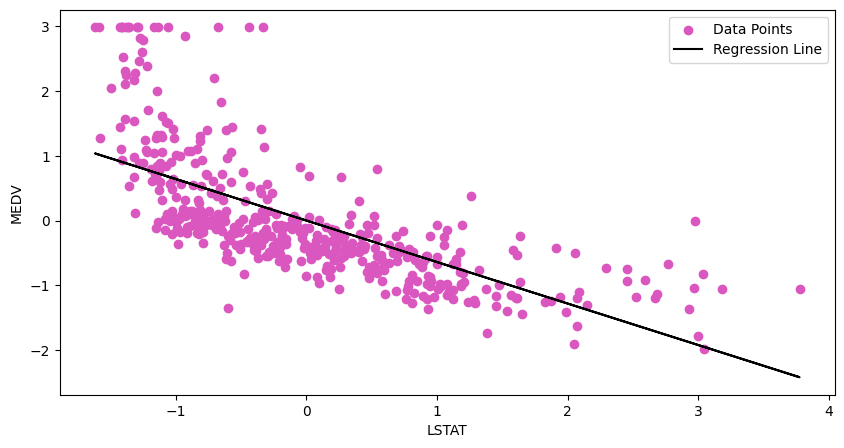

In [42]:
feature = 'LSTAT'
x, y, y_pred_linear_LSTAT, intercept, slope = linear_func(feature, 'MEDV', df_scaled)
plot_linear(x, y, y_pred_linear_LSTAT, feature, 'MEDV')

#### 3.18. Evaluation Criteria
After selecting an appropriate feature from the training data and predicting the test data, a metric is needed to evaluate the performance of the regression output. Since our model is performing a regression task and not classification, classification performance evaluation methods cannot be used. Study the methods RSS, MSE, RMSE, and R² score, and explain each in your report.

##### **Regression Evaluation Metrics**

In regression analysis, various metrics are used to evaluate the performance of a model. The key metrics include **Residual Sum of Squares (RSS)**, **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)**, and **R² score**. Here's a brief explanation of each:

##### 1. **Residual Sum of Squares (RSS)**
The Residual Sum of Squares measures the total deviation of the predicted values from the actual values. It provides insight into how well the regression model fits the data.

**Formula:**
$$\text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$
where:
- $y_i$: Actual value
- $\hat{y_i}$: Predicted value
- $n$: Number of data points

**Interpretation:**
- Lower RSS values indicate a better-fitting model.



##### 2. **Mean Squared Error (MSE)**
The Mean Squared Error calculates the average squared difference between actual and predicted values. It is an extension of RSS by providing an average deviation per data point.

**Formula:**
$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$

**Interpretation:**
- Lower MSE values indicate better model performance.


##### 3. **Root Mean Squared Error (RMSE)**
The Root Mean Squared Error is the square root of the MSE. It provides an interpretation in the same unit as the target variable, making it easier to relate to actual differences.

**Formula:**
$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$

**Interpretation:**
- Lower RMSE values indicate better model performance.



##### 4. **R² Score (Coefficient of Determination)**
The R² Score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with 1 indicating perfect prediction.

**Formula:**
$$\text{R}^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$
where:
- $\bar{y}$: Mean of the actual values

**Interpretation:**
- An R² score closer to 1 indicates better prediction.


##### Conclusion
- **RSS** measures the total deviation of predicted values from actual values.
- **MSE** provides an average deviation per observation.
- **RMSE** makes the metric easier to interpret in the same unit as the dependent variable.
- **R² score** quantifies the proportion of the variance explained by the model.

These metrics collectively help in evaluating the performance and goodness of fit of a regression model.

#### 3.19. Evaluate with R² Score and RMSE
Evaluate the predicted values using R² score and RMSE. Perform the above operations on a few other features as well. What conclusions can you draw from the obtained values?.

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [43]:
def get_root_mean_square_error(predicted_values, actual_values):
  return np.sqrt(np.mean((predicted_values - actual_values) ** 2))

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [44]:
def get_r2_score(predicted_values, actual_values):
    ss_res = np.sum((predicted_values - actual_values) ** 2)
    ss_tot = np.sum((actual_values - np.mean(actual_values)) ** 2)
    return 1 - (ss_res / ss_tot)


Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

Intercept: 2.2799367072713474e-17, Slope: -0.2659701674063809
Feature: CRIM, RMSE: 0.95835216323749, R² Score: 0.08156113121802366


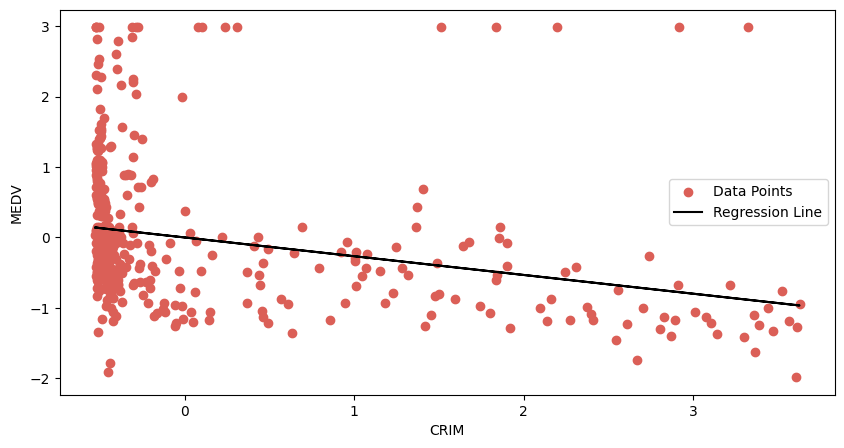

Intercept: 3.470878737513357e-18, Slope: 0.31256223878714423
Feature: ZN, RMSE: 0.9434644145752775, R² Score: 0.1098748984301291


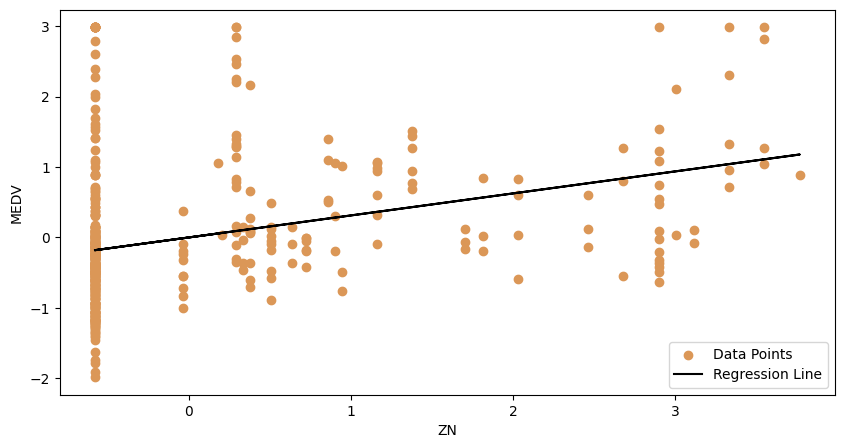

Intercept: 8.622648329713044e-17, Slope: -0.3487954139584224
Feature: INDUS, RMSE: 0.9164066112103897, R² Score: 0.1601989229298899


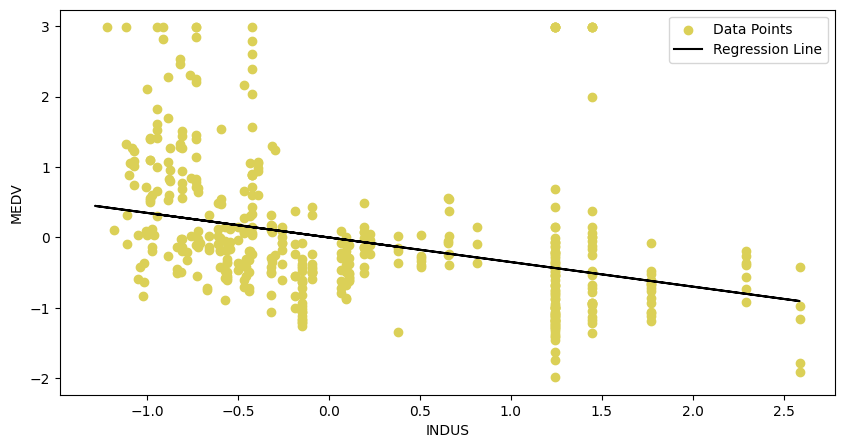

Intercept: 6.706260470698051e-18, Slope: -0.020540113073397155
Feature: NOX, RMSE: 0.9995530748126961, R² Score: 0.0008936506324850324


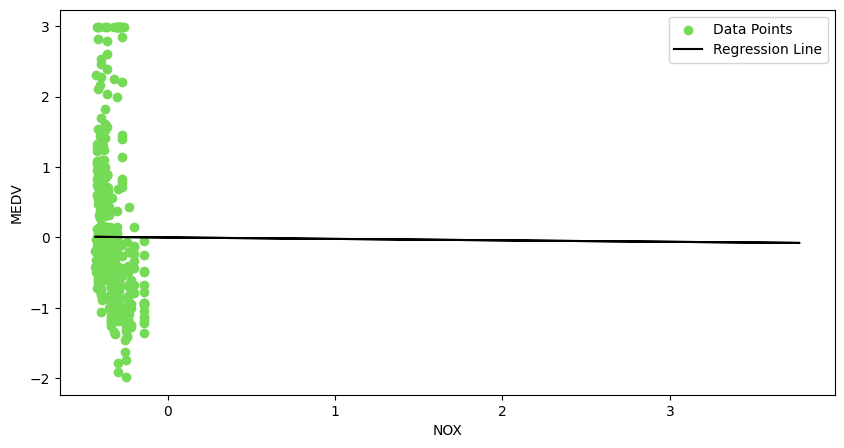

Intercept: 8.314820241578378e-18, Slope: 0.01619509334505482
Feature: RM, RMSE: 0.9997218827093275, R² Score: 0.000556157232117882


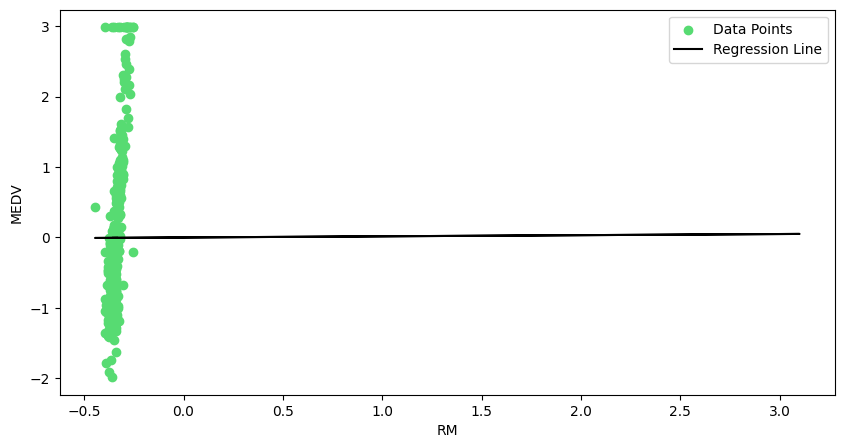

Intercept: 7.859986015045356e-18, Slope: -0.22758615560624765
Feature: AGE, RMSE: 0.9610486859978352, R² Score: 0.0763854231418345


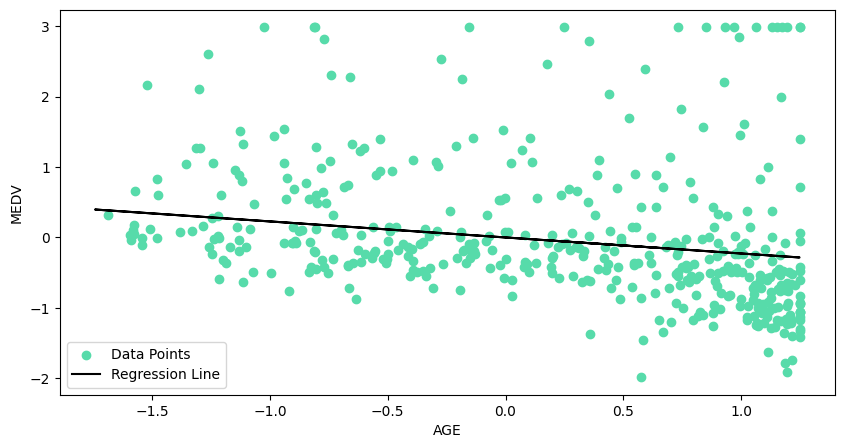

Intercept: 6.8790595835667955e-18, Slope: 0.03492743992359479
Feature: DIS, RMSE: 0.9987604420707874, R² Score: 0.0024775793545656066


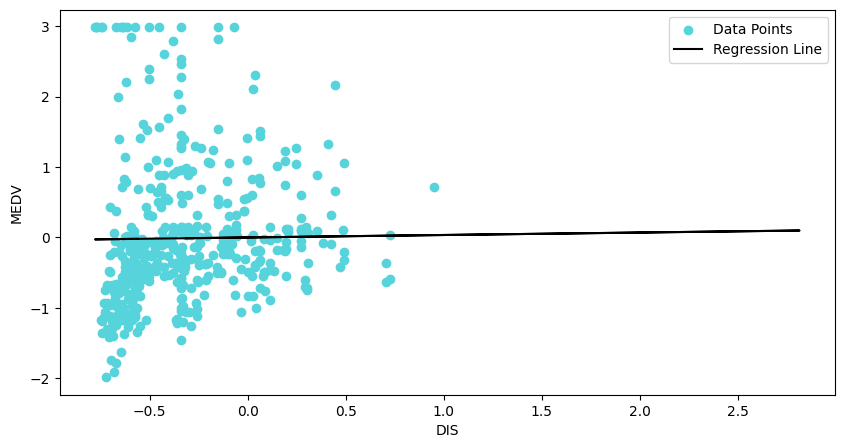

Intercept: -3.041277201221746e-18, Slope: -0.25877116696954167
Feature: TAX, RMSE: 0.9486989609954699, R² Score: 0.09997028140611619


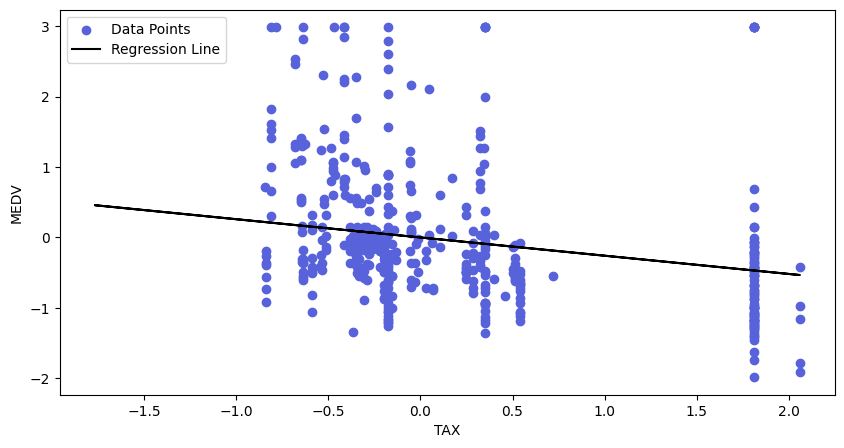

Intercept: 8.150597375240225e-18, Slope: -0.010347677969101902
Feature: PTRATIO, RMSE: 0.9998843128526718, R² Score: 0.0002313609111407322


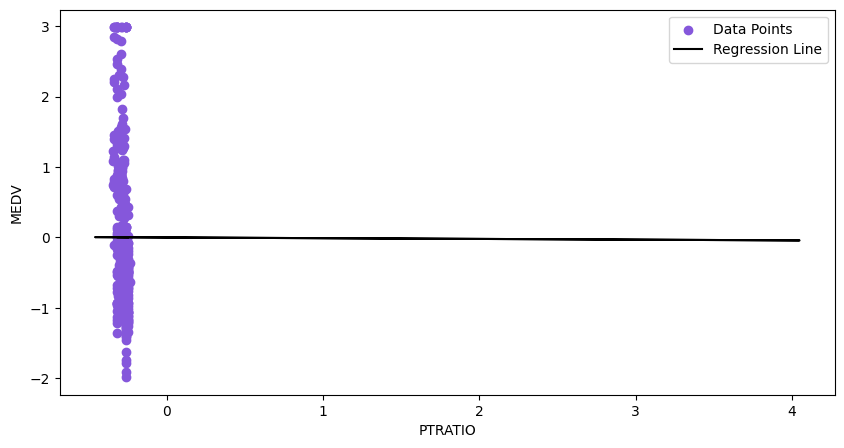

Intercept: -3.372657725283505e-17, Slope: -0.6403266946178646
Feature: LSTAT, RMSE: 0.710268432086008, R² Score: 0.49551875438208404


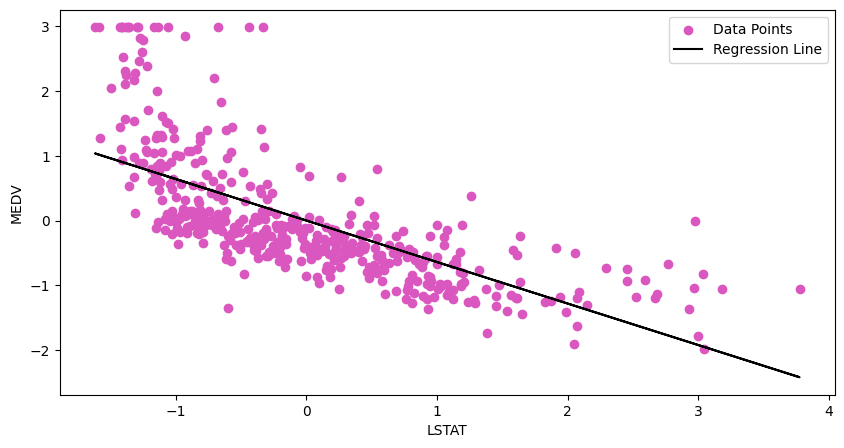

Intercept: 0.0, Slope: 1.0
Feature: MEDV, RMSE: 0.0, R² Score: 1.0


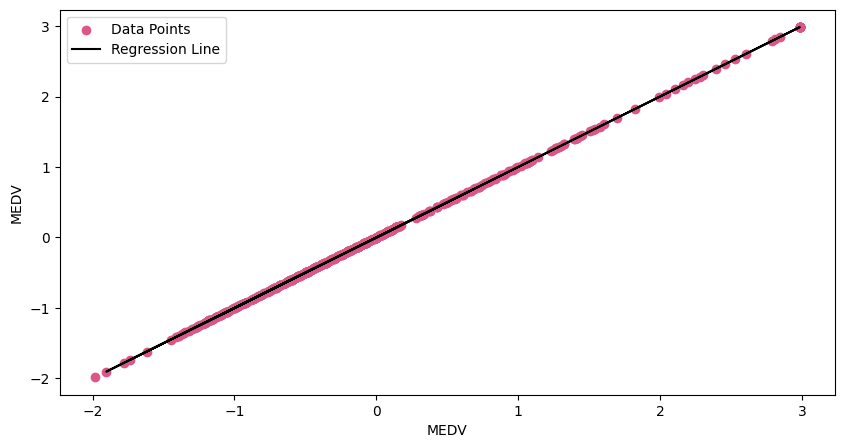

In [45]:
designated_feature_list = df_scaled.columns
results = []

for feature in designated_feature_list:
    x, y, y_pred_temp , intercept, slope = linear_func(feature, 'MEDV', df_scaled)
    rmse = get_root_mean_square_error(y_pred_temp, y)
    r2 = get_r2_score(y_pred_temp, y)
    results.append({'Feature': feature, 'RMSE': rmse, 'R2': r2})

    print(f'Feature: {feature}, RMSE: {rmse}, R² Score: {r2}')
    plot_linear(x, y, y_pred_temp, feature, 'MEDV')

In [46]:
results_df = pd.DataFrame(results)
results_df


Feature      RMSE        R2
0      CRIM  0.958352  0.081561
1        ZN  0.943464  0.109875
2     INDUS  0.916407  0.160199
3       NOX  0.999553  0.000894
4        RM  0.999722  0.000556
5       AGE  0.961049  0.076385
6       DIS  0.998760  0.002478
7       TAX  0.948699  0.099970
8   PTRATIO  0.999884  0.000231
9     LSTAT  0.710268  0.495519
10     MEDV  0.000000  1.000000

In [47]:
filtered_df = results_df[results_df['Feature'] != 'MEDV']

best_feature = filtered_df.loc[filtered_df['R2'].idxmax()]

print(f"The best feature for predicting MEDV is: {best_feature['Feature']} with R2: {best_feature['R2']}")

The best feature for predicting MEDV is: LSTAT with R2: 0.49551875438208404


##### **RMSE and R² Results per Feature:**
   - **Feature-Specific Models:**
     - Models trained with each feature independently show varying performance, with **LSTAT** achieving the best R² score of 0.495519, indicating this feature alone explains nearly 50% of the variance in MEDV.
     - **RM** has a relatively high RMSE of 0.999722 but a low R² score of 0.000556, indicating that while RM is correlated with MEDV, a univariate model does not fully explain the variance.

   - **Noteworthy Findings:**
     - **LSTAT** and **PTRATIO** stand out with comparatively higher R² scores, while other features have low scores.
     - **CRIM, ZN, AGE** all have RMSEs below 1.0, but with low R² scores.

##### Conclusions:
1. **Feature Importance:**
   - **LSTAT, RM, PTRATIO, and INDUS** appear to be the most important features due to their significant correlations with MEDV.

2. **Data Issues:**
   - **Outliers** in several features could skew the model's performance. Treating or removing these outliers might improve model accuracy.

3. **Feature Distribution:**
   - Features like **ZN** have skewed distributions, showing the need for normalization or transformation for better model performance.

4. **Modeling Implications:**
   - **Multivariate Models:** Given the relatively low R² scores for univariate models, using a combination of features would likely yield a better model.
   - **Correlation Analysis:** Prioritizing features like **LSTAT** and **RM** would likely contribute more to predictive accuracy.



#### 3.20. Scatter Plot Comparison
Compare the predicted values with the actual values using a scatter plot, where the x-axis shows the actual values, and the y-axis shows the predicted values. Also, draw the line y = x.

Intercept: 2.2799367072713474e-17, Slope: -0.2659701674063809
Feature: CRIM, RMSE: 0.95835216323749, R² Score: 0.08156113121802366


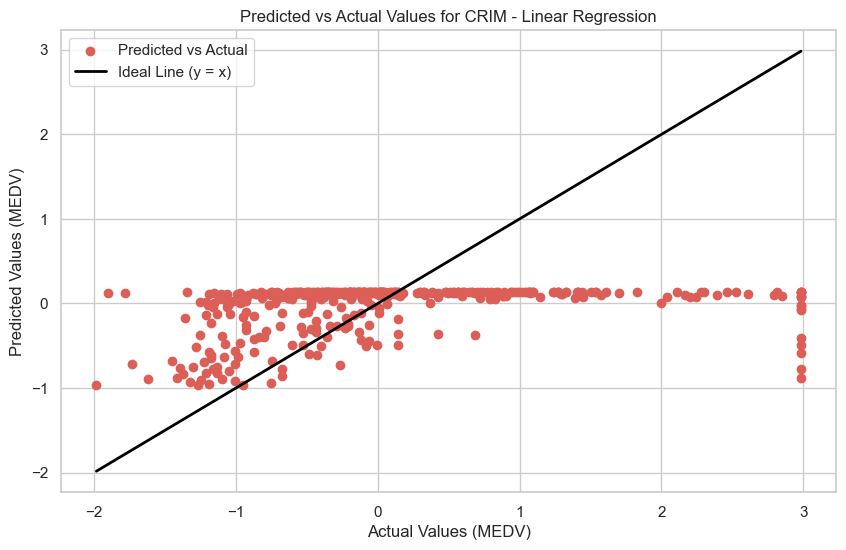

Intercept: 3.470878737513357e-18, Slope: 0.31256223878714423
Feature: ZN, RMSE: 0.9434644145752775, R² Score: 0.1098748984301291


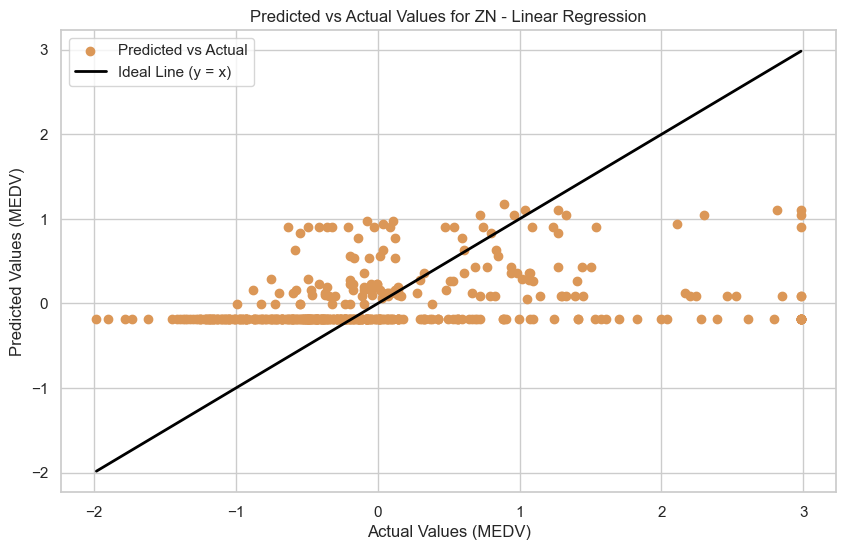

Intercept: 8.622648329713044e-17, Slope: -0.3487954139584224
Feature: INDUS, RMSE: 0.9164066112103897, R² Score: 0.1601989229298899


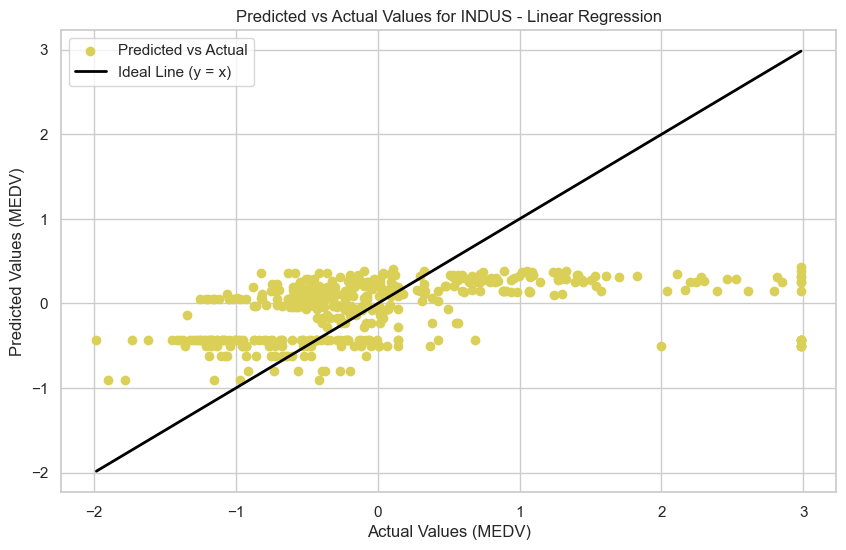

Intercept: 6.706260470698051e-18, Slope: -0.020540113073397155
Feature: NOX, RMSE: 0.9995530748126961, R² Score: 0.0008936506324850324


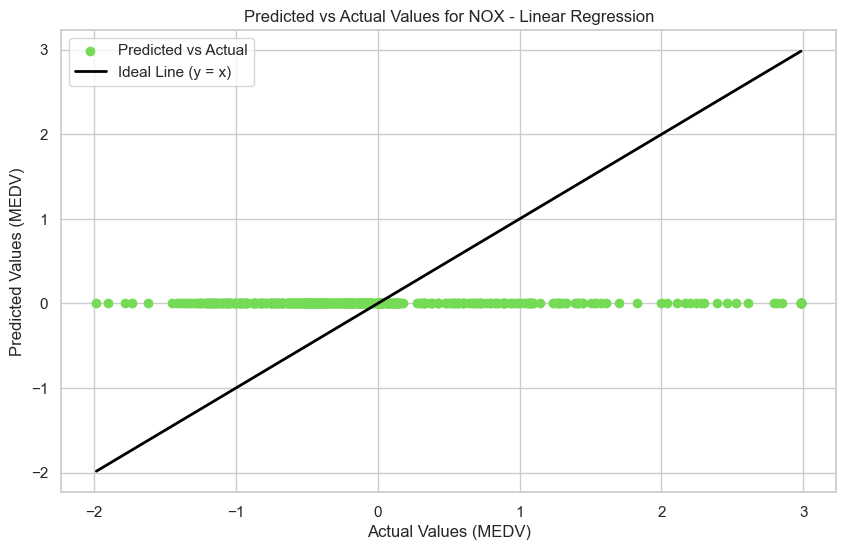

Intercept: 8.314820241578378e-18, Slope: 0.01619509334505482
Feature: RM, RMSE: 0.9997218827093275, R² Score: 0.000556157232117882


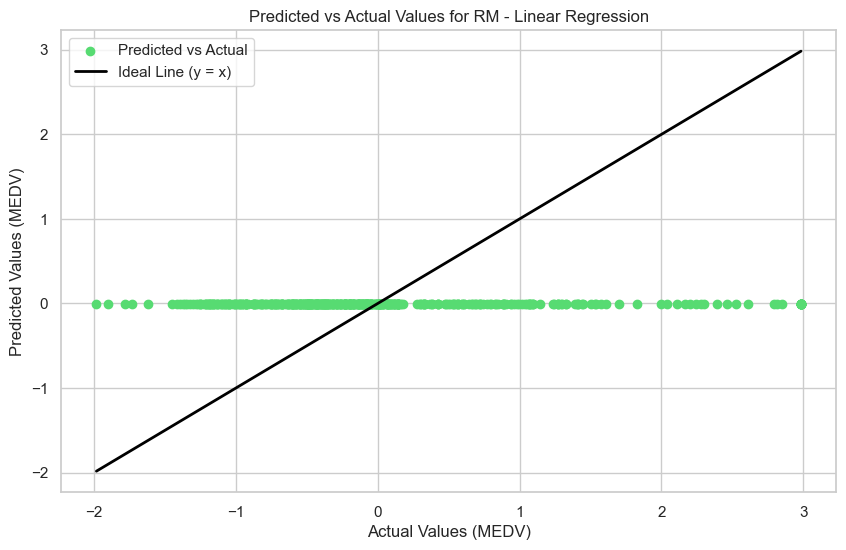

Intercept: 7.859986015045356e-18, Slope: -0.22758615560624765
Feature: AGE, RMSE: 0.9610486859978352, R² Score: 0.0763854231418345


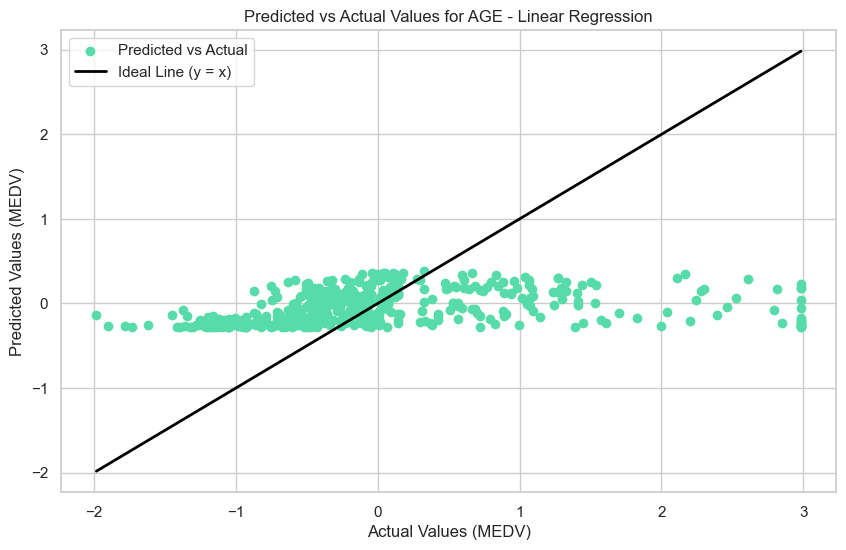

Intercept: 6.8790595835667955e-18, Slope: 0.03492743992359479
Feature: DIS, RMSE: 0.9987604420707874, R² Score: 0.0024775793545656066


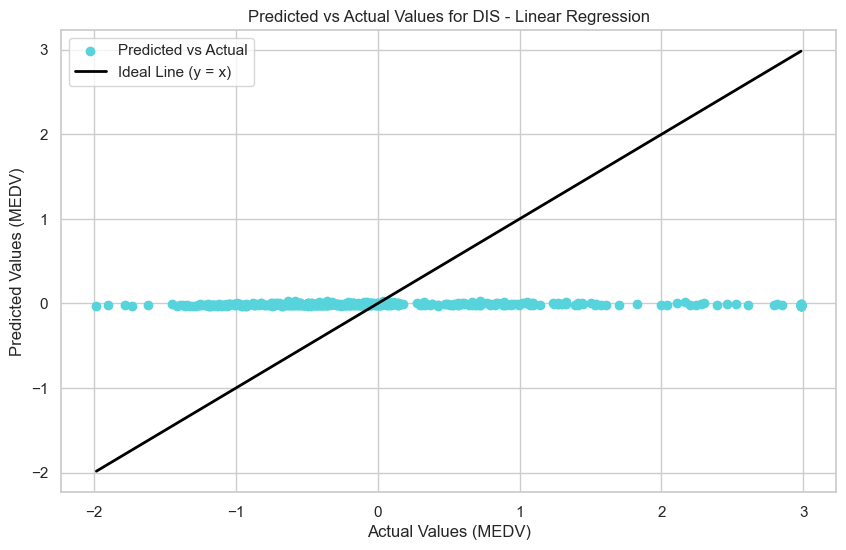

Intercept: -3.041277201221746e-18, Slope: -0.25877116696954167
Feature: TAX, RMSE: 0.9486989609954699, R² Score: 0.09997028140611619


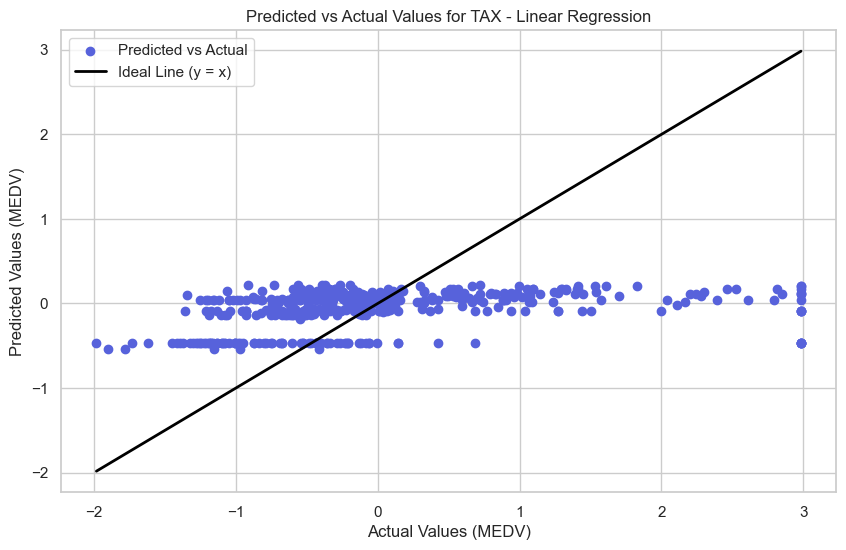

Intercept: 8.150597375240225e-18, Slope: -0.010347677969101902
Feature: PTRATIO, RMSE: 0.9998843128526718, R² Score: 0.0002313609111407322


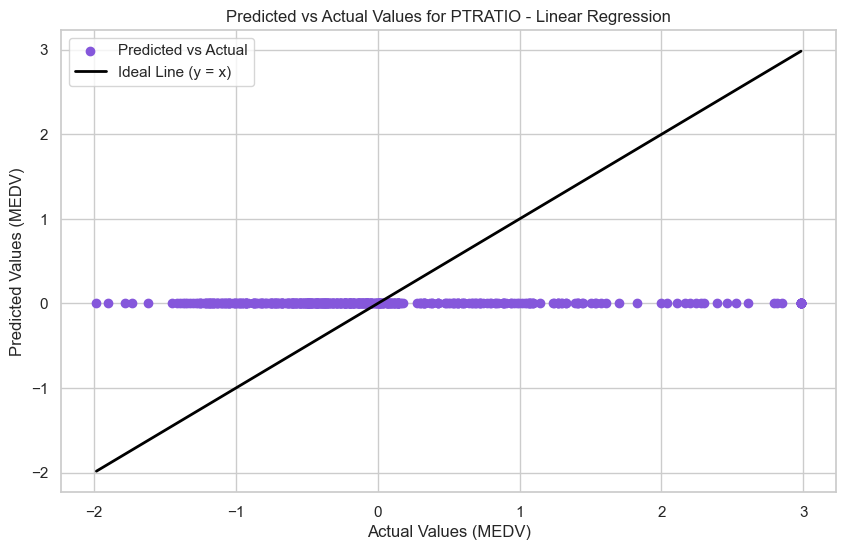

Intercept: -3.372657725283505e-17, Slope: -0.6403266946178646
Feature: LSTAT, RMSE: 0.710268432086008, R² Score: 0.49551875438208404


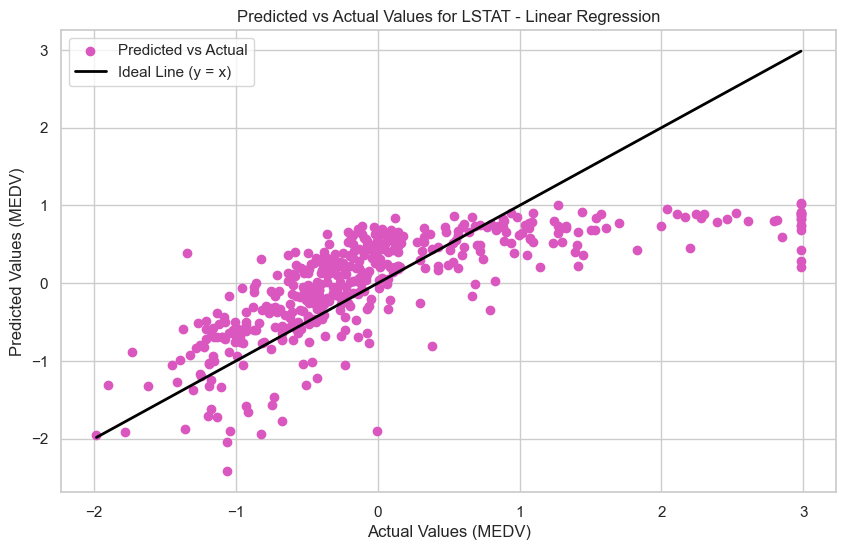

Intercept: 0.0, Slope: 1.0
Feature: MEDV, RMSE: 0.0, R² Score: 1.0


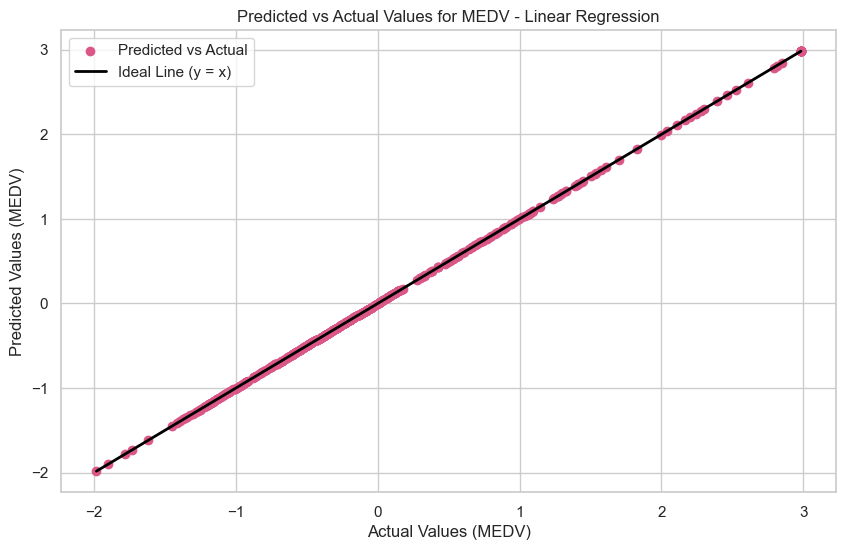

In [48]:

for feature in designated_feature_list:
    x, y, y_pred, intercept, slope = linear_func(feature, 'MEDV', df_scaled)
    rmse = get_root_mean_square_error(y_pred, y)
    r2 = get_r2_score(y_pred, y)
    results.append({'Feature': feature, 'RMSE': rmse, 'R2': r2})

    print(f'Feature: {feature}, RMSE: {rmse}, R² Score: {r2}')
     
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, color=feature_color_map[feature], label='Predicted vs Actual')
    plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linewidth=2, label='Ideal Line (y = x)')
    plt.xlabel('Actual Values (MEDV)')
    plt.ylabel('Predicted Values (MEDV)')
    plt.legend()
    plt.title(f'Predicted vs Actual Values for {feature} - Linear Regression')
    plt.show()

### Phase 3: Classification

**Decision Tree:**
A decision tree is a predictive model that uses a tree structure to decide the value of a target variable. This tree is composed of nodes and a list of splits where, for each node, a variable and a split value are chosen to divide the data into child nodes. This process continues until the important features of the dataset form the decision tree. The ultimate goal is to use this tree to make predictions about new data. Due to its understandable structure and results, a decision tree is one of the most popular machine learning methods.

**K-Nearest Neighbors (KNN):**
K-Nearest Neighbors (KNN) is one of the simplest machine learning algorithms used for classification and regression. In this algorithm, decisions are made based on the majority vote of the neighbors closest to the sample we want to classify or predict. In simpler terms, KNN identifies the nearest samples based on the distance between the new sample and all existing training data and determines the label of the new sample based on the most frequent label present among the nearest neighbors. This algorithm requires tuning the `K` parameter, which determines the number of neighbors that participate in decision-making.

**21. Concept of Pruning in Decision Trees**   
**22. Advantages of Decision Trees Over Other Models**   
**23. Comparison of KNN with Other Classification Methods**    
**24. One Nearest Neighbor Algorithm**  
**25. Distance Measures in KNN**  
**26. Classification of Housing Prices**     
**27. Finding Optimal Parameters Using GridSearchCV**  
**28. Plot the Final Decision Tree**  
**29. Overfitting or Underfitting in Your Models**  

#### 3.21. Concept of Pruning in Decision Trees

**Question**: What is the concept of pruning in decision trees? Mention the advantages and disadvantages of this method.   
**Answer**:  

**Pruning** is a technique used in decision trees and other tree-based models to reduce the size of the tree by removing parts of the tree that do not provide power in predicting target variables. This process helps in reducing the complexity of the final model, and it aims to improve the model's generalization capabilities on unseen data.

**Types of Pruning:**
1. **Pre-Pruning (Early Stopping):** This approach stops the tree from growing beyond a certain point during its creation based on certain criteria, such as minimum node size or maximum depth of the tree.
2. **Post-Pruning (Cost Complexity Pruning):** This method involves first growing the tree fully and then removing branches that have the least impact on the performance of the model according to a cost-complexity criterion.

**Advantages of Pruning:**
1. **Reduces Overfitting:** Pruning limits the size of the tree, thereby reducing the model's ability to fit noise in the training data. This improves the model's performance on test or unseen data.
2. **Simplifies the Model:** A smaller tree is easier to interpret and understand. This simplification can make the model more comprehensible to stakeholders or users.
3. **Improves Efficiency:** Pruning reduces the number of calculations required when making predictions, which can speed up the decision-making process, particularly useful in real-time applications.
4. **Reduces Memory Usage:** A smaller tree consumes less memory, which can be beneficial when deploying models in environments with memory constraints.

**Disadvantages of Pruning:**
1. **Loss of Information:** Pruning can lead to the removal of branches that contain important, albeit subtle, information about the data. This can sometimes negatively affect the model's accuracy.
2. **Determining Pruning Criteria:** Choosing the right criteria and thresholds for pruning (like the depth of the tree or the minimum number of samples per node) can be challenging and may require experimentation or domain expertise.
3. **Trade-off Between Simplicity and Accuracy:** While a pruned tree is simpler and less likely to overfit, there might be a trade-off with the model's ability to capture complex patterns in the data, potentially leading to underfitting.


#### 3.22. Advantages of Decision Trees Over Other Models

**Question**: When can decision trees have an advantage over other models?     
**Answer**:  
Decision trees are a popular machine learning technique due to their simplicity, interpretability, and versatility. They can offer several advantages over other models in specific scenarios:

 1. **Interpretability and Transparency:**
   - **Advantage:** Decision trees are one of the most interpretable models available. The hierarchical structure of decisions and clear rules allow stakeholders to understand why decisions are made without requiring statistical knowledge. This transparency is crucial in industries where understanding the decision-making process is as important as the decision itself, like in finance and healthcare.
   
 2. **Handling Non-linear Relationships:**
   - **Advantage:** Unlike linear models, decision trees are capable of handling non-linear data effectively. They do this by splitting the space into smaller sub-spaces based on the features, thus they can capture complex patterns in the data without needing transformations.

 3. **No Need for Feature Scaling:**
   - **Advantage:** Decision trees do not require normalization or standardization of features, as nodes are split based on order, not distance. This makes them particularly useful in cases where data units and scale differ drastically, or when details about the distribution of features are unknown.

 4. **Capability to Handle Both Numerical and Categorical Data:**
   - **Advantage:** Decision trees can handle variables that are both numerical and categorical without the need to create dummy variables. This is particularly advantageous for data with mixed types of features.

 5. **Robust to Outliers:**
   - **Advantage:** Decision trees are quite robust to outliers since the splitting happens based on percentiles and does not rely on each point’s value. Extreme values have less impact on the tree, making it more stable.

 6. **Useful in Feature Selection:**
   - **Advantage:** The hierarchical nature of decision trees makes them efficient for feature selection. They identify the most informative features and place them at the top of the tree, which can be used to reduce the dimensionality of the data.

 7. **Model Non-parametric Data:**
   - **Advantage:** Being a non-parametric method, decision trees do not assume anything about the space distribution and the classifier structure. This can be beneficial when there is no prior knowledge about the distribution of data.


**Example Use Cases Where Decision Trees Are Advantageous:**
- **Credit Risk Assessment:** Understanding the decision process is crucial; decision trees provide transparency in evaluating an applicant’s risk.
- **Medical Diagnosis:** Doctors need to understand diagnostic models to validate their decisions; decision trees can visually represent the diagnosis process.
- **Customer Segmentation in Marketing:** Decision trees can manage different types of data and discover the most significant segments based on buying patterns or demographics.


Decision trees offer a balance between performance and usability, making them particularly useful in fields requiring detailed decision-making explanations, ease of use with mixed data types, and robustness to outliers. However, they are prone to overfitting, which can be mitigated through techniques like pruning, ensemble methods (Random Forests, Gradient Boosting), or setting constraints on tree growth.


#### 3.23. Comparison of KNN with Other Classification Methods

**Question**:How does KNN differ from other classification methods like neural networks or logistic regression ? (Pay attention to how each classifier is trained.)     
**Answer**:  

**K-Nearest Neighbors (KNN)** is a non-parametric, instance-based learning algorithm that differs significantly from model-based algorithms like neural networks and logistic regression. Here's a breakdown of how KNN differs based on the training process and general characteristics:

 1. **Training Process:**
   - **KNN:**
     - **No Explicit Training Phase:** KNN doesn't learn a discriminative function from the training data but instead uses the entire dataset as the "model" for training. Training is essentially zero-cost as it involves only storing the dataset.
     - **Lazy Learning:** KNN is a lazy learner, which means it does not generalize from the training data at training time. Instead, it memorizes the training dataset and performs the generalization during the prediction phase, making predictions by searching through the entire dataset for the K-nearest instances.
   
   - **Neural Networks:**
     - **Extensive Training:** Neural networks require a significant amount of computational resources and time to train. They learn by adjusting the weights of connections in the network through processes like backpropagation, effectively learning a complex function that maps inputs to outputs.
     - **Eager Learning:** Once trained, a neural network model can make predictions without referring back to the training data, as it has generalized a function during training.

   - **Logistic Regression:**
     - **Model Training:** Involves fitting a logistic model to the data where parameters (coefficients) are learned by maximizing the likelihood of the training data, often using gradient descent or other optimization techniques.
     - **Parametric Approach:** Assumes a parametric form of the function that maps input features to the probability of the target class.

 2. **Efficiency in Prediction:**
   - **KNN:** Prediction can be very slow for large datasets as each query involves searching through the entire training dataset for the nearest neighbors. The computational cost is deferred to the prediction phase.
   - **Neural Networks and Logistic Regression:** Once trained, these models are generally very fast at making predictions because they simply apply the learned function to the new data.

 3. **Handling of Data:**
   - **KNN:** Directly affected by the quality of the data. Sensitive to the scale of data and irrelevant features because it relies on distance computations. Also, it requires all training data to be present in memory, impacting its scalability.
   - **Neural Networks:** Highly flexible and capable of learning complex patterns. They can learn to ignore irrelevant features through training, but they require significant data preprocessing, like normalization.
   - **Logistic Regression:** Best suited for linear decision boundaries and may require transformation of features to capture non-linear relationships. It is less influenced by noisy features through regularization techniques.

 4. **Impact of Outliers:**
   - **KNN:** Performance can degrade significantly in the presence of noisy or irrelevant features since it relies on measuring the distances between instances.
   - **Neural Networks:** Can learn to be robust against outliers, especially with appropriate adjustments in the network architecture and training process.
   - **Logistic Regression:** Outliers can have a strong influence on the decision boundary, although this can be mitigated with robust or regularized variants.

KNN, neural networks, and logistic regression represent different approaches to classification with distinct strengths and weaknesses. KNN is very intuitive and simple but lacks efficiency on large datasets and is sensitive to the quality of input data. Neural networks offer powerful modeling capabilities at the cost of computational resources and data preprocessing needs. Logistic regression provides a more interpretable model, suitable for problems with a linear decision boundary or when fewer resources are available for training.

#### 3.24. One Nearest Neighbor Algorithm

**Question**: Research and mention the advantages and disadvantages of the one nearest neighbor algorithm.     
**Answer**:  
The One Nearest Neighbor algorithm, often referred to simply as the Nearest Neighbor algorithm, is a simple method in pattern recognition and machine learning where the decision rule for classifying an object is based entirely on the closest example in the feature space. Here are some of its advantages and disadvantages:

**Advantages**:
1. **Simplicity**: It is extremely simple to implement and understand. For any new data point, the algorithm searches for the closest data point in the training dataset and assigns the corresponding label.
2. **No Training Phase**: Unlike many other algorithms, Nearest Neighbor requires no explicit training phase or model fitting. This can be an advantage in scenarios where training is computationally expensive.
3. **Adaptability**: It can perform well with a variety of data sets that do not have linear boundaries, and can adapt immediately to changes in input data.
4. **Effectiveness for Small Datasets**: With a small number of data points, Nearest Neighbor can be very effective, capturing complex underlying patterns without a sophisticated model.

**Disadvantages**:
1. **High Computational Cost**: During the testing phase, the algorithm compares the new point against every single point in the training dataset to find the nearest neighbor. This can be computationally expensive and slow, especially with large datasets.
2. **Sensitive to Local Structure**: The algorithm can be overly sensitive to local structure in the data or outliers, which can result in overfitting.
3. **Dimensionality Issues**: Its performance deteriorates in high-dimensional spaces due to the curse of dimensionality; as dimensions increase, the volume of the space increases and the available data becomes sparse. This sparsity makes it difficult to find good, close examples.
4. **Data Imbalance**: Nearest Neighbor can perform poorly with imbalanced datasets where some classes dominate over others. This can skew the prediction as the minority class will be less likely to be the nearest neighbor.
5. **Storage of Data**: All training data must be retained and searched, which can require substantial memoall, while the One Nearest Neighbor algorithm is simple and effective for small or well-prepared datasets, its practical use is often limited by computational and memory costs, as well as its susceptibility to certain types of data irregularities.

#### 3.25. Distance Measures in KNN

**Question**: Research other distance measures used in the KNN algorithm and mention a few of them.  
**Answer**:  

1. **Manhattan Distance (L1 norm)**:
This distance measure sums the absolute differences of their Cartesian coordinates. It is particularly useful in high-dimensional spaces and for data that requires grid-like distance calculations, like in urban settings where you can only travel along orthogonal city blocks.  
   $$d(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^n |x_i - y_i|$$

3. **Chebyshev Distance**:
This metric captures the maximum absolute difference between two vectors in n-dimensional space. It is particularly useful for chess games, where the distance is defined by the number of moves a king would take to go from one square to another.  
   $$d(\mathbf{x}, \mathbf{y}) = \max_i (|x_i - y_i|)$$

5. **Minkowski Distance**:
The Minkowski distance is a generalized metric form that includes others as special cases: when \(p=1\), it becomes the Manhattan distance, and when \(p=2\), it is the Euclidean distance.  
$$(d\mathbf{x}, \mathbf{y}) = \left(\sum_{i=1}^n |x_i - y_i|^p\right)^{\frac{1}{p}}$$
   

7. **Hamming Distance**:
Used primarily for categorical or binary data, this distance metric measures the number of positions at which the corresponding symbols are different between two strings of equal length. It's particularly useful in information theory and error correction.  
   $$d(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^n \delta(x_i, y_i)$$
   where $\delta(x_i, y_i)$ is 1 if $x_i \neq y_i$ and 0 otherwise. 

8. **Cosine Similarity** (often transformed into a distance measure):
Though technically not a distance metric but a similarity measure, it can be used in KNN to determine the cosine of the angle between two vectors. It is especially useful for text analysis where the magnitude of the vector might not be as relevant as the angle between them.  
   $$\text{similarity}(\mathbf{x}, \mathbf{y}) = \frac{\mathbf{x} \cdot \mathbf{y}}{\|\mathbf{x}\| \|\mathbf{y}\|}$$
   To use it as a distance metric:
   $$d(\mathbf{x}, \mathbf{y}) = 1 - \text{similarity}(\mathbf{x}, \mathbf{y})$$

10. **Jaccard Distance** (for sets):
This is useful for measuring the dissimilarity between two sets by looking at the ratio of their intersection over their union.  
   $$d(A, B) = 1 - \frac{|A \cap B|}{|A \cup B|}$$

12. **Mahalanobis Distance**:
This metric is different from the others as it takes into account the correlations of the data set and is scale-invariant. It measures the distance between a point and a distribution, making it effective in multivariate environments where scales of measurements differ or where features are correlated.
   $$d(\mathbf{x}, \mathbf{y}) = \sqrt{(\mathbf{x} - \mathbf{y})^T \mathbf{S}^{-1} (\mathbf{x} - \mathbf{y})}$$
   Where $\mathbf{S}$ is the covariance matrix of the data points. This distance considers the correlations of the data set.





#### 3.26. Classification of Housing Prices  
In this project phase, initially divide the target column (which includes the average price of occupied homes) into three categories. The top two deciles are labeled as **luxury homes**, the bottom two deciles as **economic homes**, and the rest as 
**regular homes**. Save these as a new column. Then implement two models based on decision trees and K-Nearest Neighbors using the Scikit-Learn library. Optimize the model as much as possible by changing the hyperparameters. This optimization aims to minimize the cost function without causing overfitting. Present one of the optimized models you reached through trial and error in your report.  

##### 3.26.1  Preparing the Data

In [49]:
df_2 = df_clean.copy() 
luxury_threshold = df_2['MEDV'].quantile(0.8)
economic_threshold = df_2['MEDV'].quantile(0.2)

print(luxury_threshold)
print(economic_threshold)

29.1
17.419999999999998


In [50]:
def categorize_home(MEDV):
    if MEDV == None: 
        return None
    if MEDV >= luxury_threshold:
        return 'Luxury'
    elif MEDV <= economic_threshold:
        return 'Economic'
    else:
        return 'Regular'

df_2['Category'] = df_2['MEDV'].apply(categorize_home)
column_transformer = df_2.copy()
column_transformer = ColumnTransformer([("encoder", OneHotEncoder(), ['Category'])], remainder='passthrough')

In [51]:
df_2.head()

CRIM    ZN  INDUS    NOX     RM   AGE     DIS    TAX  PTRATIO  LSTAT  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  296.0     15.3   4.98   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  242.0     17.8   9.14   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  242.0     17.8   4.03   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  222.0     18.7   2.94   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  222.0     18.7   5.33   

   MEDV Category  
0  24.0  Regular  
1  21.6  Regular  
2  34.7   Luxury  
3  33.4   Luxury  
4  36.2   Luxury

In [52]:
def test_train_func_2(df):
    test_data_null_target = df[df['MEDV'].isna()] 

    total_rows = len(df)
    test_set_size = int(0.15 * total_rows)
    additional_test_rows = test_set_size - len(test_data_null_target)

    df_non_null = df[df['MEDV'].notna()]

    X_non_null = df_non_null.drop(columns=['MEDV', 'Category'])
    y_non_null = df_non_null['Category'] 
    X_additional_test, X_train_val, y_additional_test, y_train_val = train_test_split(
        X_non_null, y_non_null, test_size=(1 - additional_test_rows / len(X_non_null)), random_state=42
    )

    test_data_additional_non_null = pd.concat([X_additional_test, y_additional_test], axis=1)
    final_test_data = pd.concat([test_data_additional_non_null, test_data_null_target], ignore_index=True)

    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

    print(f"Training Set: {X_train.shape}, Validation Set: {X_val.shape}, Test Set: {final_test_data.shape}")
    
    return X_train, X_val, y_train, y_val



In [53]:
X_train, X_val, y_train, y_val  = test_train_func_2(df_2)

Training Set: (354, 10), Validation Set: (77, 10), Test Set: (75, 12)


##### 3.26.2 Decision Tree Model

In [54]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_val)

##### 3.26.2 KNN

In [55]:
knn_clf = KNeighborsClassifier(n_neighbors=6)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_val)

##### 3.26.3 Compare models

In [56]:
def compare_model(y_val, y_pred_knn, y_pred_tree):
    report_knn = classification_report(y_val, y_pred_knn, output_dict=True)
    report_tree = classification_report(y_val, y_pred_tree, output_dict=True)
    
    df_knn = pd.DataFrame(report_knn).transpose()
    df_tree = pd.DataFrame(report_tree).transpose()
    
    combined_df = pd.DataFrame({
        'Metric': df_knn.index,
        'KNN Precision': df_knn['precision'],
        'DT Precision': df_tree['precision'],
        'KNN Recall': df_knn['recall'],
        'DT Recall': df_tree['recall'],
        'KNN F1-Score': df_knn['f1-score'],
        'DT F1-Score': df_tree['f1-score']
    })
    return combined_df


In [57]:
combined_df_1 = compare_model(y_val, y_pred_knn, y_pred_tree)
combined_df_1

Metric  KNN Precision  DT Precision  KNN Recall  \
Economic          Economic       0.750000      0.636364    1.000000   
Luxury              Luxury       0.500000      0.888889    0.642857   
Regular            Regular       0.871795      0.869565    0.708333   
accuracy          accuracy       0.753247      0.805195    0.753247   
macro avg        macro avg       0.707265      0.798273    0.783730   
weighted avg  weighted avg       0.780470      0.827650    0.753247   

              DT Recall  KNN F1-Score  DT F1-Score  
Economic       0.933333      0.857143     0.756757  
Luxury         0.571429      0.562500     0.695652  
Regular        0.833333      0.781609     0.851064  
accuracy       0.805195      0.753247     0.805195  
macro avg      0.779365      0.733751     0.767824  
weighted avg   0.805195      0.756486     0.804436

#### 3.27. Finding Optimal Parameters Using GridSearchCV  
For both models, find optimal parameter values using the `GridSearchCV` function. Briefly explain how this function works and compare the results obtained with those from models optimized through trial and error.

##### 3.27.1 Decision Tree Model

In [58]:
param_grid_tree = {
    'max_depth': [2, 3, 5, 7, None],
    'min_samples_split': [2, 3, 5, 7, 8, 9, 10, None],
    'min_samples_leaf': [ 2, 3, 5, 7, 10]
}

In [59]:
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, verbose=2)


In [60]:
dt_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_

C:\Users\AFRAA\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
125 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AFRAA\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AFRAA\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\AFRAA\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    val

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 5, 7, None],
                         'min_samples_leaf': [2, 3, 5, 7, 10],
                         'min_samples_split': [2, 3, 5, 7, 8, 9, 10, None]},
             verbose=2)

In [61]:
print("Best parameters for Decision Tree:", dt_grid_search.best_params_)
print("Best score for Decision Tree:", dt_grid_search.best_score_)

Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 7}
Best score for Decision Tree: 0.8108249496981891


In [62]:
tree_clf_2 = dt_grid_search.best_estimator_
y_pred_tree_2 = tree_clf_2.predict(X_val)

##### 3.27.2 KNN

In [63]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [64]:
knn_grid_search = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', verbose=1)


In [65]:
knn_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [66]:
print("Best parameters for KNN:", knn_grid_search.best_params_)
print("Best score for KNN:", knn_grid_search.best_score_)

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best score for KNN: 0.7600402414486922


In [67]:
knn_clf_2 =  knn_grid_search.best_estimator_
y_pred_knn_2 = knn_clf_2.predict(X_val)

##### 3.27.3 Compare models

In [68]:
combined_df_2 = compare_model(y_val, y_pred_knn_2, y_pred_tree_2)
combined_df_2

Metric  KNN Precision  DT Precision  KNN Recall  \
Economic          Economic       0.823529      0.636364    0.933333   
Luxury              Luxury       0.800000      0.888889    0.857143   
Regular            Regular       0.933333      0.869565    0.875000   
accuracy          accuracy       0.883117      0.805195    0.883117   
macro avg        macro avg       0.852288      0.798273    0.888492   
weighted avg  weighted avg       0.887701      0.827650    0.883117   

              DT Recall  KNN F1-Score  DT F1-Score  
Economic       0.933333      0.875000     0.756757  
Luxury         0.571429      0.827586     0.695652  
Regular        0.833333      0.903226     0.851064  
accuracy       0.805195      0.883117     0.805195  
macro avg      0.779365      0.868604     0.767824  
weighted avg   0.805195      0.883975     0.804436

##### 3.27.4 

              KNN Precision Change  KNN Recall Change  KNN F1-Score Change  \
Economic                  0.073529          -0.066667             0.017857   
Luxury                    0.300000           0.214286             0.265086   
Regular                   0.061538           0.166667             0.121617   
accuracy                  0.129870           0.129870             0.129870   
macro avg                 0.145023           0.104762             0.134853   
weighted avg              0.107231           0.129870             0.127489   

              DT Precision Change  DT Recall Change  DT F1-Score Change  
Economic                      0.0               0.0                 0.0  
Luxury                        0.0               0.0                 0.0  
Regular                       0.0               0.0                 0.0  
accuracy                      0.0               0.0                 0.0  
macro avg                     0.0               0.0                 0.0  
weighted 

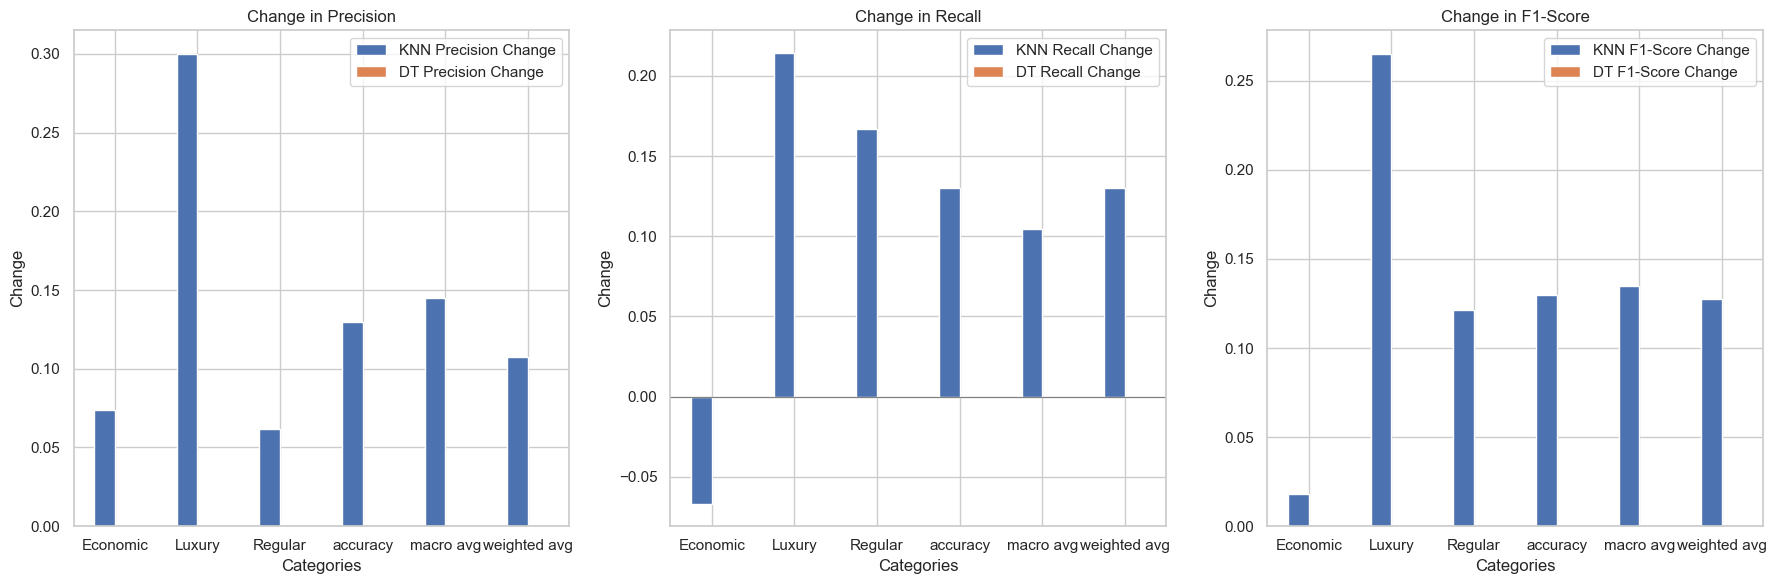

In [69]:
def plot_comparison(combined_df_1, combined_df_2):
    change_df = pd.DataFrame()
    metrics = ['Precision', 'Recall', 'F1-Score']
    models = ['KNN', 'DT']
    
    for model in models:
        for metric in metrics:
            change_df[f'{model} {metric} Change'] = combined_df_2[f'{model} {metric}'] - combined_df_1[f'{model} {metric}']
    
    print(change_df)  
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    axes = axes.ravel()
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        change_df.filter(like=metric).plot(kind='bar', ax=ax, rot=0)
        ax.set_title(f'Change in {metric}')
        ax.set_xlabel('Categories')
        ax.set_ylabel('Change')
        ax.axhline(0, color='grey', linewidth=0.8)
    
    plt.tight_layout()
    plt.show()
plot_comparison(combined_df_1, combined_df_2)

#### 3.28. Plot the Final Decision Tree  
Plot final decision tree using `plot_tree`. 

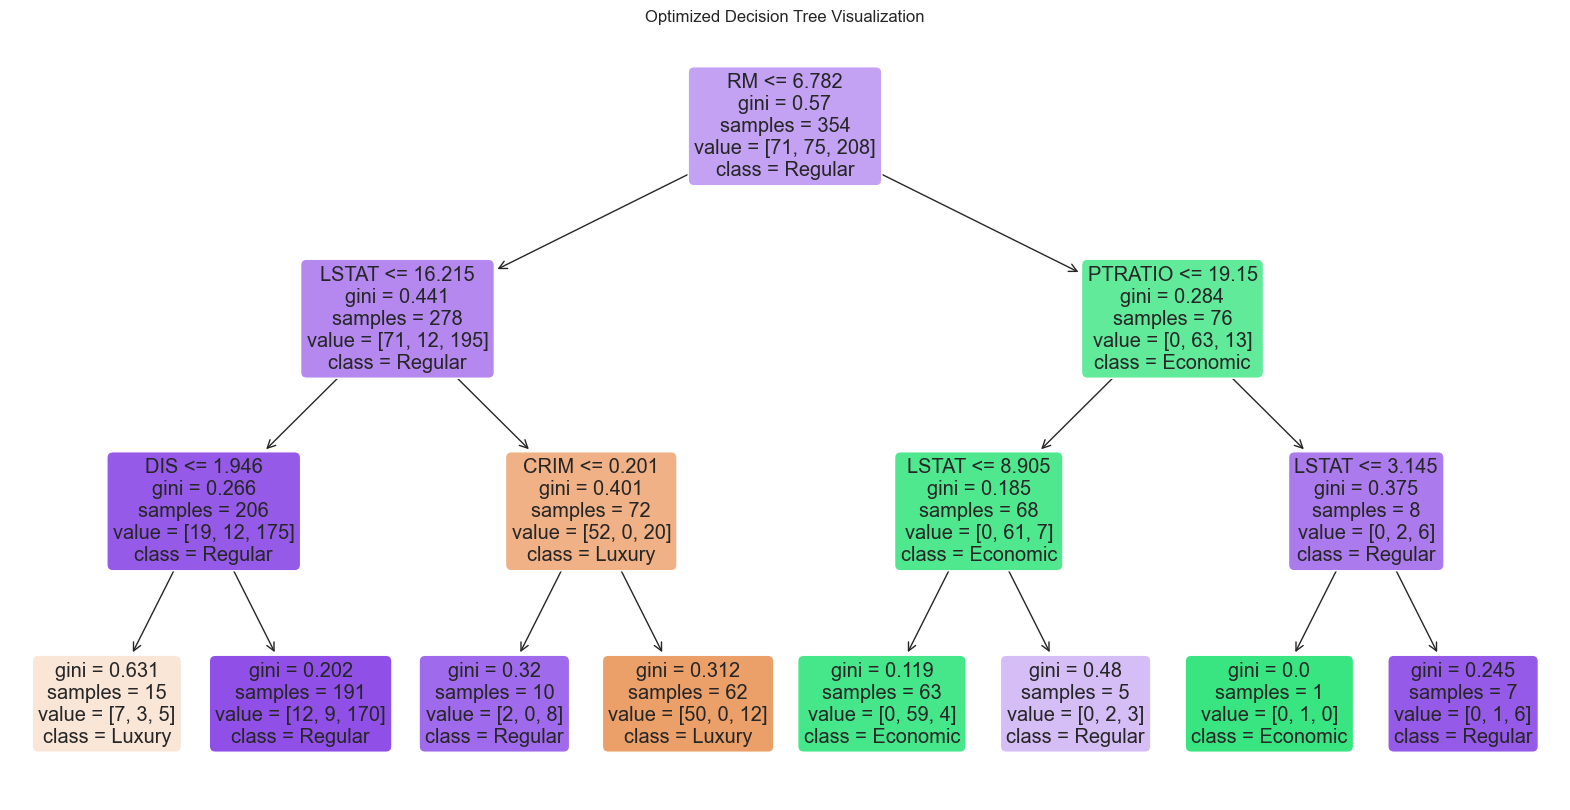

In [70]:
plt.figure(figsize=(20, 10))  
plot_tree(tree_clf, 
          filled=True, 
          rounded=True, 
          class_names=['Luxury', 'Economic', 'Regular'],
          feature_names=X_train.columns) 
plt.title('Optimized Decision Tree Visualization')
plt.show()

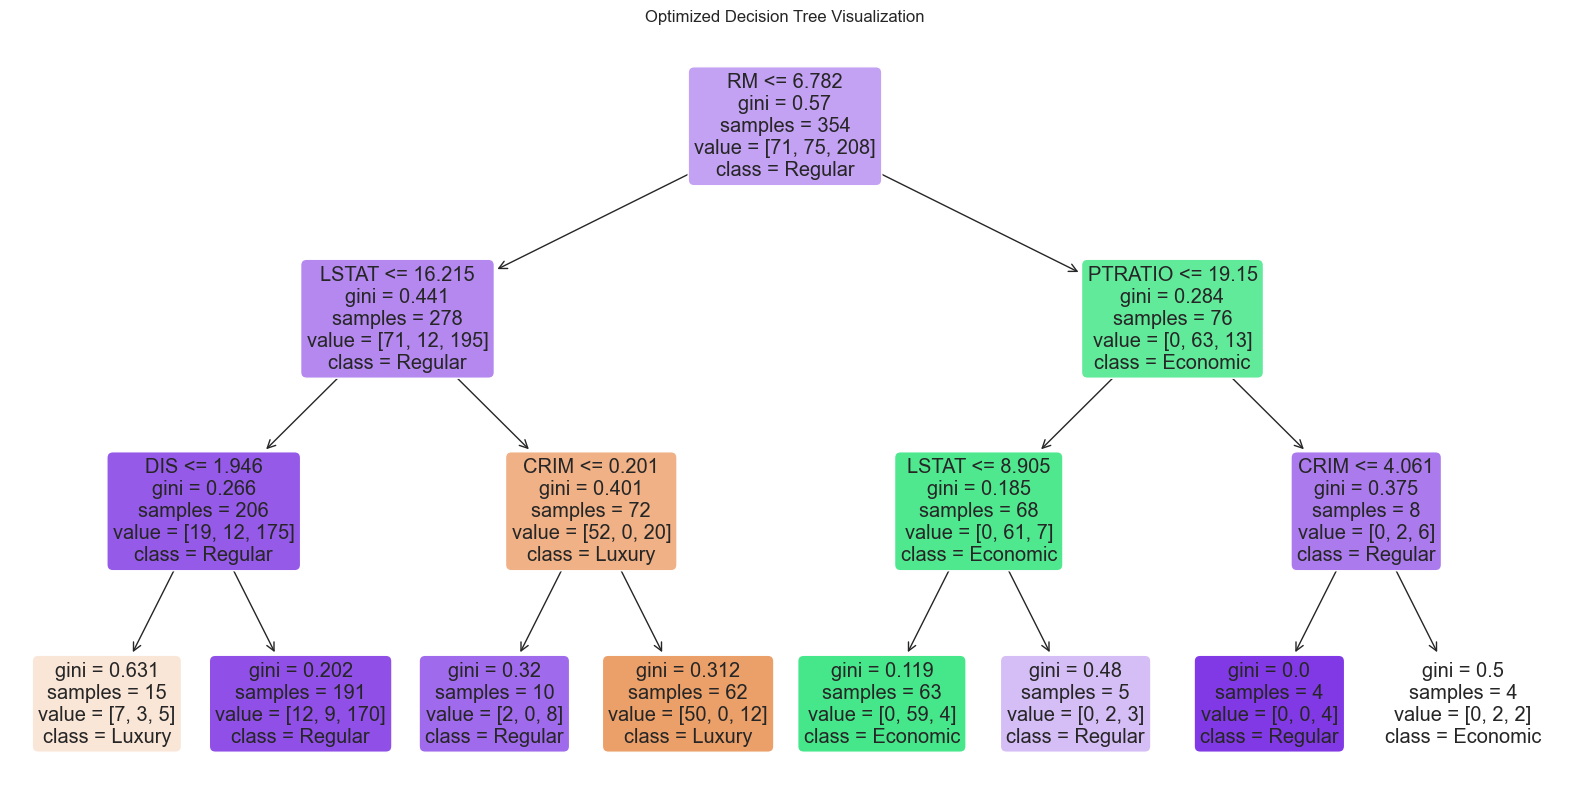

In [71]:
plt.figure(figsize=(20, 10))  
plot_tree(tree_clf_2, 
          filled=True, 
          rounded=True, 
          class_names=['Luxury', 'Economic', 'Regular'],
          feature_names=X_train.columns) 
plt.title('Optimized Decision Tree Visualization')
plt.show()

#### 3.29. Overfitting or Underfitting in Your Models

**Question**: Has overfitting or underfitting occurred in your models? When does this phenomenon occur in general? Explain each.   
**Answer**:  

Both overfitting and underfitting are common issues in machine learning that can significantly impact the performance of a model. Here's how you can determine if either has occurred and what these phenomena generally entail:

**Overfitting**
Overfitting occurs when a model learns the detail and noise in the training data to an extent where it negatively impacts the performance of the model on new data. This means the model is too complex, having too many parameters relative to the number of observations.

Indicators of Overfitting:
- High accuracy on the training dataset but poor accuracy on the validation or test dataset.
- The model shows significantly higher performance on the training set compared to the generalization on new data.

Causes:
- Too complex a model with too many parameters.
- Too little training data.
- Lack of regularization (techniques used to simplify the model such as L2 or L1 for linear models).
- Training for too many epochs or without early stopping.

**Underfitting**
Underfitting occurs when a model is too simple, learned from too few features of the data, and fails to capture the underlying patterns of the data, thus performing poorly even on the training data.

Indicators of Underfitting:
- Poor performance on both the training and testing datasets.
- The model does not fit the data well enough and lacks complexity.
   
Causes:
- Too simple model lacking the capacity to learn from the data.
- Insufficient number of features in the model, not capturing the complexity of the data.
- Excessive regularization that overly simplifies the model.

**Diagnosing Overfitting or Underfitting**
To determine if overfitting or underfitting has occurred, consider the following:
1. **Training vs Validation Performance:**
   - **Overfitting:** If training accuracy is high but your validation accuracy is much lower.
   - **Underfitting:** If both training and validation accuracies are low.

2. **Learning Curves:**
   - Plotting training and validation scores against training epochs or dataset size helps visualize changes in performance and diagnose underfitting or overfitting.

3. **Model Complexity:**
   - Analyzing the depth of decision trees or the number of layers and parameters in neural networks can provide insights into the potential for overfitting.

**Solutions to Address These Issues**
- **Overfitting:**
  - Use more training data if possible.
  - Apply regularization techniques.
  - Simplify the model (reduce the number of layers or parameters).
  - Use dropout for neural networks.
  - Early stopping during training.

- **Underfitting:**
  - Increase the model complexity (e.g., more parameters, layers, or custom features).
  - Reduce regularization.
  - Consider feature engineering to provide more information to the model.



In [72]:
def plot_learning_curves(model, X, y, title='Learning Curves'):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, 
        train_sizes=np.linspace(0.1, 1.0, 10), 
        cv=5, scoring='accuracy', n_jobs=-1
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_mean, 'o-', color="g", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="g", alpha=0.1)

    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

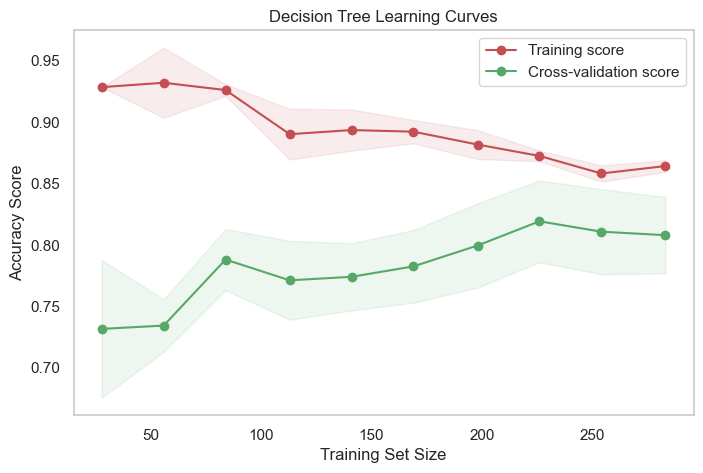

In [73]:
plot_learning_curves(tree_clf, X_train, y_train, title='Decision Tree Learning Curves')

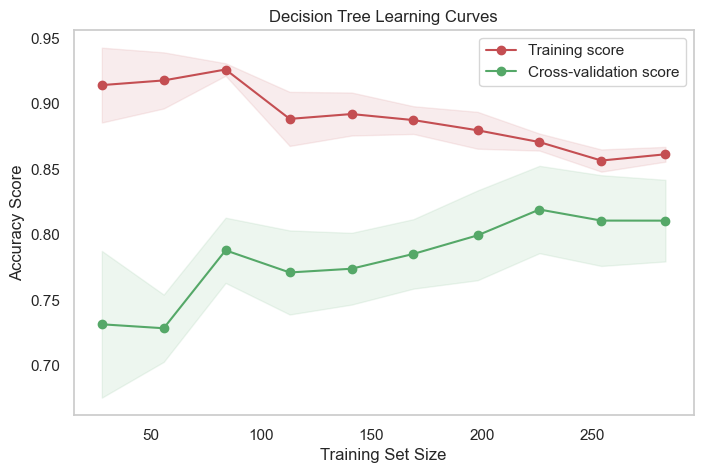

In [74]:
plot_learning_curves(tree_clf_2, X_train, y_train, title='Decision Tree Learning Curves')

Overfitting: The persistent gap between the training and validation scores suggests that the model may be overfitting. Overfitting occurs when the model learns the training data too well, including the noise and outliers, which does not generalize well to unseen data. The high training accuracy combined with lower validation accuracy is a classic sign of overfitting.

### Phase 4: Ensemble Methods

In machine learning, ensemble methods refer to a set of models that collaborate to improve prediction accuracy. These methods usually combine several simpler models to create the final ensemble model, which generally performs better than any single model. Two main ensemble methods are:

- **Bagging:** Reduces model variance by randomly selecting multiple data samples and building a model for each sample. The models are then combined to produce the final result.
- **Boosting:** Sequentially builds models where each new model tries to correct errors made by the previous ones.  
**30. Why Ensemble Methods?**  
**31. Bagging vs. Boosting Mechanisms**
***  
**Random Forest**  
Random forest is another ensemble learning method that builds multiple simple models or rules randomly and then combines the results to predict new values. 
In practice, a random forest is a set of decision trees that are trained independently, and then their results are combined to make a final prediction. This method is highly effective and efficient for solving complex problems and handling large datasets.

**32. Working Mechanism of Random Forest**   
**33. Bootstrapping in Random Forests**  
**34. Impact of Decision Tree Count in Random Forests**  
**35. Unsuitability of Random Forests**  
**36. Effect of Random Forests on Variance**  
**37. Random Forest Hyperparameters**  

#### 3.30. Why Ensemble Methods?

**Question:** Explain why ensemble methods are used and why they are important today.   
**Answer:**
Ensemble methods are a cornerstone of machine learning due to their ability to significantly improve prediction accuracy and robustness over individual models. There are several reasons why ensemble methods are especially important and widely used:

1. **Improved Accuracy**: Ensemble methods combine the strengths of multiple models, often leading to better predictive performance than any single model could achieve. This is primarily because different models may excel in different aspects of the data or capture various underlying patterns in the dataset. When these models are combined, their individual inaccuracies may cancel out, resulting in more accurate predictions.

2. **Reduced Variance and Bias**: By using techniques like bagging and boosting, ensemble methods can reduce the variance and bias of the prediction. Bagging, for instance, creates multiple models on different subsets of the dataset and averages their predictions, which reduces variance. Boosting, on the other hand, focuses on reducing bias by sequentially focusing on difficult cases that previous models handled poorly.

3. **Robustness to Overfitting**: Individual models, especially complex ones, can often overfit the training data, meaning they perform well on training data but poorly on unseen data. Ensemble methods, particularly those using bagging, are less likely to overfit as they aggregate the predictions of several models trained on different subsets of the data.

4. **Handling High-Dimensional Spaces**: In environments where the number of features is very high relative to the number of observations, ensemble methods can enhance the performance by leveraging different subsets of features across different models. This diversification can lead to better feature exploration and exploitation.

5. **Flexibility in Model Choice**: Ensemble methods do not require a specific type of underlying model. They can combine different types (e.g., decision trees, neural networks, SVMs) and exploit their respective strengths. This flexibility allows practitioners to tailor their ensemble strategy based on the specific characteristics of the problem at hand.

6. **Scalability and Parallelization**: Many ensemble methods, such as bagging, can be easily parallelized since each model can be built independently of the others. This makes these methods well-suited for modern computing environments where parallel processing capabilities can be exploited to handle large datasets efficiently.

7. **Competitive Performance in Challenges**: In practical applications and various competitions, such as those on Kaggle, ensemble methods frequently outperform single-model approaches. The blending of predictions from multiple models often leads to winning solutions in these highly competitive settings.

8. **Error Reduction**: Ensemble methods can target all three types of errors in statistical learning: variance, bias, and irreducible error. While variance and bias can be controlled, ensemble methods also help in reducing the error due to variance and bia learning systems.

#### 3.31. Bagging vs. Boosting Mechanisms


**Question:** Describe the general mechanisms of bagging and boosting for classification and explain their differences.   
**Answer:**  


 **Bagging**

**Mechanism:**
- Bagging involves creating multiple models (usually of the same type), each trained on a random subset of the training data. This subset selection is performed with replacement, which is known as bootstrap sampling.
- Each model in a bagging ensemble is built independently, allowing the training process to be parallelized.
- The final prediction is typically made by a majority vote (for classification tasks) or by averaging the predictions (for regression tasks).

**Key Characteristics:**
- **Reduces Variance:** By averaging multiple estimates, bagging can reduce the variance of a prediction model without increasing bias, which makes it effective in combating overfitting.
- **Model Type:** Often used with high variance models like decision trees, specifically unpruned decision trees, which are known to be highly sensitive to changes in the training taset.
***
 **Boosting**

**Mechanism:**
- Boosting builds an ensemble by training each new model sequentially to emphasize the training instances that previous models misclassified. This is achieved by adjusting the weights of incorrectly classified instances so that subsequent models focus more on difficult cases.
- Models are added until either a desired low error is achieved or a specified number of models are added.
- Unlike bagging, boosting is a form of adaptive model building; it does not involve simple averaging but focuses on reducing bias and forming a strong learner from a sequence of weak learners.

**Key Characteristics:**
- **Reduces Bias:** Boosting is primarily used to decrease the bias of the ensemble. By focusing on the harder cases, it adapts to the complexity of the problem.
- **Model Type:** Boosting can be used with many types of models but is most commonly associated with decision trees, particularly shallow trees, which themselves are generally weak learners.
***
 **Differences Between Bagging and Boosting**

1. **Objective:**
   - **Bagging** aims to reduce variance, thus enhancing the stability of predictions.
   - **Boosting** aims to reduce bias, improving the accuracy of predictions, especially on training data.

2. **Model Independence:**
   - **Bagging** models are built independently using randomly sampled subsets of the data.
   - **Boosting** builds models sequentially and models are dependent on previous ones, focusing on correcting their mistakes.

3. **Sampling Technique:**
   - **Bagging** uses bootstrap sampling (random with replacement).
   - **Boosting** adjusts the weights of data points based on previous model errors, focusing on difficult cases in a deterministic way.

4. **Error Handling:**
   - **Bagging** is more robust to overfitting for models with high variance.
   - **Boosting** can potentially overfit, especially in noisy datasets, as it intensively focuses on misclassified instances.

5. **Performance:**
   - **Bagging** generally improves performance by creating an averaged consensus.
   - **Boosting** often results in a more predictive model but at the cost of computational efficiency and increased r

#### 3.32. Working Mechanism of Random Forest

**Question:** Briefly explain how random forest works.  
**Answer:**  
The Random Forest algorithm is a powerful and versatile machine learning method used for both classification and regression tasks. 

It operates by creating a collection of decision trees from randomly selected subsets of the training set, and then it aggregates their individual predictions to form a final overall prediction. Here’s a brief overview of how it works:

1. **Bootstrap Aggregating (Bagging)**: Random Forest starts with the concept of bootstrap aggregating, or bagging, where multiple subsets of the original dataset are created with replacement, meaning the same data point can appear in a subset more than once. Each subset is used to train separate decision trees.

2. **Training Multiple Trees**: For each of the subsets, a decision tree is grown. When splitting each node during the construction of a tree, rather than considering all features to find the best split, a random subset of features is selected. This adds diversity to the model, which is crucial for reducing the correlation between trees and increasing the overall accuracy.

3. **Random Feature Selection**: At each node in each tree, instead of searching through all possible features to make a split, a random sample of the features is considered. The best split from this subset is used to split the node. This process introduces further randomness into the model, promotes variance reduction, and helps in avoiding overfitting.

4. **Aggregation of Predictions**: After a large number of trees are built using the above method, the Random Forest makes a prediction by averaging the predictions (in the case of regression) or by taking a majority vote (in the case of classification) across all the individual
 trees.

The combination of bagging and random feature selection in building the trees makes Random Forest a robust, versatile, and widely applicable model that tends to perform well on many problems without the need for extensive fine-tuning.

#### 3.33. Bootstrapping in Random Forests

**Question:** What is the concept of bootstrapping in random forests? How does it work, and how does it influence model results?   
**Answer:**  
The concept of bootstrapping in Random Forests is a statistical technique that significantly enhances the model's robustness and accuracy. It's fundamentally used to generate multiple diverse datasets from the original dataset, on which the Random Forest then trains individual decision trees. Here’s how it works and influences the model results:


1. **Bootstrap Aggregating (Bagging)**: Random Forest starts with the concept of bootstrap aggregating, or bagging, where multiple subsets of the original dataset are created with replacement, meaning the same data point can appear in a subset more than once. Each subset is used to train separate decision trees.

2. **Training Multiple Trees**: For each of the subsets, a decision tree is grown. When splitting each node during the construction of a tree, rather than considering all features to find the best split, a random subset of features is selected. This adds diversity to the model, which is crucial for reducing the correlation between trees and increasing the overall accuracy.

3. **Random Feature Selection**: At each node in each tree, instead of searching through all possible features to make a split, a random sample of the features is considered. The best split from this subset is used to split the node. This process introduces further randomness into the model, promotes variance reduction, and helps in avoiding overfitting.

4. **Aggregation of Predictions**: After a large number of trees are built using the above method, the Random Forest makes a prediction by averaging the predictions (in the case of regression) or by taking a majority vote (in the case of classification) across all the individualne-tuning.
***
**Influence on Model Results**

1. **Reduction of Overfitting**: Because each tree is trained on different subsets of data, the model is less likely to overfit to the peculiarities of the training dataset. This makes Random Forests more robust and generalizable than individual decision trees.

2. **Improved Accuracy**: The variance among the individual trees' predictions is averaged out when aggregating their outputs (through majority voting for classification or averaging for regression). This aggregation helps to reduce the prediction errors, making Random Forests often more accurate than single decision trees.

3. **Built-in Cross-validation**: The OOB samples provide a way to evaluate the performance of each tree without needing a separate validation or test set. By assessing how well each tree predicts these OOB samples, an estimate of the model's performance can be obtained, which has been shown to be quite close to the performance on unseen test data.

4. **Stability and Reliability**: The combination of diverse training sets and averaging results in a model that is less sensitive to the noise in the training data and specific training set selection. This stability is particularly beneficial in applications with high-dimensional data or data with complex interactions.

Bootstrapping in Random Forests, thus, is crucial for creating an ensemble method that not only performs well on training data but also maintains high performance on unseen data, providing robust predictions across various domains.

#### 3.34. Impact of Decision Tree Count in Random Forests

**Question:** Does the number of decision trees in a random forest affect the model's performance? What are the best approximate values based on empirical studies?  
**Answer:**  
Yes, the number of decision trees in a Random Forest significantly affects the model's performance. The impact is generally observed in terms of accuracy, stability, and computational efficiency.
***
How the Number of Trees Influences Performance

1. **Accuracy**: Initially, as the number of trees increases, the accuracy of the model improves. This is because more trees reduce the variance of the model without increasing the bias. Each tree contributes its "vote" and averaging these votes can help in achieving a more accurate and stable estimate.

2. **Stability**: With more trees, the predictions of the Random Forest become more stable and consistent over different subsets of the data and across different runs of the algorithm. This robustness is crucial for practical deployment of the model.

3. **Diminishing Returns**: Beyond a certain point, the gain in performance from adding more trees diminishes. The model reaches a plateau where additional trees do not significantly improve performance but do increase computational cost and memory usage.

4. **Overfitting**: In general, random forests are much less likely to overfit than other models because they are made up of many weak classifiers that are trained completely independently on completely different subsets of the training data. 

Random forests are a great option to spring for if you want to train a quick model that is not likely to overfit. That being said, it is possible that a random forest model might overfit in some cases so you should still make sure to look out for overfitting when you train random forest models. 

**How to prevent overfitting in random forests**
Here are some easy ways to prevent overfitting in random forests.  

**Reduce tree depth** If you do believe that your random forest model is overfitting, the first thing you should do is reduce the depth of the trees in your random forest model. Different implementations of random forest models will have different parameters that control this, but generally there will be a parameter that explicitly controls the number of levels deep a tree can get, the number of splits a tree can have, or the minimum size of the terminal nodes. Reducing model complexity generally ameliorates overfitting problems and reducing tree depth is the easiest way to reduce complexity in random forests.   
**Reduce the number of variables sampled at each split** You can also reduce the number of variables considered for each split to introduce more randomness into your model. To take a step back, each time a split is created in a tree, a subset of variables is taken and only those variables are considered to be the variable that is split on. If you consider all or most of your variables at each split, your trees may all end up looking the same because the same splits on the same variables are chosen. If you consider a smaller subset of variables at each split, the trees are less likely to look the same because it is unlikely that the same variables were even available for consideration at each split.  
**Use more data** Finally, you can always try increasing the size of your dataset. Overfitting is more likely to happen when complex models are trained on small datasets so increasing the size of your dataset may help.
***
**Empirical Recommendations**

For most applications, trying values between 50 and 400 trees is recommended. This range might need adjustment based on specific model requirements such as complexity or dataset features.

 **Advantages of More Trees**:
   - More trees enhance accuracy and model stability, although benefits diminish after a certain point—a phenomenon known as diminishing returns.

 **Disadvantages of More Trees**:
   - Larger numbers of trees increase training time and computational demands, potentially leading to slower model training and deployment.

 **Factors Affecting the Number of Trees Needed**:
   - Shallow trees might necessitate more trees in the forest to capture sufficient complexity.
   - Models with fewer features might require fewer trees as there is less information to process.
***
**Practical Considerations**

- **Computational Resources**: More trees require more computation and memory. It’s important to balance the number of trees with available computational resources and the required model performance.

- **Performance Metrics**: Monitoring performance metrics like out-of-bag (OOB) error can help in deciding the optimal number of trees. If the OOB error stabilizes and does not decrease significantly with more trees, adding further trees might not be beneficial.

- **Cross-validation**: Sometimes, using techniques like k-fold cross-validation to assess how changes in the number of trees affect performance can provide deeper insights and more tailored recommendations for a specific problem.

In practice, the number of trees is often selected based on a combination of these factors, with empirical testing guiding the final choice to ensure it's well-suited to the problem at hand and the computational constraints.


#### 3.35. Unsuitability of Random Forests

**Question:** When is using random forests not appropriate? When is this method recommended?   
**Answer:**

**When to Avoid Random Forests**

1. **High Dimensionality with Low Sample Size**:
   - Random Forests can struggle in situations where the number of features (variables) is much greater than the number of observations (samples). This can lead to overfitting where the trees in the forest model the noise in the training data rather than the actual underlying patterns.

2. **Real-Time Predictions**:
   - Due to the complexity of building multiple trees and making decisions based on majority voting or averaging, Random Forests may not be suitable for applications requiring real-time predictions or very fast decision-making.

3. **Interpretability is a Key Requirement**:
   - Random Forests, being an ensemble of multiple decision trees, generally do not provide the level of interpretability you might get from simpler models like linear regression. This can be a drawback in domains like medical or financial sectors where understanding the model's decision process is crucial.

4. **Sparse Data**:
   - Random Forests might not perform well with very sparse data, such as what is commonly found in text data or certain types of categorical data. In these cases, models specifically designed to handle sparsity, like Naive Bayes or specialized forms of regression, might be more effective.

5. **Linear Relationships**:
   - If the data exhibits a clear linear relationship, linear models might outperform Random Forests as they are naturally suited to model such relationships more directly and efficiently.
***
**When Random Forests are Recommended**

1. **Feature Interactions and Non-linearity**:
   - Random Forests are particularly good at capturing complex feature interactions and non-linear relationships without the need for manual feature engineering, making them a strong candidate for many practical applications across different sectors.

2. **High Feature Space**:
   - They can handle datasets with a high number of features and can provide insights into feature importance, helping to identify the most significant variables in the dataset.

3. **Robustness to Noise and Outliers**:
   - Random Forests are quite robust to noise and outliers in the dataset, as the averaging process helps to mitigate the effect of outlier values on the final prediction.

4. **Multiclass Classification**:
   - They work well for multiclass classification problems, where there are more than two categories of the output variable without the need for transforming the dataset.

5. **Handling Missing Values**:
   - Random Forests can handle missing values internally by imputing them using the median/mode of the respective feature, although explicit handling before feeding the data into the model can often lead to better results.

6. **General Use Cases**:
   - Random Forests are often used in a wide range of fields from marketing (predicting customer behavior), finance (credit scoring), healthcare (disease prediction), to environmental sciences (climate change effects modeling).


#### 3.36. Effect of Random Forests on Variance

**Question:** What impact do random forests have on variance?   
**Answer:**
Random forests significantly reduce the variance of model predictions compared to using a single decision tree. This impact on variance is primarily due to several key characteristics and mechanisms inherent in the random forest algorithm:

1. **Ensemble Averaging**: Random forests build many decision trees and average their predictions. This averaging process naturally decreases the variance of the predictions because while individual trees may have high variance, their average will have lower variance if the errors of the trees are not perfectly correlated.

2. **Bootstrapping of Data**: Each tree in a random forest is trained on a different bootstrap sample, a randomly selected subset of the data with replacement. This process introduces diversity among the trees, ensuring that they are not identical and do not make exactly the same splits or have the same biases.

3. **Feature Randomness**: When building each split in each tree, random forests randomly select a subset of features rather than considering every single feature. This further ensures that the trees are de-correlated; it prevents all the trees from relying on potentially strong but possibly noisy features, thus reducing variance.

4. **Reducing Overfitting**: Since each tree in a random forest is built on a different subset of data and features, it is less likely for the forest as a whole to overfit to the noise in the data. Overfitting is directly related to high variance, so by controlling overfitting, random forests naturally control variance.

5. **Law of Large Numbers**: The statistical principle that averaging a large number of independent estimates tends to converge towards the true mean applies here. As more trees are added, the overall variance of the ensemble continues to decrease, albeit with diminishing returns.  

so, random forests mitigate variance through multiple mechanisms, primarily by introducing randomness in the selection of data and features for training individual trees and by averaging the results of many trees. This results in a model that maintains robustness and generalizability, particularly when dealing with complex datasets that might lead single decision trees to overfit.

#### 3.37. Random Forest Hyperparameters

**Question:** After briefly explaining each hyperparameter of a random forest, use the `GridSearchCV` function to train this model and report the best hyperparameters. (No need for training the model and choosing hyperparameters via trial and error.)   
**Answer:**

In [82]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, None],      
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],   
    'bootstrap': [True, False]       
}

In [76]:
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5,verbose=1, n_jobs=-1)


In [77]:
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [78]:
print("Best parameters for Decision Tree:", rf_grid_search.best_params_)
print("Best score for Decision Tree:", rf_grid_search.best_score_)

Best parameters for Decision Tree: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best score for Decision Tree: 0.8447484909456741


In [79]:
rf = rf_grid_search.best_estimator_
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

In [80]:
report_rf = classification_report(y_val, y_pred_rf, output_dict=True)
df_rf = pd.DataFrame(report_rf).transpose()
df_rf

precision    recall  f1-score    support
Economic       0.833333  1.000000  0.909091  15.000000
Luxury         0.875000  1.000000  0.933333  14.000000
Regular        1.000000  0.895833  0.945055  48.000000
accuracy       0.935065  0.935065  0.935065   0.935065
macro avg      0.902778  0.965278  0.929160  77.000000
weighted avg   0.944805  0.935065  0.935918  77.000000

In [83]:
def compare_models_3(y_val, y_pred_knn_, y_pred_tree, y_pred_rf):
    report_knn = classification_report(y_val, y_pred_knn, output_dict=True)
    report_tree = classification_report(y_val, y_pred_tree, output_dict=True)
    report_rf = classification_report(y_val, y_pred_rf, output_dict=True)
    df_rf = pd.DataFrame(report_rf).transpose()
    df_knn = pd.DataFrame(report_knn).transpose()
    df_tree = pd.DataFrame(report_tree).transpose()
    
    combined_df = pd.DataFrame({
        'Metric': df_knn.index,
        'KNN Precision': df_knn['precision'],
        'DT Precision': df_tree['precision'],
        'RF Precision': df_rf['precision'],
        'KNN Recall': df_knn['recall'],
        'DT Recall': df_tree['recall'],
        'RF Recall': df_rf['recall'],
        'KNN F1-Score': df_knn['f1-score'],
        'DT F1-Score': df_tree['f1-score'],
        'RF F1-Score': df_rf['f1-score']
    })
    return combined_df

compare_models_3(y_val, y_pred_knn_2, y_pred_tree_2, y_pred_rf)

Metric  KNN Precision  DT Precision  RF Precision  \
Economic          Economic       0.750000      0.636364      0.833333   
Luxury              Luxury       0.500000      0.888889      0.875000   
Regular            Regular       0.871795      0.869565      1.000000   
accuracy          accuracy       0.753247      0.805195      0.935065   
macro avg        macro avg       0.707265      0.798273      0.902778   
weighted avg  weighted avg       0.780470      0.827650      0.944805   

              KNN Recall  DT Recall  RF Recall  KNN F1-Score  DT F1-Score  \
Economic        1.000000   0.933333   1.000000      0.857143     0.756757   
Luxury          0.642857   0.571429   1.000000      0.562500     0.695652   
Regular         0.708333   0.833333   0.895833      0.781609     0.851064   
accuracy        0.753247   0.805195   0.935065      0.753247     0.805195   
macro avg       0.783730   0.779365   0.965278      0.733751     0.767824   
weighted avg    0.753247   0.805195   0.935065      0.756486     0.804436   

              RF F1-Score  
Economic         0.909091  
Luxury           0.933333  
Regular          0.945055  
accuracy         0.935065  
macro avg        0.929160  
weighted avg     0.935918

### XGBoost: Scoring Model

XGBoost is a machine learning algorithm based on gradient boosting. This algorithm is used to solve various machine learning problems, including classification, prediction, and ranking. XGBoost offers fast execution, high efficiency, and improved prediction accuracy.

**38. XGBoost Working Mechanism**  
Briefly explain how XGBoost works.  
**39. Gradient Boosting vs. Decision Tree Boosting**  
First, explain the concept of gradient boosting and decision tree boosting, then describe the difference between them.  
**40. XGBoost Hyperparameters**  
After briefly explaining each XGBoost hyperparameter, use the `GridSearchCV` function to train this model and report the best hyperparameters. (No need to train the model and select hyperparameters via trial and error.)

#### 3.38. XGBoost Working Mechanism

**Question:** Briefly explain how XGBoost works   
**Answer:**  
XGBoost is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models. It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction. XGBoost stands for “Extreme Gradient Boosting” and it has become one of the most popular and widely used machine learning algorithms due to its ability to handle large datasets and its ability to achieve state-of-the-art performance in many machine learning tasks such as classification and regression.  


#### 3.39. Gradient Boosting vs. Decision Tree Boosting

**Question:** First, explain the concept of gradient boosting and decision tree boosting, then describe the difference between them.  
  
**Answer:**  
**Decision Tree:**  
A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.   

A tree can be “learned” by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictio  
***
**Decision Tree:**
A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

A tree can be “learned” by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictio

source: https://www.geeksforgeeks.org/xgboost/ns.ns.

#### 3.40. XGBoost Hyperparameters

**Question:** After briefly explaining each XGBoost hyperparameter, use the `GridSearchCV` function to train this model and report the best hyperparameters. (No need to train the model and select hyperparameters via trial and error.)  
**Answer:**



**XGBoost** (Extreme Gradient Boosting) is a powerful and efficient implementation of the gradient boosting framework. Here’s a brief overview of some key hyperparameters in XGBoost:

1. **`n_estimators`**: Number of gradient boosted trees. Equivalent to the number of boosting rounds.

2. **`learning_rate`**: Step size shrinkage used to prevent overfitting. Range is [0,1].

3. **`max_depth`**: Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.

4. **`subsample`**: Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. This prevents overfitting.

5. **`colsample_bytree`**: Subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.

6. **`min_child_weight`**: Minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning.

7. **`gamma`**: Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.

8. **`reg_alpha`** and **`reg_lambda`**: L1 and L2 regularization terms on weights, respectively. Increasing these values will make model more conservative.

ints

- **Data Preparation**: Ensure that your data is suitable for XGBoost (numerical features should be scaled, although it's not strictly necessary).

- **Model and Grid Definition**: The `XGBClassifier` is set up with basic configurations, and a parameter grid defines the hyperparameters to experiment with.

- **Execution**: `GridSearchCV` explores different combinations of parameters to find the best fit according to the specified 'accuracy' scoring method.



In [84]:
param_grid_xgb = {
    'n_estimators': [100], 
    'learning_rate': [0.1,1], 
    'max_depth': [6,7,8],
    'subsample': [0.8],
    'min_child_weight': [11]
    }

In [85]:
xgb_grid_search = GridSearchCV(XGBClassifier(), param_grid=param_grid_xgb, cv=5, verbose=2)

In [86]:
y_encoded = y_train.astype('category').cat.codes


In [87]:
xgb_grid_search.fit(X_train, y_encoded)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=11, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=11, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=11, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, 

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 1], 'max_depth': [6, 7, 8],
                         'min_child_weight': [11], 'n_estimators': [100],
                         'subsample': [0.8]},
             verbose=2)

In [88]:
print("Best parameters for Decision Tree:", rf_grid_search.best_params_)
print("Best score for Decision Tree:", rf_grid_search.best_score_)

Best parameters for Decision Tree: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best score for Decision Tree: 0.8447484909456741


In [89]:
xgb = xgb_grid_search.best_estimator_
xgb.fit(X_train, y_encoded)
y_pred_xgb = xgb.predict(X_val)

In [90]:
report_xgb = classification_report( y_val.astype('category').cat.codes, y_pred_xgb, output_dict=True)
df_xgb = pd.DataFrame(report_xgb).transpose()
df_xgb

precision    recall  f1-score    support
0              0.833333  1.000000  0.909091  15.000000
1              0.933333  1.000000  0.965517  14.000000
2              1.000000  0.916667  0.956522  48.000000
accuracy       0.948052  0.948052  0.948052   0.948052
macro avg      0.922222  0.972222  0.943710  77.000000
weighted avg   0.955411  0.948052  0.948918  77.000000

### Phase 5: Support Vector Machine (SVM)

A Support Vector Machine (SVM) is a machine learning method used for classification and regression. This model uses a line or plane that separates two different classes, maximizing the distance between this line and the nearest samples from each class. This approach helps create a clear boundary between classes, enabling more accurate predictions.

**40. Steps for Implementing SVM:**  
1. **Classification with Two Kernels (Linear & RBF):**   
2. **Confusion Matrix & Evaluation Metrics:**    
3. **Random Search vs. Grid Search:**  
4. **Kernel Optimization Using Random Search & Grid Search:**  

#### 3.40. Steps for Implementing SVM:  
Use existing libraries to classify your data using two kernels, Linear and RBF.

##### 3.40.1. Classification with Two Kernels (Linear & RBF):  

In [91]:
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_val)



In [92]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_val)



##### 3.40.2. Confusion Matrix & Evaluation Metrics:  
Report the confusion matrix and evaluation metrics like accuracy, precision, recall, and F1-score, and provide your analysis.

In [93]:
svm_linear_report = classification_report(y_val, y_pred_linear, output_dict=True)
df_svm_linear = pd.DataFrame(svm_linear_report).transpose()
df_svm_linear

precision    recall  f1-score    support
Economic       0.857143  0.800000  0.827586  15.000000
Luxury         0.923077  0.857143  0.888889  14.000000
Regular        0.900000  0.937500  0.918367  48.000000
accuracy       0.896104  0.896104  0.896104   0.896104
macro avg      0.893407  0.864881  0.878281  77.000000
weighted avg   0.895847  0.896104  0.895323  77.000000

In [94]:
cm_linear = confusion_matrix(y_val, y_pred_linear)

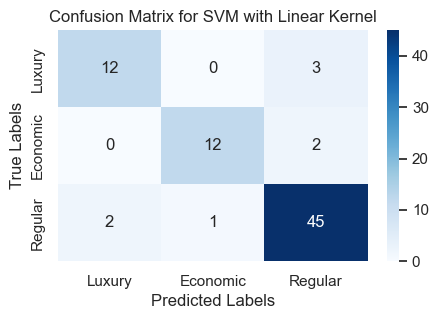

In [95]:
plt.figure(figsize=(5,3))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', xticklabels=['Luxury', 'Economic', 'Regular'], yticklabels=['Luxury', 'Economic', 'Regular'])
plt.title('Confusion Matrix for SVM with Linear Kernel')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [96]:
svm_rbf_report = classification_report(y_val, y_pred_rbf, output_dict=True)
df_svm_rbf = pd.DataFrame(svm_rbf_report).transpose()
df_svm_rbf

C:\Users\AFRAA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AFRAA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AFRAA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

precision    recall  f1-score    support
Economic       0.578947  0.733333  0.647059  15.000000
Luxury         0.000000  0.000000  0.000000  14.000000
Regular        0.706897  0.854167  0.773585  48.000000
accuracy       0.675325  0.675325  0.675325   0.675325
macro avg      0.428615  0.529167  0.473548  77.000000
weighted avg   0.553445  0.675325  0.608285  77.000000

In [97]:
cm_rbf = confusion_matrix(y_val, y_pred_rbf)

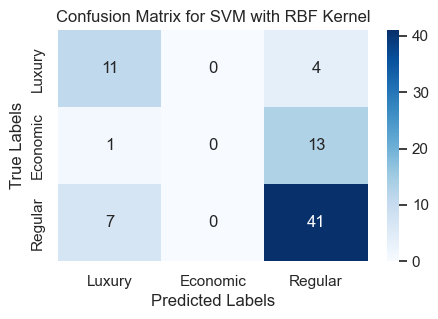

In [98]:
plt.figure(figsize=(5, 3))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['Luxury', 'Economic', 'Regular'], yticklabels=['Luxury', 'Economic', 'Regular'])
plt.title('Confusion Matrix for SVM with RBF Kernel')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

##### 3.40.3. Random Search vs. Grid Search:

**Question:** Which of these methods is better to use here?
# Grid Search
**Description:**
- **Grid Search** systematically explores a predefined subset of hyperparameters by constructing a grid of all possible combinations and evaluating each one (typically via cross-validation).

**Pros:**
- **Exhaustiveness:** Tests all possible combinations from the specified parameter grid, ensuring that the best combination within the grid is found.
- **Simplicity:** Easy to set up and understand. It can be efficiently parallelized across multiple CPU cores or machines.

**Cons:**
- **Computational Cost:** Can become computationally expensive quickly as the number of parameters and their values increase, leading to a combinatorial explosion.
- **Efficiency:** May waste resources evaluating hyperparameters that have little impact on improving model performance.***
# Random Search
**Description:**
- **Random Search** samples hyperparameter combinations randomly from a given distribution over a specified number of iterations. 

**Pros:**
- **Efficiency:** More efficient than Grid Search when dealing with a large number of hyperparameters or when some hyperparameters do not influence the performance significantly.
- **Coverage:** Has a higher chance of finding the optimal or near-optimal settings in fewer iterations under the right conditions due to its randomness.
- **Scalability:** Typically requires fewer trials to find a good set of hyperparameters, making it suitable for scenarios with limited computational resources.

**Cons:**
- **Unpredictability:** May miss the optimal combination since it does not systematically explore all possibilities.
- **Sensitivity to Distribution:** The performance of Random Search can significantly depend on how the hyperparameters are distributed and sampled.***
# Which to Use forYour Project?
For your project with the Boston housing dataset, here are some considerations: If the number of hyperparameters is not excessively large **Grid Search** could be thorough and effective.Rresources or time are limited,ande parameter space is large, **Random Search** may provide a better balance between performance and computational cost..

##### 3.40.4. Kernel Optimization Using Random Search & Grid Search:  
Use both methods with Linear and RBF kernels to find the best classifier for your desired range and values. (You are allowed to use libraries.)

###### 3.40.4.1 Random Search 

In [99]:
param_distributions = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf']
}

In [100]:
random_search = RandomizedSearchCV(SVC(), param_distributions, n_iter=3, cv=5, verbose=2, random_state=42)


In [101]:
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.7s
[CV] END .................................C=1, ke

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=3,
                   param_distributions={'C': [1, 10],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, verbose=2)

In [102]:
print("Best parameters from Random Search:", random_search.best_params_)
print("Best score from Random Search:", random_search.best_score_)

Best parameters from Random Search: {'kernel': 'linear', 'C': 1}
Best score from Random Search: 0.7967806841046278


In [103]:
best_model_random = random_search.best_estimator_
best_model_random.fit(X_train, y_train)
y_pred_best_model_random = best_model_random.predict(X_val)
random_accuracy = best_model_random.score(X_val, y_val)
print("Test accuracy from Random Search: {:.2f}".format(random_accuracy))

Test accuracy from Random Search: 0.90


###### 3.40.4.2 Grid  Search 

In [104]:
param_grid = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf']
}

In [105]:
grid_search = GridSearchCV(SVC(), param_grid, cv=2, verbose=2)

In [106]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END .................................C=1, kernel=linear; total time=   1.0s
[CV] END .................................C=1, kernel=linear; total time=   0.2s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   4.4s
[CV] END ................................C=10, kernel=linear; total time=   3.2s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s


GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']}, verbose=2)

In [107]:
print("Best parameters from Grid Search:", grid_search.best_params_)
print("Best score from Grid Search:", format(grid_search.best_score_))

Best parameters from Grid Search: {'C': 10, 'kernel': 'linear'}
Best score from Grid Search: 0.7994350282485876


In [108]:
best_grid_search = grid_search.best_estimator_
best_grid_search.fit(X_train, y_train)
y_pred_best_grid_search = best_model_random.predict(X_val)
grid_search_accuracy = best_grid_search.score(X_val, y_val)
print("Test accuracy from Random Search: {:.2f}".format(grid_search_accuracy))

Test accuracy from Random Search: 0.92


### Phase 6: Model Evaluation

There are many criteria to measure and evaluate model performance. Evaluating classification models in machine learning means assessing the performance and efficiency of various models used for classifying data. This is crucial because it helps us refine our models and ensure optimal performance.

Using these criteria and other evaluators, classification models can be compared, and the best model chosen for your specific problem.

**Evaluation Criteria:**

- **Confusion Matrix**
- **Recall**
- **Precision**
- **F1-Score**
- **Accuracy**
- **Micro, Macro, and Weighted Averaging**

In [109]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model_name}: {accuracy:.2f}\n")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3,2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    
    report = classification_report(y_test, y_pred, output_dict=True)
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    print(f"{model_name} - Weighted Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1_score:.2f}")
    
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f"{model_name} - Macro Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1_score:.2f}")
    
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
    print(f"{model_name} - Micro Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1_score:.2f}")


    print(30 * "###")

Accuracy of random Decision Tree: 0.81



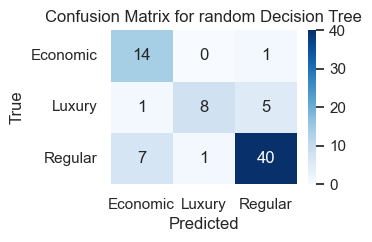

Classification Report for random Decision Tree:
              precision    recall  f1-score   support

    Economic       0.64      0.93      0.76        15
      Luxury       0.89      0.57      0.70        14
     Regular       0.87      0.83      0.85        48

    accuracy                           0.81        77
   macro avg       0.80      0.78      0.77        77
weighted avg       0.83      0.81      0.80        77

random Decision Tree - Weighted Precision: 0.83, Recall: 0.81, F1-Score: 0.80
random Decision Tree - Macro Precision: 0.80, Recall: 0.78, F1-Score: 0.77
random Decision Tree - Micro Precision: 0.81, Recall: 0.81, F1-Score: 0.81
##########################################################################################
Accuracy of grid Decision Tree: 0.81



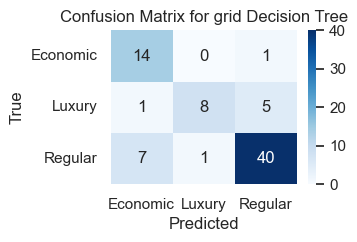

Classification Report for grid Decision Tree:
              precision    recall  f1-score   support

    Economic       0.64      0.93      0.76        15
      Luxury       0.89      0.57      0.70        14
     Regular       0.87      0.83      0.85        48

    accuracy                           0.81        77
   macro avg       0.80      0.78      0.77        77
weighted avg       0.83      0.81      0.80        77

grid Decision Tree - Weighted Precision: 0.83, Recall: 0.81, F1-Score: 0.80
grid Decision Tree - Macro Precision: 0.80, Recall: 0.78, F1-Score: 0.77
grid Decision Tree - Micro Precision: 0.81, Recall: 0.81, F1-Score: 0.81
##########################################################################################
Accuracy of random KNN: 0.75



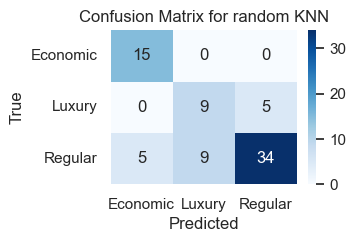

Classification Report for random KNN:
              precision    recall  f1-score   support

    Economic       0.75      1.00      0.86        15
      Luxury       0.50      0.64      0.56        14
     Regular       0.87      0.71      0.78        48

    accuracy                           0.75        77
   macro avg       0.71      0.78      0.73        77
weighted avg       0.78      0.75      0.76        77

random KNN - Weighted Precision: 0.78, Recall: 0.75, F1-Score: 0.76
random KNN - Macro Precision: 0.71, Recall: 0.78, F1-Score: 0.73
random KNN - Micro Precision: 0.75, Recall: 0.75, F1-Score: 0.75
##########################################################################################
Accuracy of grid KNN: 0.88



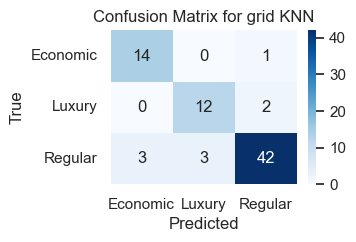

Classification Report for grid KNN:
              precision    recall  f1-score   support

    Economic       0.82      0.93      0.88        15
      Luxury       0.80      0.86      0.83        14
     Regular       0.93      0.88      0.90        48

    accuracy                           0.88        77
   macro avg       0.85      0.89      0.87        77
weighted avg       0.89      0.88      0.88        77

grid KNN - Weighted Precision: 0.89, Recall: 0.88, F1-Score: 0.88
grid KNN - Macro Precision: 0.85, Recall: 0.89, F1-Score: 0.87
grid KNN - Micro Precision: 0.88, Recall: 0.88, F1-Score: 0.88
##########################################################################################
Accuracy of Random Forest: 0.94



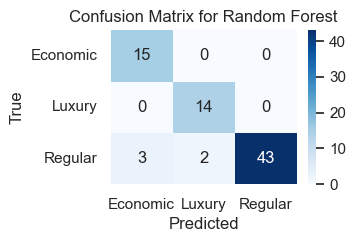

Classification Report for Random Forest:
              precision    recall  f1-score   support

    Economic       0.83      1.00      0.91        15
      Luxury       0.88      1.00      0.93        14
     Regular       1.00      0.90      0.95        48

    accuracy                           0.94        77
   macro avg       0.90      0.97      0.93        77
weighted avg       0.94      0.94      0.94        77

Random Forest - Weighted Precision: 0.94, Recall: 0.94, F1-Score: 0.94
Random Forest - Macro Precision: 0.90, Recall: 0.97, F1-Score: 0.93
Random Forest - Micro Precision: 0.94, Recall: 0.94, F1-Score: 0.94
##########################################################################################
Accuracy of XGBoost: 0.95



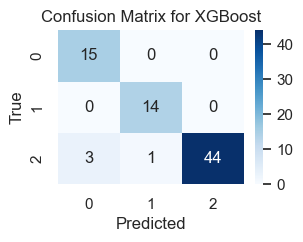

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        48

    accuracy                           0.95        77
   macro avg       0.92      0.97      0.94        77
weighted avg       0.96      0.95      0.95        77

XGBoost - Weighted Precision: 0.96, Recall: 0.95, F1-Score: 0.95
XGBoost - Macro Precision: 0.92, Recall: 0.97, F1-Score: 0.94
XGBoost - Micro Precision: 0.95, Recall: 0.95, F1-Score: 0.95
##########################################################################################
Accuracy of random SVM: 0.90



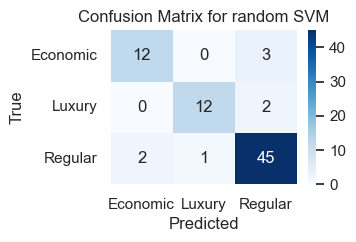

Classification Report for random SVM:
              precision    recall  f1-score   support

    Economic       0.86      0.80      0.83        15
      Luxury       0.92      0.86      0.89        14
     Regular       0.90      0.94      0.92        48

    accuracy                           0.90        77
   macro avg       0.89      0.86      0.88        77
weighted avg       0.90      0.90      0.90        77

random SVM - Weighted Precision: 0.90, Recall: 0.90, F1-Score: 0.90
random SVM - Macro Precision: 0.89, Recall: 0.86, F1-Score: 0.88
random SVM - Micro Precision: 0.90, Recall: 0.90, F1-Score: 0.90
##########################################################################################
Accuracy of grid SVM: 0.92



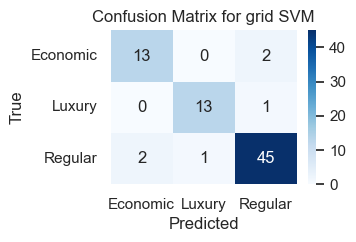

Classification Report for grid SVM:
              precision    recall  f1-score   support

    Economic       0.87      0.87      0.87        15
      Luxury       0.93      0.93      0.93        14
     Regular       0.94      0.94      0.94        48

    accuracy                           0.92        77
   macro avg       0.91      0.91      0.91        77
weighted avg       0.92      0.92      0.92        77

grid SVM - Weighted Precision: 0.92, Recall: 0.92, F1-Score: 0.92
grid SVM - Macro Precision: 0.91, Recall: 0.91, F1-Score: 0.91
grid SVM - Micro Precision: 0.92, Recall: 0.92, F1-Score: 0.92
##########################################################################################


In [110]:
evaluate_model(tree_clf, X_val, y_val, model_name='random Decision Tree')
evaluate_model(tree_clf_2, X_val, y_val, model_name='grid Decision Tree')
evaluate_model(knn_clf, X_val, y_val, model_name='random KNN')
evaluate_model(knn_clf_2, X_val, y_val, model_name='grid KNN')
evaluate_model(rf, X_val, y_val, model_name='Random Forest')
evaluate_model(xgb, X_val,  y_val.astype('category').cat.codes, model_name='XGBoost')
evaluate_model(best_model_random, X_val, y_val, model_name='random SVM')
evaluate_model(best_grid_search, X_val, y_val, model_name='grid SVM')


1. **Confusion Matrix**: This is a table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class. It's particularly useful to see the errors made by the model.

2. **Recall (Sensitivity or True Positive Rate)**: This measures the ability of a model to find all the relevant cases (e.g., all luxury class predictions in your context). It is defined as the ratio of true positives to the sum of true positives and false negatives.

3. **Precision**: This is the ratio of correctly predicted positive observations to the total predicted positives. It helps you understand the accuracy of your positive predictions.

4. **F1-Score**: This is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is especially useful when the class distribution is uneven.

5. **Accuracy**: This is the ratio of correctly predicted observation to the total observations. It is suitable when the classes are balanced.

6. **Micro, Macro, and Weighted Averages**:
   - **Micro-average** is useful when you want to weight each instance or prediction equally.
   - **Macro-average** computes the metric independently for each class and then takes the average (hence treating all classes equally).
   - **Weighted-average** accounts for class imbalance by weighting the metrics by the number of true instances for each class.



Based on the evaluation metrics, the three best models for your classification task are:

1. **XGBoost**:

2. **Random Forest**:

3. **Grid KNN** :


# References:

https://en.wikipedia.org/wiki/Decision_tree  
https://www.geeksforgeeks.org/decision-tree/  
https://scikit-learn.org/stable/modules/tree.html  
https://en.wikipedia.org/wiki/Jaccard_index  
https://www.statology.org/jaccard-similarity/  
https://crunchingthedata.com/number-of-trees-in-random-forests/  
https://crunchingthedata.com/random-forest-overfitting/  
https://stats.stackexchange.com/questions/112148/when-to-avoid-random-forest  
https://www.geeksforgeeks.org/xgboost/   
https://chatgpt.com

Dr. Bahrak Videos on Youtube